In [1]:
import os
os.chdir(os.environ['PROJECT_ROOT'])

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from populations.dataset import STRDatasetsHandler
pd.set_option('max.columns', 100)
pd.set_option('max.rows', 100)

**Survey (correct region, lat/long)**

In [3]:
survey_v1 = pd.read_csv('data/apps/map/survey_data_v1.csv')
survey_v2 = pd.read_csv('data/apps/map/survey_data_v2.csv')

**Dataset handler**

In [4]:
dh = STRDatasetsHandler()

**Bel Pop patch**

In [5]:
print(f'Shape before patching {dh._datasets["bel_pop"]._df.shape}')
dh._datasets['bel_pop'].patch_ids('bel_pop_')
dh._datasets['bel_pop'].patch_meta_data(survey_v2, ['id', 'population'])
print(f'Shape after patching {dh._datasets["bel_pop"]._df.shape}')

Shape before patching (830, 39)
Records patched: 69
Shape after patching (830, 41)


**Autosomal 2020 patch**

In [6]:
print(f'Shape before patching {dh._datasets["autosomal_2020"]._df.shape}')
dh._datasets['autosomal_2020'].patch_meta_data(survey_v2, ['id'])
print(f'Shape after patching {dh._datasets["autosomal_2020"]._df.shape}')

Shape before patching (548, 59)
Records patched: 90
Shape after patching (466, 62)


* **All Bel data**
* **New Bel data & Us data**

In [7]:
dh.join_datasets('bel_data', ['bel_pop', 'autosomal_2020'])
dh.join_datasets('new_bel_vs_us', ['us_data_2016', 'autosomal_2020'])

In [8]:
for ds_id in list(dh._datasets.keys()):
    dh.one_hot_encode(ds_id, f'{ds_id}_one_hot')

In [9]:
dh.available_datasets()

bel_pop
autosomal_2020
us_data_2016
bel_data
new_bel_vs_us
bel_pop_one_hot
autosomal_2020_one_hot
us_data_2016_one_hot
bel_data_one_hot
new_bel_vs_us_one_hot


In [10]:
dh.describe()

bel_pop
(830, 41)


D3S1358-0  D3S1358-1  vWA-0  vWA-1  TH01-0  TH01-1  TPOX-0  TPOX-1  \
0       17.0       18.0   17.0   17.0     6.0     6.0     8.0    11.0   
1       16.0       17.0   15.0   18.0     9.0     9.3     8.0     8.0   
2       16.0       18.0   16.0   18.0     7.0     9.0     8.0     8.0   
3       15.0       16.0   14.0   15.0     9.0     9.3     8.0     8.0   
4       15.0       18.0   17.0   19.0     9.3     9.3     8.0     8.0   

   CSF1PO-0  CSF1PO-1  D5S818-0  D5S818-1  D7S820-0  D7S820-1  D13S317-0  \
0       9.0      10.0      11.0      12.0      11.0      13.0        8.0   
1      10.0      12.0      11.0      12.0      10.0      11.0       12.0   
2      10.0      12.0       9.0      12.0       9.0      10.0       11.0   
3      10.0      11.0      11.0      12.0      10.0      11.0        8.0   
4      10.0      11.0      11.0      12.0       9.0      11.0       11.0   

   D13S317-1  D16S539-0  D16S539-1  F13B-0  F13B-1  D18S51-0  D18S51-1  \
0       12.0       11.0       12.0     6.0    10.0      15.0      19.0   
1       13.0        8.0       13.0     8.0    10.0      12.0      16.0   
2       12.0        9.0       12.0     6.0    10.0      17.0      17.0   
3        9.0        9.0       11.0     9.0    10.0      15.0      16.0   
4       12.0       11.0       13.0    10.0    10.0      13.0      14.0   

   D8S1179-0  D8S1179-1  D21S11-0  D21S11-1  FGA-0  FGA-1  PentaE-0  PentaE-1  \
0       13.0       14.0      30.0      30.0   23.0   24.0       5.0      13.0   
1       10.0       10.0      29.0      30.0   19.0   20.0      10.0      16.0   
2       12.0       13.0      28.0      32.2   24.0   25.0      16.0      17.0   
3       12.0       14.0      27.0      29.0   19.0   19.0       5.0      12.0   
4       12.0       13.0      29.0      31.2   22.2   25.0      10.0      17.0   

   PentaD-0  PentaD-1  D2S1338-0  D2S1338-1  D19S433-0  D19S433-1 population  \
0      11.0      15.0       18.0       24.0       13.0       15.0     Полоцк   
1       9.0      13.0       17.0       19.0       13.0       14.0     Полоцк   
2      11.0      12.0       17.0       19.0       14.0       14.0     Полоцк   
3      10.0      13.0       18.0       23.0       12.0       14.0     Полоцк   
4       9.0       9.0       20.0       20.0       13.0       13.0     Полоцк   

          id    region        lat       long  
0  bel_pop_1  Поозерье  55.485491  28.768240  
1  bel_pop_2  Поозерье  55.485455  28.768239  
2  bel_pop_3  Поозерье  55.485449  28.768225  
3  bel_pop_4  Поозерье  55.485480  28.768216  
4  bel_pop_5  Поозерье  55.485467  28.768219

autosomal_2020
(466, 62)


D3S1358-0  D3S1358-1  D1S1656-0  D1S1656-1  D2S441-0  D2S441-1  D10S1248-0  \
0       15.0       17.0       14.0       17.3      10.0      14.0        14.0   
1       17.0       18.0       12.0       17.3      11.0      15.0        14.0   
2       15.0       15.0       18.3       18.3      11.0      11.0        14.0   
3       18.0       18.0       11.0       12.0      11.0      14.0        13.0   
4       14.0       16.0       15.0       15.0      10.0      14.0        14.0   

   D10S1248-1  D13S317-0  D13S317-1  PentaE-0  PentaE-1  D16S539-0  D16S539-1  \
0        15.0        8.0       12.0       7.0      11.0       11.0       11.0   
1        15.0       11.0       11.0       7.0      12.0       11.0       12.0   
2        15.0        9.0       11.0       7.0       8.0       12.0       13.0   
3        14.0        8.0       11.0      11.0      18.0       11.0       13.0   
4        15.0       10.0       11.0      14.0      16.0       11.0       12.0   

   D18S51-0  D18S51-1  D2S1338-0  D2S1338-1  CSF1PO-0  CSF1PO-1  PentaD-0  \
0      15.0      15.0       17.0       26.0       9.0      12.0      10.0   
1      18.0      18.0       18.0       24.0      12.0      13.0      12.0   
2      14.0      16.0       17.0       19.0      12.0      12.0       9.0   
3      12.0      14.0       16.0       20.0      10.0      13.0       9.0   
4      15.0      19.0       19.0       19.0      10.0      11.0      10.0   

   PentaD-1  TH01-0  TH01-1  vWA-0  vWA-1  D21S11-0  D21S11-1  D7S820-0  \
0      13.0     8.0     9.0   16.0   17.0      30.0      30.0       8.0   
1      12.0     7.0     9.3   14.0   17.0      29.0      29.0       8.0   
2      13.0     6.0     9.0   18.0   19.0      29.0      30.0      10.0   
3      10.0     6.0     6.0   14.0   17.0      29.0      32.2      11.0   
4      10.0     9.0     9.3   17.0   18.0      30.0      31.2      11.0   

   D7S820-1  D5S818-0  D5S818-1  TPOX-0  TPOX-1  D8S1179-0  D8S1179-1  \
0      12.0      12.0      13.0     8.0     9.0       12.0       14.0   
1      11.0      10.0      11.0    10.0    11.0       14.0       15.0   
2      11.0       9.0      12.0     8.0     8.0       12.0       14.0   
3      12.0      10.0      11.0     8.0     8.0       13.0       13.0   
4      11.0      10.0      12.0     8.0     8.0       13.0       15.0   

   D12S391-0  D12S391-1  D19S433-0  D19S433-1  SE33-0  SE33-1  D22S1045-0  \
0       15.0       19.3       12.0       14.0    18.0    29.2        15.0   
1       20.0       20.0       13.0       15.0    17.0    28.2        11.0   
2       20.0       23.0       13.0       16.0    22.0    22.0        16.0   
3       21.0       22.0       11.0       15.0    22.2    23.2        16.0   
4       18.0       20.0       13.0       14.0    17.0    29.2        15.0   

   D22S1045-1  FGA-0  FGA-1  D9S1122-0  D9S1122-1  D20S482-0  D20S482-1  \
0        15.0   22.0   28.0       11.0       12.0       14.0       15.0   
1        15.0   19.0   25.0       12.0       13.0       16.0       16.0   
2        18.0   20.0   21.0       12.0       12.0       14.0       15.0   
3        16.0   22.0   23.0       12.0       12.0       14.0       16.0   
4        16.0   21.0   22.0       11.0       15.0       14.0       15.0   

   D6S1043-0  D6S1043-1  D17S1301-0  D17S1301-1  D4S2408-0  D4S2408-1  \
0       11.0       16.0        11.0        11.0        9.0       10.0   
1       11.0       18.0        12.0        12.0        9.0        9.0   
2       10.0       12.0        11.0        13.0        8.0        9.0   
3       11.0       11.0        10.0        13.0        8.0       11.0   
4       12.0       17.0        12.0        12.0        8.0        9.0   

        region nationality   id                            population  \
0  Поднепровье    Белорусы   39   Чаусы;Чаусский;Могилевская;Беларусь   
1  Центральный    Белорусы   46   аг. Лесной;Минский;Минская;Беларусь   
2  Центральный    Белорусы   85  Витебск;Витебский;Витебская;Беларусь   
3  Центральный    Белорусы  103

us_data_2016
(1034, 60)


CSF1PO-0  CSF1PO-1  D10S1248-0  D10S1248-1  D12S391-0  D12S391-1  \
0      11.0      12.0        14.0        14.0       17.0       21.0   
1       9.0      11.0        12.0        13.0       16.0       16.0   
2      10.0      12.0        14.0        15.0       16.0       20.0   
3      11.0      12.0        11.0        14.0       16.0       19.0   
4       8.0      12.0        14.0        14.0       15.0       18.0   

   D13S317-0  D13S317-1  D16S539-0  D16S539-1  D18S51-0  D18S51-1  D19S433-0  \
0       11.0       12.0       11.0       11.0      17.0      18.0       14.0   
1       11.0       13.0       11.0       12.0      16.0      16.0       11.0   
2       12.0       12.0       11.0       12.0      12.0      17.0       13.0   
3       12.0       13.0        9.0       12.0      15.0      17.0       14.0   
4       11.0       12.0        9.0       11.0      17.0      19.0       14.0   

   D19S433-1  D1S1656-0  D1S1656-1  D21S11-0  D21S11-1  D22S1045-0  \
0       14.0       12.0       16.3      28.0      30.0        11.0   
1       15.0       14.0       16.3      28.0      28.0        11.0   
2       13.2       16.0       17.3      28.0      28.0        11.0   
3       16.2       10.0       15.0      29.0      31.0        14.0   
4       14.2       14.0       16.3      29.0      31.0        15.0   

   D22S1045-1  D2S1338-0  D2S1338-1  D2S441-0  D2S441-1  D3S1358-0  D3S1358-1  \
0        15.0       16.0       17.0      11.0      12.0       16.0       16.0   
1        15.0       19.0       26.0      11.0      14.0       15.0       15.0   
2        15.0       17.0       21.0      11.3      13.0       16.0       17.0   
3        15.0       17.0       20.0      11.0      14.0       15.0       15.0   
4        16.0       20.0       22.0      11.0      12.0       15.0       17.0   

   D5S818-0  D5S818-1  D6S1043-0  D6S1043-1  D7S820-0  D7S820-1  D8S1179-0  \
0      11.0      12.0       11.0       17.0      10.0      11.0       14.0   
1      12.0      12.0       12.0       20.0       9.0      11.0       12.0   
2      12.0      12.0       11.0       17.0       9.0      10.0       15.0   
3      12.0      12.0       11.0       11.0       8.0      10.0       13.0   
4      11.0      12.0       13.0       14.0       8.0       8.0       14.0   

   D8S1179-1  F13A01-0  F13A01-1  F13B-0  F13B-1  FESFPS-0  FESFPS-1  FGA-0  \
0       15.0       4.0       5.0     6.0     6.0       8.0      10.0   23.0   
1       14.0       5.0       7.0     6.0     8.0      11.0      12.0   21.0   
2       15.0       6.0       6.0     6.0     6.0      10.3      11.0   22.3   
3       15.0       8.0      13.0     6.0     9.0      11.0      12.0   22.0   
4       14.0       4.0       5.0     6.0     7.0      10.0      12.0   24.0   

   FGA-1  LPL-0  LPL-1  PentaC-0  PentaC-1  PentaD-0  PentaD-1  PentaE-0  \
0   24.0   13.0   13.0      11.0      12.0       2.2      11.0       5.0   
1   22.0    9.0   10.0      11.0      11.0       8.0       8.0       5.0   
2   25.0   12.0   12.0      11.0      13.0       8.0      13.0      12.0   
3   23.0   10.0   10.0       9.0      10.0       2.2       9.0      14.0   
4   25.0   11.0   12.0       7.0       9.0      10.0      11.0       5.0   

   PentaE-1  SE33-0  SE33-1  TH01-0  TH01-1  TPOX-0  TPOX-1  vWA-0  vWA-1  \
0      13.0    14.0    23.2     6.0     7.0     8.0     9.0   17.0   17.0   
1       8.0    14.0    20.0     7.0     9.0     8.0     8.0   16.0   16.0   
2      14.0    17.0    22.2     7.0     9.3     8.0     8.0   16.0   17.0   
3      16.0    19.0    20.0     7.0     7.0     8.0     8.0   17.0   18.0   
4       7.0    14.0    20.0     7.0     8.0     8.0     9.0   15.0   16.0   

  population       id  
0         AA  GT37019  
1         AA  GT37020  
2         AA  GT37026  
3         AA  GT37027  
4         AA  GT37032

bel_data
(1296, 41)


population         id    region        lat       long   source nationality  \
0     Полоцк  bel_pop_1  Поозерье  55.485491  28.768240  bel_pop        -999   
1     Полоцк  bel_pop_2  Поозерье  55.485455  28.768239  bel_pop        -999   
2     Полоцк  bel_pop_3  Поозерье  55.485449  28.768225  bel_pop        -999   
3     Полоцк  bel_pop_4  Поозерье  55.485480  28.768216  bel_pop        -999   
4     Полоцк  bel_pop_5  Поозерье  55.485467  28.768219  bel_pop        -999   

   CSF1PO-0  CSF1PO-1  D13S317-0  D13S317-1  D16S539-0  D16S539-1  D18S51-0  \
0       9.0      10.0        8.0       12.0       11.0       12.0      15.0   
1      10.0      12.0       12.0       13.0        8.0       13.0      12.0   
2      10.0      12.0       11.0       12.0        9.0       12.0      17.0   
3      10.0      11.0        8.0        9.0        9.0       11.0      15.0   
4      10.0      11.0       11.0       12.0       11.0       13.0      13.0   

   D18S51-1  D19S433-0  D19S433-1  D21S11-0  D21S11-1  D2S1338-0  D2S1338-1  \
0      19.0       13.0       15.0      30.0      30.0       18.0       24.0   
1      16.0       13.0       14.0      29.0      30.0       17.0       19.0   
2      17.0       14.0       14.0      28.0      32.2       17.0       19.0   
3      16.0       12.0       14.0      27.0      29.0       18.0       23.0   
4      14.0       13.0       13.0      29.0      31.2       20.0       20.0   

   D3S1358-0  D3S1358-1  D5S818-0  D5S818-1  D7S820-0  D7S820-1  D8S1179-0  \
0       17.0       18.0      11.0      12.0      11.0      13.0       13.0   
1       16.0       17.0      11.0      12.0      10.0      11.0       10.0   
2       16.0       18.0       9.0      12.0       9.0      10.0       12.0   
3       15.0       16.0      11.0      12.0      10.0      11.0       12.0   
4       15.0       18.0      11.0      12.0       9.0      11.0       12.0   

   D8S1179-1  FGA-0  FGA-1  PentaD-0  PentaD-1  PentaE-0  PentaE-1  TH01-0  \
0       14.0   23.0   24.0      11.0      15.0       5.0      13.0     6.0   
1       10.0   19.0   20.0       9.0      13.0      10.0      16.0     9.0   
2       13.0   24.0   25.0      11.0      12.0      16.0      17.0     7.0   
3       14.0   19.0   19.0      10.0      13.0       5.0      12.0     9.0   
4       13.0   22.2   25.0       9.0       9.0      10.0      17.0     9.3   

   TH01-1  TPOX-0  TPOX-1  vWA-0  vWA-1  
0     6.0     8.0    11.0   17.0   17.0  
1     9.3     8.0     8.0   15.0   18.0  
2     9.0     8.0     8.0   16.0   18.0  
3     9.3     8.0     8.0   14.0   15.0  
4     9.3     8.0     8.0   17.0   19.0

new_bel_vs_us
(1500, 55)


region nationality   id                            population  \
0  Поднепровье    Белорусы   39   Чаусы;Чаусский;Могилевская;Беларусь   
1  Центральный    Белорусы   46   аг. Лесной;Минский;Минская;Беларусь   
2  Центральный    Белорусы   85  Витебск;Витебский;Витебская;Беларусь   
3  Центральный    Белорусы  103     д. Птичь;Минский;Минская;Беларусь   
4  Центральный    Белорусы  115        Минск;Минский;Минская;Беларусь   

         lat       long          source  CSF1PO-0  CSF1PO-1  D10S1248-0  \
0  53.807150  30.973234  autosomal_2020       9.0      12.0        14.0   
1  54.006148  27.680413  autosomal_2020      12.0      13.0        14.0   
2  55.130072  30.357914  autosomal_2020      12.0      12.0        14.0   
3  53.793004  27.391638  autosomal_2020      10.0      13.0        13.0   
4  54.008867  27.284029  autosomal_2020      10.0      11.0        14.0   

   D10S1248-1  D12S391-0  D12S391-1  D13S317-0  D13S317-1  D16S539-0  \
0        15.0       15.0       19.3        8.0       12.0       11.0   
1        15.0       20.0       20.0       11.0       11.0       11.0   
2        15.0       20.0       23.0        9.0       11.0       12.0   
3        14.0       21.0       22.0        8.0       11.0       11.0   
4        15.0       18.0       20.0       10.0       11.0       11.0   

   D16S539-1  D18S51-0  D18S51-1  D19S433-0  D19S433-1  D1S1656-0  D1S1656-1  \
0       11.0      15.0      15.0       12.0       14.0       14.0       17.3   
1       12.0      18.0      18.0       13.0       15.0       12.0       17.3   
2       13.0      14.0      16.0       13.0       16.0       18.3       18.3   
3       13.0      12.0      14.0       11.0       15.0       11.0       12.0   
4       12.0      15.0      19.0       13.0       14.0       15.0       15.0   

   D21S11-0  D21S11-1  D22S1045-0  D22S1045-1  D2S1338-0  D2S1338-1  D2S441-0  \
0      30.0      30.0        15.0        15.0       17.0       26.0      10.0   
1      29.0      29.0        11.0        15.0       18.0       24.0      11.0   
2      29.0      30.0        16.0        18.0       17.0       19.0      11.0   
3      29.0      32.2        16.0        16.0       16.0       20.0      11.0   
4      30.0      31.2        15.0        16.0       19.0       19.0      10.0   

   D2S441-1  D3S1358-0  D3S1358-1  D5S818-0  D5S818-1  D6S1043-0  D6S1043-1  \
0      14.0       15.0       17.0      12.0      13.0       11.0       16.0   
1      15.0       17.0       18.0      10.0      11.0       11.0       18.0   
2      11.0       15.0       15.0       9.0      12.0       10.0       12.0   
3      14.0       18.0       18.0      10.0      11.0       11.0       11.0   
4      14.0       14.0       16.0      10.0      12.0       12.0       17.0   

   D7S820-0  D7S820-1  D8S1179-0  D8S1179-1  FGA-0  FGA-1  PentaD-0  PentaD-1  \
0       8.0      12.0       12.0       14.0   22.0   28.0      10.0      13.0   
1       8.0      11.0       14.0       15.0   19.0   25.0      12.0      12.0   
2      10.0      11.0       12.0       14.0   20.0   21.0       9.0      13.0   
3      11.0      12.0       13.0       13.0   22.0   23.0       9.0      10.0   
4      11.0      11.0       13.0       15.0   21.0   22.0      10.0      10.0   

   PentaE-0  PentaE-1  SE33-0  SE33-1  TH01-0  TH01-1  TPOX-0  TPOX-1  vWA-0  \
0       7.0      11.0    18.0    29.2     8.0     9.0     8.0     9.0   16.0   
1       7.0      12.0    17.0    28.2     7.0     9.3    10.0    11.0   14.0   
2       7.0       8.0    22.0    22.0     6.0     9.0     8.0     8.0   18.0   
3      11.0      18.0    22.2    23.2     6.0     6.0     8.0     8.0   14.0   
4      14.0      16.0    17.0    29.2     9.0     9.3     8.0     8.0   17.0   

   vWA-1  
0   17.0  
1   17.0  
2   19.0  
3   17.0  
4   18.0

bel_pop_one_hot
(830, 210)


D3S1358, 11.0  D3S1358, 14.0  D3S1358, 15.0  D3S1358, 16.0  D3S1358, 17.0  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            1.0            1.0   
2            0.0            0.0            0.0            1.0            0.0   
3            0.0            0.0            1.0            1.0            0.0   
4            0.0            0.0            1.0            0.0            0.0   

   D3S1358, 18.0  D3S1358, 19.0  D3S1358, 20.0  vWA, 0.0  vWA, 13.0  \
0            1.0            0.0            0.0       0.0        0.0   
1            0.0            0.0            0.0       0.0        0.0   
2            1.0            0.0            0.0       0.0        0.0   
3            0.0            0.0            0.0       0.0        0.0   
4            1.0            0.0            0.0       0.0        0.0   

   vWA, 14.0  vWA, 15.0  vWA, 16.0  vWA, 17.0  vWA, 18.0  vWA, 19.0  \
0        0.0        0.0        0.0        2.0        0.0        0.0   
1        0.0        1.0        0.0        0.0        1.0        0.0   
2        0.0        0.0        1.0        0.0        1.0        0.0   
3        1.0        1.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        1.0        0.0        1.0   

   vWA, 20.0  vWA, 21.0  TH01, 6.0  TH01, 7.0  TH01, 8.0  TH01, 9.0  \
0        0.0        0.0        2.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        1.0   
2        0.0        0.0        0.0        1.0        0.0        1.0   
3        0.0        0.0        0.0        0.0        0.0        1.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   TH01, 9.3  TH01, 10.0  TH01, 10.3  TPOX, 6.0  TPOX, 7.0  TPOX, 8.0  \
0        0.0         0.0         0.0        0.0        0.0        1.0   
1        1.0         0.0         0.0        0.0        0.0        2.0   
2        0.0         0.0         0.0        0.0        0.0        2.0   
3        1.0         0.0         0.0        0.0        0.0        2.0   
4        2.0         0.0         0.0        0.0        0.0        2.0   

   TPOX, 9.0  TPOX, 10.0  TPOX, 11.0  TPOX, 12.0  TPOX, 13.0  CSF1PO, 8.0  \
0        0.0         0.0         1.0         0.0         0.0          0.0   
1        0.0         0.0         0.0         0.0         0.0          0.0   
2        0.0         0.0         0.0         0.0         0.0          0.0   
3        0.0         0.0         0.0         0.0         0.0          0.0   
4        0.0         0.0         0.0         0.0         0.0          0.0   

   CSF1PO, 9.0  CSF1PO, 10.0  CSF1PO, 11.0  CSF1PO, 12.0  CSF1PO, 13.0  \
0          1.0           1.0           0.0           0.0           0.0   
1          0.0           1.0           0.0           1.0           0.0   
2          0.0           1.0           0.0           1.0           0.0   
3          0.0           1.0           1.0           0.0           0.0   
4          0.0           1.0           1.0           0.0           0.0   

   CSF1PO, 14.0  CSF1PO, 15.0  D5S818, 0.0  D5S818, 7.0  D5S818, 8.0  \
0           0.0           0.0          0.0          0.0          0.0   
1           0.0           0.0          0.0          0.0          0.0   
2           0.0           0.0          0.0          0.0          0.0   
3           0.0           0.0          0.0          0.0          0.0   
4           0.0           0.0          0.0          0.0          0.0   

   D5S818, 9.0  D5S818, 10.0  D5S818, 11.0  D5S818, 12.0  D5S818, 13.0  \
0          0.0           0.0           1.0           1.0           0.0   
1          0.0           0.0           1.0           1.0           0.0   
2          1.0           0.0           0.0           1.0           0.0   
3          0.0           0.0           1.0           1.0           0.0   
4          0.0           0.0           1.0           1.0           0.0   

   D5S818, 14.0 

autosomal_2020_one_hot
(466, 340)


D3S1358, 11.0  D3S1358, 13.0  D3S1358, 14.0  D3S1358, 15.0  D3S1358, 16.0  \
0            0.0            0.0            0.0            1.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            2.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            1.0            0.0            1.0   

   D3S1358, 17.0  D3S1358, 18.0  D3S1358, 19.0  D1S1656, 10.0  D1S1656, 11.0  \
0            1.0            0.0            0.0            0.0            0.0   
1            1.0            1.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            2.0            0.0            0.0            1.0   
4            0.0            0.0            0.0            0.0            0.0   

   D1S1656, 12.0  D1S1656, 12.3  D1S1656, 13.0  D1S1656, 14.0  D1S1656, 14.3  \
0            0.0            0.0            0.0            1.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   D1S1656, 15.0  D1S1656, 15.3  D1S1656, 16.0  D1S1656, 16.3  D1S1656, 17.0  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            2.0            0.0            0.0            0.0            0.0   

   D1S1656, 17.3  D1S1656, 18.0  D1S1656, 18.3  D1S1656, 19.3  D1S1656, 20.3  \
0            1.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            2.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   D2S441, 9.0  D2S441, 10.0  D2S441, 11.0  D2S441, 11.3  D2S441, 12.0  \
0          0.0           1.0           0.0           0.0           0.0   
1          0.0           0.0           1.0           0.0           0.0   
2          0.0           0.0           2.0           0.0           0.0   
3          0.0           0.0           1.0           0.0           0.0   
4          0.0           1.0           0.0           0.0           0.0   

   D2S441, 13.0  D2S441, 14.0  D2S441, 15.0  D2S441, 16.0  D10S1248, 11.0  \
0           0.0           1.0           0.0           0.0             0.0   
1           0.0           0.0           1.0           0.0             0.0   
2           0.0           0.0           0.0           0.0             0.0   
3           0.0           1.0           0.0           0.0             0.0   
4           0.0           1.0           0.0           0.0             0.0   

   D10S1248, 12.0  D10S1248, 13.0  D10S1248, 14.0  D10S1248, 15.0  \
0             0.0             0.0             1.0             1.0   
1             0.0             0.0             1.0             1.0   
2             0.0             0.0             1.0             1.0   
3             0.0             1.0             1.0             0.0   
4             0.0             0.0             1.0             1.0   

   D10S1248, 16.0  D10S1248, 17.0  D13S317, 8.0  D13S317, 9.0  D13S317, 10.0  \
0             0.0             0.0           1.0           0.0            0.0   
1             0.0             0.0           0.0           0.0            0.0   
2             0.0             0.0  

us_data_2016_one_hot
(1034, 455)


CSF1PO, 7.0  CSF1PO, 8.0  CSF1PO, 9.0  CSF1PO, 10.0  CSF1PO, 11.0  \
0          0.0          0.0          0.0           0.0           1.0   
1          0.0          0.0          1.0           0.0           1.0   
2          0.0          0.0          0.0           1.0           0.0   
3          0.0          0.0          0.0           0.0           1.0   
4          0.0          1.0          0.0           0.0           0.0   

   CSF1PO, 12.0  CSF1PO, 13.0  CSF1PO, 14.0  CSF1PO, 15.0  D10S1248, 8.0  \
0           1.0           0.0           0.0           0.0            0.0   
1           0.0           0.0           0.0           0.0            0.0   
2           1.0           0.0           0.0           0.0            0.0   
3           1.0           0.0           0.0           0.0            0.0   
4           1.0           0.0           0.0           0.0            0.0   

   D10S1248, 9.0  D10S1248, 10.0  D10S1248, 11.0  D10S1248, 12.0  \
0            0.0             0.0             0.0             0.0   
1            0.0             0.0             0.0             1.0   
2            0.0             0.0             0.0             0.0   
3            0.0             0.0             1.0             0.0   
4            0.0             0.0             0.0             0.0   

   D10S1248, 13.0  D10S1248, 14.0  D10S1248, 15.0  D10S1248, 16.0  \
0             0.0             2.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             0.0             1.0             1.0             0.0   
3             0.0             1.0             0.0             0.0   
4             0.0             2.0             0.0             0.0   

   D10S1248, 17.0  D10S1248, 18.0  D10S1248, 19.0  D12S391, 14.0  \
0             0.0             0.0             0.0            0.0   
1             0.0             0.0             0.0            0.0   
2             0.0             0.0             0.0            0.0   
3             0.0             0.0             0.0            0.0   
4             0.0             0.0             0.0            0.0   

   D12S391, 15.0  D12S391, 16.0  D12S391, 17.0  D12S391, 17.1  D12S391, 17.3  \
0            0.0            0.0            1.0            0.0            0.0   
1            0.0            2.0            0.0            0.0            0.0   
2            0.0            1.0            0.0            0.0            0.0   
3            0.0            1.0            0.0            0.0            0.0   
4            1.0            0.0            0.0            0.0            0.0   

   D12S391, 18.0  D12S391, 18.1  D12S391, 18.3  D12S391, 19.0  D12S391, 19.1  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            1.0            0.0   
4            1.0            0.0            0.0            0.0            0.0   

   D12S391, 19.3  D12S391, 20.0  D12S391, 20.1  D12S391, 20.3  D12S391, 21.0  \
0            0.0            0.0            0.0            0.0            1.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            1.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   D12S391, 22.0  D12S391, 22.2  D12S391, 23.0  D12S391, 24.0  D12S391, 24.3  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0      

bel_data_one_hot
(1296, 218)


CSF1PO, 6.0  CSF1PO, 8.0  CSF1PO, 9.0  CSF1PO, 10.0  CSF1PO, 11.0  \
0          0.0          0.0          1.0           1.0           0.0   
1          0.0          0.0          0.0           1.0           0.0   
2          0.0          0.0          0.0           1.0           0.0   
3          0.0          0.0          0.0           1.0           1.0   
4          0.0          0.0          0.0           1.0           1.0   

   CSF1PO, 12.0  CSF1PO, 13.0  CSF1PO, 14.0  CSF1PO, 15.0  D13S317, 0.0  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   D13S317, 8.0  D13S317, 9.0  D13S317, 10.0  D13S317, 11.0  D13S317, 12.0  \
0           1.0           0.0            0.0            0.0            1.0   
1           0.0           0.0            0.0            0.0            1.0   
2           0.0           0.0            0.0            1.0            1.0   
3           1.0           1.0            0.0            0.0            0.0   
4           0.0           0.0            0.0            1.0            1.0   

   D13S317, 13.0  D13S317, 14.0  D13S317, 15.0  D16S539, 7.0  D16S539, 8.0  \
0            0.0            0.0            0.0           0.0           0.0   
1            1.0            0.0            0.0           0.0           1.0   
2            0.0            0.0            0.0           0.0           0.0   
3            0.0            0.0            0.0           0.0           0.0   
4            0.0            0.0            0.0           0.0           0.0   

   D16S539, 9.0  D16S539, 10.0  D16S539, 11.0  D16S539, 12.0  D16S539, 13.0  \
0           0.0            0.0            1.0            1.0            0.0   
1           0.0            0.0            0.0            0.0            1.0   
2           1.0            0.0            0.0            1.0            0.0   
3           1.0            0.0            1.0            0.0            0.0   
4           0.0            0.0            1.0            0.0            1.0   

   D16S539, 14.0  D16S539, 15.0  D18S51, 10.0  D18S51, 11.0  D18S51, 12.0  \
0            0.0            0.0           0.0           0.0           0.0   
1            0.0            0.0           0.0           0.0           1.0   
2            0.0            0.0           0.0           0.0           0.0   
3            0.0            0.0           0.0           0.0           0.0   
4            0.0            0.0           0.0           0.0           0.0   

   D18S51, 13.0  D18S51, 14.0  D18S51, 15.0  D18S51, 16.0  D18S51, 17.0  \
0           0.0           0.0           1.0           0.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           0.0           2.0   
3           0.0           0.0           1.0           1.0           0.0   
4           1.0           1.0           0.0           0.0           0.0   

   D18S51, 18.0  D18S51, 19.0  D18S51, 20.0  D18S51, 21.0  D18S51, 22.0  \
0           0.0           1.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   D18S51, 23.0  D18S51, 24.0  D19S433, 0.0  D19S433, 9.0  D19S433, 10.0  \
0           0.0           0.0           0.0           0.0            0.0   
1           0.0           0.0           0.0           0.0            0.0   
2           0.0           0.0           0.0           0.0            0.0   
3           0.0           0.0        

new_bel_vs_us_one_hot
(1500, 422)


CSF1PO, 6.0  CSF1PO, 7.0  CSF1PO, 8.0  CSF1PO, 9.0  CSF1PO, 10.0  \
0          0.0          0.0          0.0          1.0           0.0   
1          0.0          0.0          0.0          0.0           0.0   
2          0.0          0.0          0.0          0.0           0.0   
3          0.0          0.0          0.0          0.0           1.0   
4          0.0          0.0          0.0          0.0           1.0   

   CSF1PO, 11.0  CSF1PO, 12.0  CSF1PO, 13.0  CSF1PO, 14.0  CSF1PO, 15.0  \
0           0.0           1.0           0.0           0.0           0.0   
1           0.0           1.0           1.0           0.0           0.0   
2           0.0           2.0           0.0           0.0           0.0   
3           0.0           0.0           1.0           0.0           0.0   
4           1.0           0.0           0.0           0.0           0.0   

   D10S1248, 8.0  D10S1248, 9.0  D10S1248, 10.0  D10S1248, 11.0  \
0            0.0            0.0             0.0             0.0   
1            0.0            0.0             0.0             0.0   
2            0.0            0.0             0.0             0.0   
3            0.0            0.0             0.0             0.0   
4            0.0            0.0             0.0             0.0   

   D10S1248, 12.0  D10S1248, 13.0  D10S1248, 14.0  D10S1248, 15.0  \
0             0.0             0.0             1.0             1.0   
1             0.0             0.0             1.0             1.0   
2             0.0             0.0             1.0             1.0   
3             0.0             1.0             1.0             0.0   
4             0.0             0.0             1.0             1.0   

   D10S1248, 16.0  D10S1248, 17.0  D10S1248, 18.0  D10S1248, 19.0  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   D12S391, 14.0  D12S391, 15.0  D12S391, 16.0  D12S391, 17.0  D12S391, 17.1  \
0            0.0            1.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   D12S391, 17.3  D12S391, 18.0  D12S391, 18.1  D12S391, 18.3  D12S391, 19.0  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            1.0            0.0            0.0            0.0   

   D12S391, 19.1  D12S391, 19.2  D12S391, 19.3  D12S391, 20.0  D12S391, 20.1  \
0            0.0            0.0            1.0            0.0            0.0   
1            0.0            0.0            0.0            2.0            0.0   
2            0.0            0.0            0.0            1.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            1.0            0.0   

   D12S391, 20.3  D12S391, 21.0  D12S391, 21.3  D12S391, 22.0  D12S391, 22.2  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            1.0            0.0            1.0            0.0   
4            0.0            0.0            0.0   

# PCA

### Belarussian population

In [26]:
from populations.viz_utils import vizualize_pca
vizualize_pca(dh.get('bel_data'), 'region', one_hot=True)
vizualize_pca(dh.get('bel_data_one_hot'), 'region')

### US data

In [27]:
vizualize_pca(dh.get('us_data_2016_one_hot'), 'population')
vizualize_pca(dh.get('us_data_2016'), 'population', one_hot=True)

### Bel vs US

In [28]:
dh._datasets['new_bel_vs_us_one_hot']._df.loc[
    dh._datasets['new_bel_vs_us_one_hot']._df.region != -999, 'population'] = 'Belarus'

In [44]:
vizualize_pca(dh.get('new_bel_vs_us_one_hot'), 'population')

# 1 vs 1 clf

**Bel data**

Центральный     393
Зап. Полесье    242
Name: region, dtype: int64

29          108         111         138         142   \
level_0      target      target      target      target      target   
level_1    D21S11-0    D7S820-1   D2S1338-1   D2S1338-0   D8S1179-1   
0        0.00184688  0.00582964  0.00590167  0.00767887  0.00784904   

              186        240        279        296        338        381   \
level_0     target     target     target     target     target     target   
level_1   D7S820-0  D19S433-1  D8S1179-0  D13S317-1   CSF1PO-0   D21S11-1   
0        0.0107503  0.0136807  0.0150721  0.0161406  0.0176799  0.0199054   

              450        477       482        507        508        523   \
level_0     target     target    target     target     target     target   
level_1   PentaE-1   D18S51-1    TH01-1     TPOX-1   PentaE-0   D5S818-1   
0        0.0233087  0.0248963  0.025206  0.0265915  0.0266182  0.0276911   

              535        544        574       583        666        713   \
level_0     target     target     target    target     target     target   
level_1  D16S539-0  D13S317-0   D5S818-0  PentaD-1  D3S1358-0   PentaD-0   
0        0.0282726  0.0288581  0.0305842  0.030983   0.036025  0.0407179   

              836        844        867        910        918        923   \
level_0     target     target     target     target     target     target   
level_1   CSF1PO-1     TH01-0  D16S539-1  D19S433-0      vWA-1  D3S1358-1   
0        0.0502633  0.0504756  0.0527443  0.0578955  0.0586444  0.0592415   

              934        1024       1027      1095      1097  
level_0     target     target     target    target    target  
level_1     TPOX-0   D18S51-0      vWA-0     FGA-1     FGA-0  
0        0.0623294  0.0840343  0.0845418  0.142344  0.143651

23         28         32         8          6          22  \
Feature        FGA-1     TH01-0      vWA-0  D19S433-0   D18S51-0      FGA-0   
KS value    0.100466  0.0869066  0.0864469   0.083098  0.0830652  0.0825071   
KS p-value  0.163237   0.302989   0.308882    0.35425   0.354643   0.362742   

                   24         15         14         21         5          33  \
Feature      PentaD-0  D3S1358-1  D3S1358-0  D8S1179-1  D16S539-1      vWA-1   
KS value    0.0755138  0.0720008  0.0684549   0.066288  0.0646792  0.0641867   
KS p-value   0.471945   0.532474   0.596651   0.636541   0.666241   0.675464   

                   10         27         31         0         16         1   \
Feature      D21S11-0   PentaE-1     TPOX-1   CSF1PO-0  D5S818-0   CSF1PO-1   
KS value    0.0637271  0.0584411  0.0580471  0.0535491  0.052203  0.0508241   
KS p-value   0.683924   0.778852   0.785444   0.857892  0.877234   0.895675   

                   11         26         19         17         4          18  \
Feature      D21S11-1   PentaE-0   D7S820-1   D5S818-1  D16S539-0   D7S820-0   
KS value    0.0500361  0.0494451  0.0485587  0.0460306  0.0432727  0.0423534   
KS p-value   0.905406   0.912569   0.922781   0.947783   0.968762    0.97428   

                   30         25         2         7          20         12  \
Feature        TPOX-0   PentaD-1  D13S317-0  D18S51-1  D8S1179-0  D2S1338-0   
KS value    0.0409745  0.0371003  0.0370346  0.036575   0.034605  0.0295817   
KS p-value   0.981307   0.993739   0.993883  0.994759   0.997487   0.999809   

                   13         29         9          3   
Feature     D2S1338-1     TH01-1  D19S433-1  D13S317-1  
KS value    0.0294504  0.0276118  0.0186486  0.0138223  
KS p-value   0.999826   0.999953          1          1

0:	total: 2.29ms	remaining: 1.14s
1:	total: 6.13ms	remaining: 1.53s
2:	total: 8.36ms	remaining: 1.39s
3:	total: 11.2ms	remaining: 1.39s
4:	total: 13.8ms	remaining: 1.37s
5:	total: 16.1ms	remaining: 1.32s
6:	total: 18.2ms	remaining: 1.28s
7:	total: 22.8ms	remaining: 1.4s
8:	total: 25.1ms	remaining: 1.37s
9:	total: 27.4ms	remaining: 1.34s
10:	total: 30.3ms	remaining: 1.35s
11:	total: 32.6ms	remaining: 1.32s
12:	total: 34.8ms	remaining: 1.3s
13:	total: 38.6ms	remaining: 1.34s
14:	total: 41ms	remaining: 1.32s
15:	total: 43.4ms	remaining: 1.31s
16:	total: 45.7ms	remaining: 1.3s
17:	total: 48ms	remaining: 1.28s
18:	total: 50.7ms	remaining: 1.28s
19:	total: 53.9ms	remaining: 1.29s
20:	total: 56.4ms	remaining: 1.28s
21:	total: 59ms	remaining: 1.28s
22:	total: 61.3ms	remaining: 1.27s
23:	total: 63.6ms	remaining: 1.26s
24:	total: 66.6ms	remaining: 1.26s
25:	total: 69.5ms	remaining: 1.27s
26:	total: 71.9ms	remaining: 1.26s
27:	total: 74.7ms	remaining: 1.26s
28:	total: 77ms	remaining: 1.25s
29:	to

260:	total: 768ms	remaining: 703ms
261:	total: 775ms	remaining: 704ms
262:	total: 781ms	remaining: 704ms
263:	total: 789ms	remaining: 705ms
264:	total: 793ms	remaining: 703ms
265:	total: 795ms	remaining: 700ms
266:	total: 797ms	remaining: 696ms
267:	total: 800ms	remaining: 692ms
268:	total: 803ms	remaining: 690ms
269:	total: 805ms	remaining: 686ms
270:	total: 808ms	remaining: 683ms
271:	total: 810ms	remaining: 679ms
272:	total: 812ms	remaining: 675ms
273:	total: 815ms	remaining: 672ms
274:	total: 818ms	remaining: 670ms
275:	total: 822ms	remaining: 667ms
276:	total: 829ms	remaining: 667ms
277:	total: 838ms	remaining: 669ms
278:	total: 843ms	remaining: 668ms
279:	total: 846ms	remaining: 665ms
280:	total: 850ms	remaining: 662ms
281:	total: 853ms	remaining: 659ms
282:	total: 855ms	remaining: 656ms
283:	total: 857ms	remaining: 652ms
284:	total: 860ms	remaining: 649ms
285:	total: 862ms	remaining: 645ms
286:	total: 865ms	remaining: 642ms
287:	total: 868ms	remaining: 639ms
288:	total: 870ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.576250  0.571836  0.434712  0.459188
1    rf   0.788639  0.442206  0.716272  0.376074
2    lr   0.500000  0.500000  0.381773  0.382353
3   svm   0.683434  0.498982  0.605959  0.389179

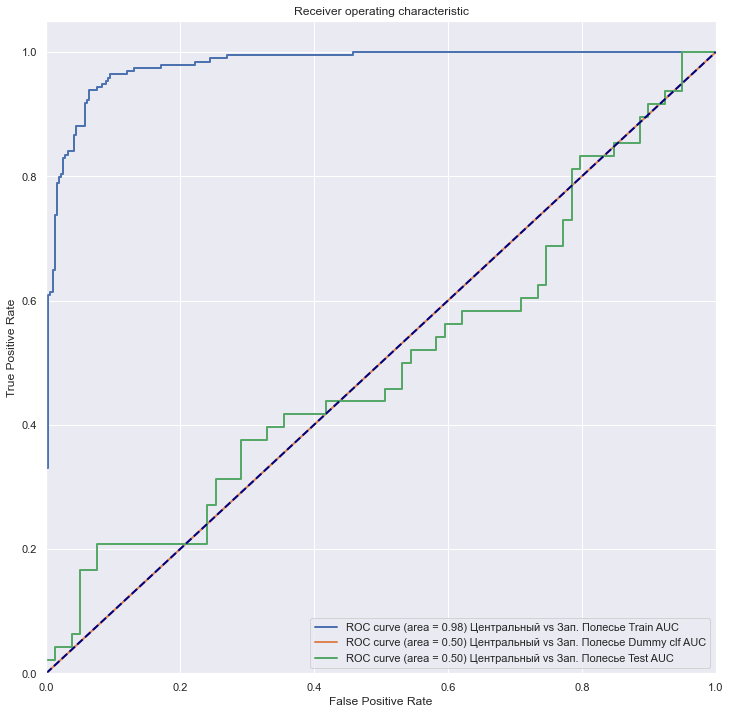

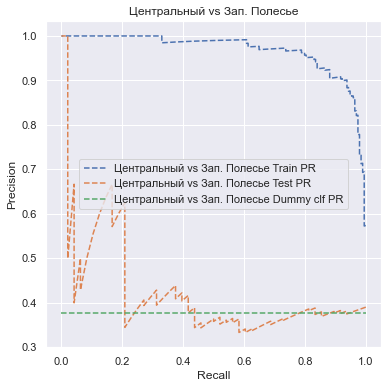

Центральный    393
Поозерье       216
Name: region, dtype: int64

21          69          88          150        214        292   \
level_0      target      target      target      target     target     target   
level_1    PentaE-0   D16S539-1    D5S818-1       FGA-1     TH01-0  D8S1179-0   
0        0.00120459  0.00371815  0.00482709  0.00836111  0.0115983  0.0153007   

              315        321        325        326        348        354   \
level_0     target     target     target     target     target     target   
level_1  D2S1338-0   PentaD-0   PentaD-1   D5S818-0   PentaE-1      vWA-0   
0        0.0168615  0.0172854  0.0175536  0.0176624  0.0198881  0.0200606   

              375        404        428        432        561        595   \
level_0     target     target     target     target     target     target   
level_1  D3S1358-1   D7S820-0   CSF1PO-0  D8S1179-1   CSF1PO-1     TH01-1   
0        0.0212288  0.0224646  0.0236858  0.0238301  0.0325162  0.0347453   

              605        610        657        678        681        755   \
level_0     target     target     target     target     target     target   
level_1     TPOX-0  D16S539-0  D3S1358-0   D7S820-1      FGA-0  D13S317-0   
0        0.0350776   0.035322  0.0392184  0.0417836  0.0419336  0.0480814   

              815        859        861        943        983        985   \
level_0     target     target     target     target     target     target   
level_1  D19S433-0  D19S433-1  D13S317-1  D2S1338-1      vWA-1   D21S11-1   
0        0.0522955  0.0554396  0.0558939  0.0660711  0.0725283  0.0725643   

              995        1019       1043      1083  
level_0     target     target     target    target  
level_1     TPOX-1   D21S11-0   D18S51-0  D18S51-1  
0        0.0743337  0.0790824  0.0857601  0.110166

10        7          27        31         6          19  \
Feature      D21S11-0  D18S51-1   PentaE-1    TPOX-1   D18S51-0   D7S820-1   
KS value     0.118239  0.110471  0.0865579  0.083815  0.0820294  0.0815508   
KS p-value  0.0799824  0.119677    0.34776  0.386358   0.412793   0.420044   

                   9          0          20         13         2          15  \
Feature     D19S433-1   CSF1PO-0  D8S1179-0  D2S1338-1  D13S317-0  D3S1358-1   
KS value    0.0792128  0.0724752  0.0722543  0.0716284  0.0666028  0.0637679   
KS p-value   0.456283   0.569211   0.572994   0.584131   0.673165   0.723326   

                   1          14         30         11         8          4   \
Feature      CSF1PO-1  D3S1358-0     TPOX-0   D21S11-1  D19S433-0  D16S539-0   
KS value    0.0592025  0.0590737  0.0580612  0.0572696  0.0547844  0.0512315   
KS p-value   0.800424   0.802548   0.818852   0.831006   0.867346   0.912334   

                   3          23         25         16         33         5   \
Feature     D13S317-1      FGA-1   PentaD-1   D5S818-0      vWA-1  D16S539-1   
KS value     0.051029  0.0484334  0.0452487  0.0438496  0.0430397  0.0407202   
KS p-value   0.914576   0.941009   0.965932   0.974259   0.978386   0.987733   

                   22         21         29         18         24         26  \
Feature         FGA-0  D8S1179-1     TH01-1   D7S820-0   PentaD-0   PentaE-0   
KS value    0.0376459   0.036615  0.0337616  0.0326939  0.0318471  0.0318103   
KS p-value    0.99512    0.99659   0.998949   0.999382   0.999603   0.999611   

                   12        32         28         17  
Feature     D2S1338-0     vWA-0     TH01-0   D5S818-1  
KS value    0.0294724  0.028147  0.0171385  0.0130886  
KS p-value   0.999909  0.999967          1          1

0:	total: 2.06ms	remaining: 1.03s
1:	total: 6.1ms	remaining: 1.52s
2:	total: 9.18ms	remaining: 1.52s
3:	total: 11ms	remaining: 1.36s
4:	total: 13.1ms	remaining: 1.29s
5:	total: 15ms	remaining: 1.24s
6:	total: 17ms	remaining: 1.19s
7:	total: 20ms	remaining: 1.23s
8:	total: 22.8ms	remaining: 1.24s
9:	total: 25ms	remaining: 1.23s
10:	total: 27.2ms	remaining: 1.21s
11:	total: 29.2ms	remaining: 1.19s
12:	total: 31.4ms	remaining: 1.17s
13:	total: 33.4ms	remaining: 1.16s
14:	total: 37.5ms	remaining: 1.21s
15:	total: 39.7ms	remaining: 1.2s
16:	total: 42.2ms	remaining: 1.2s
17:	total: 44.5ms	remaining: 1.19s
18:	total: 46.5ms	remaining: 1.18s
19:	total: 48.5ms	remaining: 1.16s
20:	total: 50.6ms	remaining: 1.15s
21:	total: 54.5ms	remaining: 1.18s
22:	total: 56.8ms	remaining: 1.18s
23:	total: 59.5ms	remaining: 1.18s
24:	total: 61.7ms	remaining: 1.17s
25:	total: 64.2ms	remaining: 1.17s
26:	total: 67.3ms	remaining: 1.18s
27:	total: 69.6ms	remaining: 1.17s
28:	total: 72ms	remaining: 1.17s
29:	total:

280:	total: 757ms	remaining: 590ms
281:	total: 761ms	remaining: 588ms
282:	total: 763ms	remaining: 585ms
283:	total: 765ms	remaining: 582ms
284:	total: 768ms	remaining: 579ms
285:	total: 772ms	remaining: 578ms
286:	total: 775ms	remaining: 575ms
287:	total: 778ms	remaining: 573ms
288:	total: 781ms	remaining: 570ms
289:	total: 783ms	remaining: 567ms
290:	total: 787ms	remaining: 565ms
291:	total: 789ms	remaining: 562ms
292:	total: 792ms	remaining: 560ms
293:	total: 795ms	remaining: 557ms
294:	total: 797ms	remaining: 554ms
295:	total: 802ms	remaining: 553ms
296:	total: 804ms	remaining: 550ms
297:	total: 806ms	remaining: 547ms
298:	total: 809ms	remaining: 544ms
299:	total: 812ms	remaining: 541ms
300:	total: 814ms	remaining: 538ms
301:	total: 817ms	remaining: 536ms
302:	total: 819ms	remaining: 533ms
303:	total: 822ms	remaining: 530ms
304:	total: 825ms	remaining: 527ms
305:	total: 827ms	remaining: 524ms
306:	total: 829ms	remaining: 521ms
307:	total: 831ms	remaining: 518ms
308:	total: 835ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.637407  0.592744  0.471637  0.417218
1    rf   0.721520  0.415873  0.605576  0.324607
2    lr   0.500000  0.500000  0.354756  0.357143
3   svm   0.607050  0.488435  0.471161  0.340905

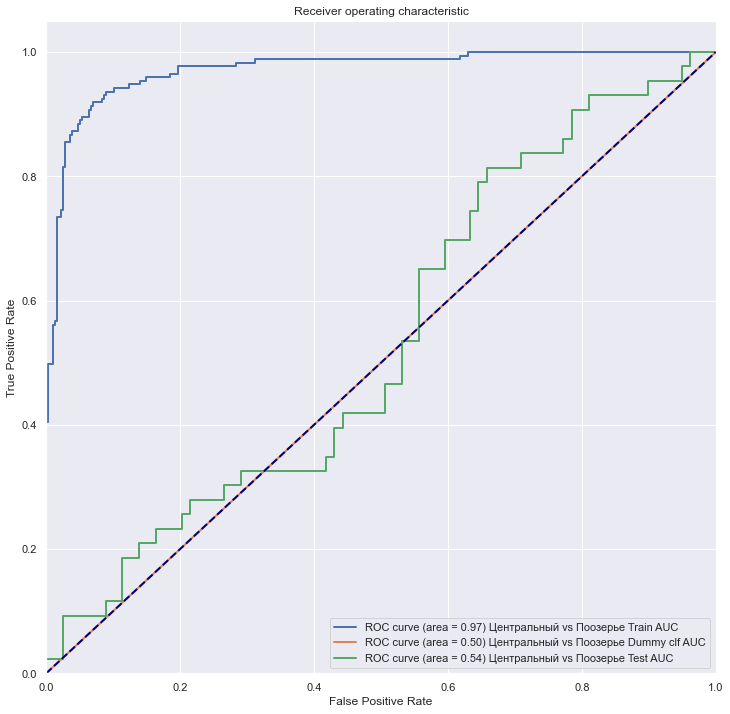

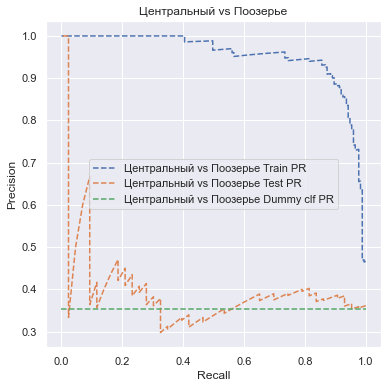

Центральный    393
Поднепровье    166
Name: region, dtype: int64

37          53          65          67          69    \
level_0      target      target      target      target      target   
level_1   D8S1179-1   D3S1358-0      TH01-0       FGA-0    PentaE-0   
0        0.00205368  0.00318919  0.00357453  0.00378372  0.00379247   

               139        186        256        306        317        351   \
level_0      target     target     target     target     target     target   
level_1      TH01-1   CSF1PO-0   PentaE-1  D13S317-0   D5S818-1   D5S818-0   
0        0.00844001  0.0111962  0.0156985  0.0192306  0.0194476  0.0212933   

              410        451        496        539        547        590   \
level_0     target     target     target     target     target     target   
level_1  D16S539-0   CSF1PO-1   D7S820-1   D7S820-0     TPOX-0  D8S1179-0   
0        0.0267379  0.0288555  0.0314043  0.0341444  0.0343869  0.0361232   

              607        668        674        676        700        740   \
level_0     target     target     target     target     target     target   
level_1  D2S1338-1     TPOX-1   PentaD-1   D18S51-0  D2S1338-0  D13S317-1   
0        0.0376556  0.0430592  0.0435571  0.0437905  0.0455875  0.0484539   

              764        804        818        847        868        870   \
level_0     target     target     target     target     target     target   
level_1      FGA-1   PentaD-0      vWA-1  D16S539-1      vWA-0   D21S11-1   
0        0.0505034  0.0540447  0.0549041  0.0580771  0.0614448  0.0615094   

              937        967        1011       1036       1093  
level_0     target     target     target     target     target  
level_1  D19S433-1   D21S11-0  D3S1358-1   D18S51-1  D19S433-0  
0        0.0695685  0.0748692  0.0868518  0.0944727   0.123435

8          15         32        27        0          9   \
Feature     D19S433-0  D3S1358-1      vWA-0  PentaE-1  CSF1PO-0  D19S433-1   
KS value     0.161127  0.0941526  0.0823236  0.079977  0.076481  0.0734639   
KS p-value  0.0135692   0.351849   0.517943  0.554665  0.610976   0.660096   

                   3          23         7          6          12         13  \
Feature     D13S317-1      FGA-1   D18S51-1   D18S51-0  D2S1338-0  D2S1338-1   
KS value    0.0713328  0.0705426  0.0694172  0.0645563   0.064269  0.0623294   
KS p-value   0.694811    0.70751   0.725517   0.800791   0.805139   0.832877   

                   22         2          16         14         18         19  \
Feature         FGA-0  D13S317-0   D5S818-0  D3S1358-0   D7S820-0   D7S820-1   
KS value    0.0573727  0.0551458  0.0551219  0.0539486  0.0521766  0.0519851   
KS p-value   0.895981   0.919573   0.919838    0.93104   0.946203   0.947611   

                   33         25         5          20         10         26  \
Feature         vWA-1   PentaD-1  D16S539-1  D8S1179-0   D21S11-0   PentaE-0   
KS value    0.0516738  0.0504526  0.0474834  0.0448254  0.0447536  0.0418083   
KS p-value   0.950038   0.958828   0.975852   0.986345   0.986589   0.993826   

                   11         24         31         4          17         29  \
Feature      D21S11-1   PentaD-0     TPOX-1  D16S539-0   D5S818-1     TH01-1   
KS value    0.0413773  0.0402519  0.0383363  0.0370672  0.0338585  0.0314401   
KS p-value   0.994545   0.996167   0.998046   0.998818   0.999745   0.999942   

                   1         30         28         21  
Feature      CSF1PO-1    TPOX-0     TH01-0  D8S1179-1  
KS value    0.0305301  0.030147  0.0238734  0.0218141  
KS p-value   0.999969  0.999977          1          1

0:	total: 2.14ms	remaining: 1.06s
1:	total: 6ms	remaining: 1.49s
2:	total: 8.19ms	remaining: 1.36s
3:	total: 10.3ms	remaining: 1.27s
4:	total: 12.6ms	remaining: 1.24s
5:	total: 14.7ms	remaining: 1.21s
6:	total: 16.9ms	remaining: 1.19s
7:	total: 19.5ms	remaining: 1.2s
8:	total: 21.8ms	remaining: 1.19s
9:	total: 24ms	remaining: 1.18s
10:	total: 26.5ms	remaining: 1.18s
11:	total: 28.5ms	remaining: 1.16s
12:	total: 30.5ms	remaining: 1.14s
13:	total: 32.6ms	remaining: 1.13s
14:	total: 38.5ms	remaining: 1.25s
15:	total: 40.8ms	remaining: 1.23s
16:	total: 43ms	remaining: 1.22s
17:	total: 45.2ms	remaining: 1.21s
18:	total: 47.6ms	remaining: 1.2s
19:	total: 50ms	remaining: 1.2s
20:	total: 53.3ms	remaining: 1.22s
21:	total: 55.7ms	remaining: 1.21s
22:	total: 58.3ms	remaining: 1.21s
23:	total: 60.5ms	remaining: 1.2s
24:	total: 62.6ms	remaining: 1.19s
25:	total: 65ms	remaining: 1.18s
26:	total: 68.6ms	remaining: 1.2s
27:	total: 71.2ms	remaining: 1.2s
28:	total: 73.5ms	remaining: 1.19s
29:	total: 7

272:	total: 760ms	remaining: 632ms
273:	total: 766ms	remaining: 631ms
274:	total: 768ms	remaining: 629ms
275:	total: 773ms	remaining: 627ms
276:	total: 776ms	remaining: 625ms
277:	total: 780ms	remaining: 623ms
278:	total: 782ms	remaining: 619ms
279:	total: 785ms	remaining: 616ms
280:	total: 789ms	remaining: 615ms
281:	total: 792ms	remaining: 612ms
282:	total: 794ms	remaining: 609ms
283:	total: 796ms	remaining: 606ms
284:	total: 799ms	remaining: 602ms
285:	total: 801ms	remaining: 599ms
286:	total: 804ms	remaining: 597ms
287:	total: 807ms	remaining: 594ms
288:	total: 809ms	remaining: 591ms
289:	total: 812ms	remaining: 588ms
290:	total: 815ms	remaining: 585ms
291:	total: 820ms	remaining: 584ms
292:	total: 823ms	remaining: 581ms
293:	total: 826ms	remaining: 579ms
294:	total: 829ms	remaining: 576ms
295:	total: 834ms	remaining: 575ms
296:	total: 839ms	remaining: 574ms
297:	total: 845ms	remaining: 573ms
298:	total: 848ms	remaining: 570ms
299:	total: 854ms	remaining: 569ms
300:	total: 857ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.818838  0.604350  0.710467  0.422353
1    rf   0.752875  0.532628  0.624267  0.328807
2    lr   0.500000  0.500000  0.296919  0.300000
3   svm   0.510449  0.425632  0.329766  0.337744

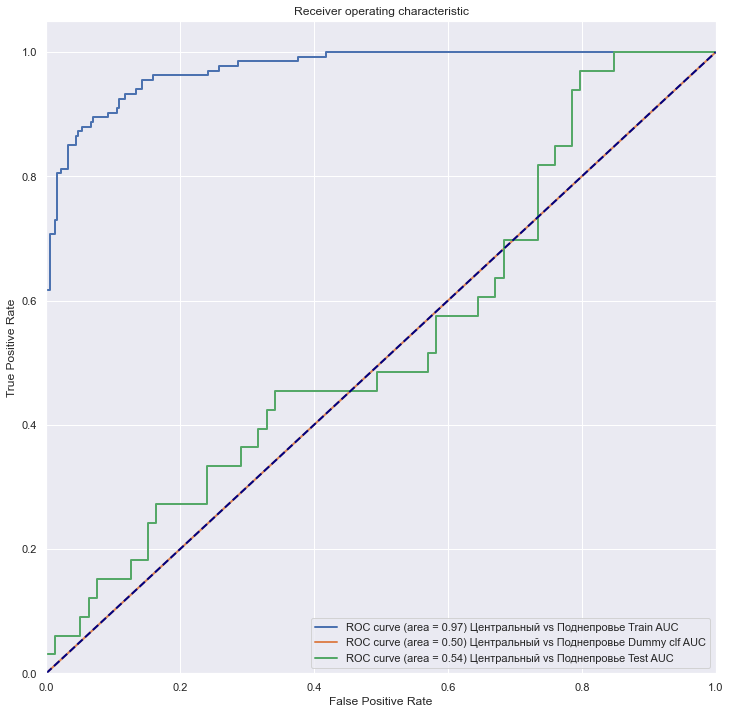

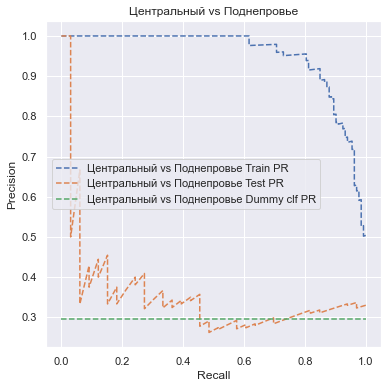

Центральный    393
Понеманье      144
Name: region, dtype: int64

21           23          33         39          74    \
level_0      target       target      target     target      target   
level_1    D18S51-0       TH01-1   D8S1179-1  D2S1338-1   D13S317-1   
0        0.00067887  0.000893672  0.00183786  0.0022193  0.00554359   

               83          93         124         153        263        268   \
level_0      target      target     target      target     target     target   
level_1   D3S1358-0       FGA-1     TPOX-0   D13S317-0   PentaD-1   PentaD-0   
0        0.00611993  0.00650917  0.0078701  0.00905407  0.0151516  0.0162121   

              319        327        348        363        388        583   \
level_0     target     target     target     target     target     target   
level_1  D3S1358-1     TPOX-1   PentaE-0     TH01-0      vWA-0   D21S11-0   
0        0.0187848  0.0191408  0.0209286  0.0218926  0.0235185  0.0354886   

              624        640        644        649        651        698   \
level_0     target     target     target     target     target     target   
level_1   D7S820-0      FGA-0   D21S11-1   D7S820-1  D8S1179-0      vWA-1   
0        0.0396208  0.0414759  0.0421412  0.0424855  0.0427043  0.0467877   

              784        815        816        935        979        991   \
level_0     target     target     target     target     target     target   
level_1  D19S433-1   PentaE-1  D16S539-1   CSF1PO-1  D19S433-0   D5S818-0   
0        0.0546839  0.0565426  0.0566801  0.0708496  0.0781175  0.0812494   

              1014       1017       1109      1114      1126  
level_0     target     target     target    target    target  
level_1  D16S539-0   D5S818-1  D2S1338-0  D18S51-1  CSF1PO-0  
0         0.084765  0.0850933   0.118926  0.122107  0.153737

0          12         4         7          27         17  \
Feature       CSF1PO-0  D2S1338-0  D16S539-0  D18S51-1   PentaE-1   D5S818-1   
KS value      0.197258   0.154999   0.123539  0.114705  0.0980615  0.0933536   
KS p-value  0.00237019  0.0307208   0.138449  0.198904   0.364227   0.424221   

                   24         16        1          5          23         8   \
Feature      PentaD-0   D5S818-0  CSF1PO-1  D16S539-1      FGA-1  D19S433-0   
KS value    0.0886181  0.0826364  0.078067  0.0765716  0.0762393  0.0744115   
KS p-value   0.489494   0.577991  0.648544   0.671835   0.676842   0.704912   

                   13         18         22         10         33         11  \
Feature     D2S1338-1   D7S820-0      FGA-0   D21S11-0      vWA-1   D21S11-1   
KS value    0.0710053  0.0654666  0.0641651  0.0630296  0.0629742  0.0604819   
KS p-value   0.756354   0.834469   0.851297   0.865352    0.86613    0.89455   

                   14         28         9          26         32         29  \
Feature     D3S1358-0     TH01-0  D19S433-1   PentaE-0      vWA-0     TH01-1   
KS value    0.0601218  0.0572695  0.0541955  0.0523401  0.0523124  0.0505123   
KS p-value   0.898521   0.926505    0.95133   0.963342   0.963522   0.973236   

                   20         19         6          3          15         31  \
Feature     D8S1179-0   D7S820-1   D18S51-0  D13S317-1  D3S1358-1     TPOX-1   
KS value     0.047383  0.0450291  0.0413736  0.0349765  0.0317917  0.0281639   
KS p-value   0.985663   0.991819   0.997194   0.999818   0.999976   0.999999   

                   2          21         30         25  
Feature     D13S317-0  D8S1179-1     TPOX-0   PentaD-1  
KS value    0.0234561  0.0218499  0.0142066  0.0153143  
KS p-value          1          1          1          1

0:	total: 3.31ms	remaining: 1.65s
1:	total: 5.65ms	remaining: 1.41s
2:	total: 7.96ms	remaining: 1.32s
3:	total: 9.85ms	remaining: 1.22s
4:	total: 11.9ms	remaining: 1.18s
5:	total: 16.4ms	remaining: 1.35s
6:	total: 19.6ms	remaining: 1.38s
7:	total: 21.7ms	remaining: 1.33s
8:	total: 23.8ms	remaining: 1.3s
9:	total: 25.7ms	remaining: 1.26s
10:	total: 27.6ms	remaining: 1.23s
11:	total: 32.1ms	remaining: 1.3s
12:	total: 34.4ms	remaining: 1.29s
13:	total: 36.8ms	remaining: 1.27s
14:	total: 38.8ms	remaining: 1.25s
15:	total: 40.8ms	remaining: 1.23s
16:	total: 42.8ms	remaining: 1.22s
17:	total: 45.8ms	remaining: 1.23s
18:	total: 47.8ms	remaining: 1.21s
19:	total: 49.9ms	remaining: 1.2s
20:	total: 52.1ms	remaining: 1.19s
21:	total: 54.3ms	remaining: 1.18s
22:	total: 56.2ms	remaining: 1.17s
23:	total: 58.2ms	remaining: 1.15s
24:	total: 61.1ms	remaining: 1.16s
25:	total: 63.7ms	remaining: 1.16s
26:	total: 66ms	remaining: 1.16s
27:	total: 68.1ms	remaining: 1.15s
28:	total: 70.1ms	remaining: 1.14s


295:	total: 767ms	remaining: 529ms
296:	total: 770ms	remaining: 526ms
297:	total: 772ms	remaining: 523ms
298:	total: 774ms	remaining: 521ms
299:	total: 778ms	remaining: 518ms
300:	total: 780ms	remaining: 516ms
301:	total: 784ms	remaining: 514ms
302:	total: 786ms	remaining: 511ms
303:	total: 789ms	remaining: 508ms
304:	total: 791ms	remaining: 506ms
305:	total: 793ms	remaining: 503ms
306:	total: 796ms	remaining: 500ms
307:	total: 800ms	remaining: 498ms
308:	total: 803ms	remaining: 496ms
309:	total: 805ms	remaining: 494ms
310:	total: 808ms	remaining: 491ms
311:	total: 810ms	remaining: 488ms
312:	total: 812ms	remaining: 485ms
313:	total: 816ms	remaining: 483ms
314:	total: 818ms	remaining: 481ms
315:	total: 821ms	remaining: 478ms
316:	total: 823ms	remaining: 475ms
317:	total: 826ms	remaining: 472ms
318:	total: 829ms	remaining: 470ms
319:	total: 832ms	remaining: 468ms
320:	total: 834ms	remaining: 465ms
321:	total: 836ms	remaining: 462ms
322:	total: 838ms	remaining: 459ms
323:	total: 841ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.728044  0.612146  0.546705  0.417216
1    rf   0.873723  0.522429  0.744838  0.288446
2    lr   0.500000  0.500000  0.268222  0.267442
3   svm   0.608393  0.527950  0.392669  0.324814

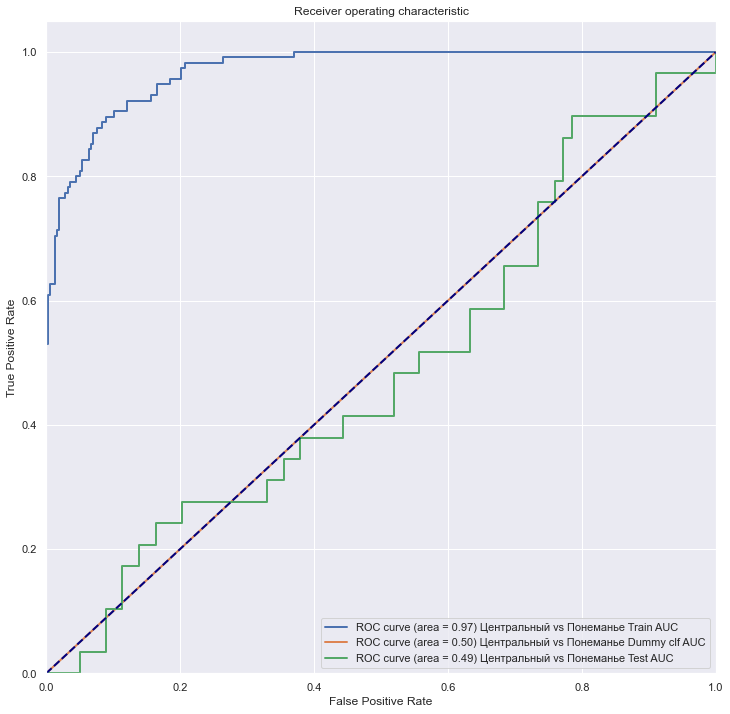

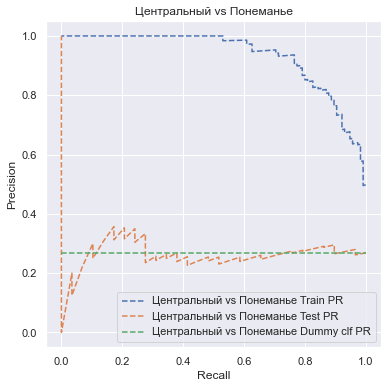

Центральный      393
Вост. Полесье    135
Name: region, dtype: int64

21          80          129         132        186        207   \
level_0      target      target      target      target     target     target   
level_1   D3S1358-1    CSF1PO-1   D8S1179-1    PentaD-0  D2S1338-1  D16S539-0   
0        0.00133186  0.00404221  0.00693419  0.00700902  0.0106173  0.0114758   

              331        344        375        394        400        452   \
level_0     target     target     target     target     target     target   
level_1     TPOX-0   D18S51-1   D18S51-0  D3S1358-0   CSF1PO-0  D13S317-1   
0        0.0197089  0.0205578  0.0222693  0.0237898  0.0240015  0.0271491   

              476        542        559        561        609        638   \
level_0     target     target     target     target     target     target   
level_1  D13S317-0      FGA-1   D7S820-1      FGA-0   D5S818-1   D21S11-0   
0        0.0285991  0.0337651  0.0345061  0.0347961  0.0374429  0.0385218   

              658        701        708        771        830        838   \
level_0     target     target     target     target     target     target   
level_1  D16S539-1  D2S1338-0   D7S820-0      vWA-1  D19S433-0   PentaE-0   
0        0.0406481   0.044945  0.0462583  0.0523337  0.0580063  0.0585802   

              855        871        873        936        993        999   \
level_0     target     target     target     target     target     target   
level_1   D21S11-1  D19S433-1   PentaD-1      vWA-0     TH01-1   PentaE-1   
0        0.0598631  0.0620998  0.0622984  0.0697922  0.0779466  0.0791581   

              1020       1028       1043      1114  
level_0     target     target     target    target  
level_1   D5S818-0     TH01-0  D8S1179-0    TPOX-1  
0        0.0831081  0.0843803  0.0879187  0.117123

27         31        25        0         32         20  \
Feature      PentaE-1     TPOX-1  PentaD-1  CSF1PO-0     vWA-0  D8S1179-0   
KS value     0.155815    0.14461  0.113352   0.10828  0.105213  0.0922387   
KS p-value  0.0353876  0.0615397  0.231252  0.277975   0.30937   0.467368   

                  11         29        28         26         22         23  \
Feature     D21S11-1     TH01-1    TH01-0   PentaE-0      FGA-0      FGA-1   
KS value    0.089172  0.0885822  0.086577  0.0843949  0.0833923  0.0827436   
KS p-value  0.510333    0.51866  0.547955   0.580093   0.595201   0.604512   

                   16         17         24         12         33         9   \
Feature      D5S818-0   D5S818-1   PentaD-0  D2S1338-0      vWA-1  D19S433-1   
KS value    0.0822718  0.0814461  0.0770819  0.0601557  0.0599198  0.0592121   
KS p-value   0.612059   0.624531   0.690715   0.911823   0.914077   0.920798   

                   5          8          18         6          7          14  \
Feature     D16S539-1  D19S433-0   D7S820-0   D18S51-0   D18S51-1  D3S1358-0   
KS value    0.0554376  0.0547299  0.0532555  0.0531965  0.0529016  0.0523119   
KS p-value   0.951155   0.955974   0.964847   0.965203   0.966819   0.969909   

                   3         10         15         13         2          19  \
Feature     D13S317-1  D21S11-0  D3S1358-1  D2S1338-1  D13S317-0   D7S820-1   
KS value    0.0489502  0.044468    0.04205   0.041991  0.0366242  0.0353267   
KS p-value   0.984064  0.994649   0.997429   0.997478   0.999712   0.999858   

                   30         4          1          21  
Feature        TPOX-0  D16S539-0   CSF1PO-1  D8S1179-1  
KS value    0.0342062    0.02477  0.0165723  0.0153338  
KS p-value   0.999925          1          1          1

0:	total: 2.25ms	remaining: 1.12s
1:	total: 4.64ms	remaining: 1.16s
2:	total: 6.71ms	remaining: 1.11s
3:	total: 8.74ms	remaining: 1.08s
4:	total: 10.9ms	remaining: 1.08s
5:	total: 17.1ms	remaining: 1.41s
6:	total: 19.8ms	remaining: 1.4s
7:	total: 22.3ms	remaining: 1.37s
8:	total: 24.6ms	remaining: 1.34s
9:	total: 26.8ms	remaining: 1.31s
10:	total: 31.5ms	remaining: 1.4s
11:	total: 35.7ms	remaining: 1.45s
12:	total: 49.6ms	remaining: 1.86s
13:	total: 54.5ms	remaining: 1.89s
14:	total: 61.3ms	remaining: 1.98s
15:	total: 64.3ms	remaining: 1.94s
16:	total: 73.3ms	remaining: 2.08s
17:	total: 78.5ms	remaining: 2.1s
18:	total: 82.1ms	remaining: 2.08s
19:	total: 84.4ms	remaining: 2.02s
20:	total: 86.5ms	remaining: 1.97s
21:	total: 88.6ms	remaining: 1.92s
22:	total: 90.7ms	remaining: 1.88s
23:	total: 97.1ms	remaining: 1.93s
24:	total: 100ms	remaining: 1.91s
25:	total: 103ms	remaining: 1.87s
26:	total: 105ms	remaining: 1.83s
27:	total: 107ms	remaining: 1.81s
28:	total: 111ms	remaining: 1.81s
29:

299:	total: 960ms	remaining: 640ms
300:	total: 964ms	remaining: 637ms
301:	total: 966ms	remaining: 633ms
302:	total: 968ms	remaining: 629ms
303:	total: 970ms	remaining: 626ms
304:	total: 972ms	remaining: 622ms
305:	total: 976ms	remaining: 619ms
306:	total: 978ms	remaining: 615ms
307:	total: 981ms	remaining: 611ms
308:	total: 983ms	remaining: 607ms
309:	total: 985ms	remaining: 603ms
310:	total: 987ms	remaining: 600ms
311:	total: 990ms	remaining: 596ms
312:	total: 993ms	remaining: 593ms
313:	total: 995ms	remaining: 589ms
314:	total: 997ms	remaining: 586ms
315:	total: 999ms	remaining: 582ms
316:	total: 1s	remaining: 578ms
317:	total: 1s	remaining: 574ms
318:	total: 1.01s	remaining: 571ms
319:	total: 1.01s	remaining: 568ms
320:	total: 1.01s	remaining: 566ms
321:	total: 1.02s	remaining: 563ms
322:	total: 1.02s	remaining: 559ms
323:	total: 1.02s	remaining: 556ms
324:	total: 1.03s	remaining: 553ms
325:	total: 1.03s	remaining: 550ms
326:	total: 1.03s	remaining: 546ms
327:	total: 1.04s	remainin

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.946864  0.702020  0.874424  0.540514
1    rf   0.845803  0.520202  0.656833  0.396177
2    lr   0.500000  0.500000  0.255193  0.258824
3   svm   0.555684  0.515873  0.326445  0.313430

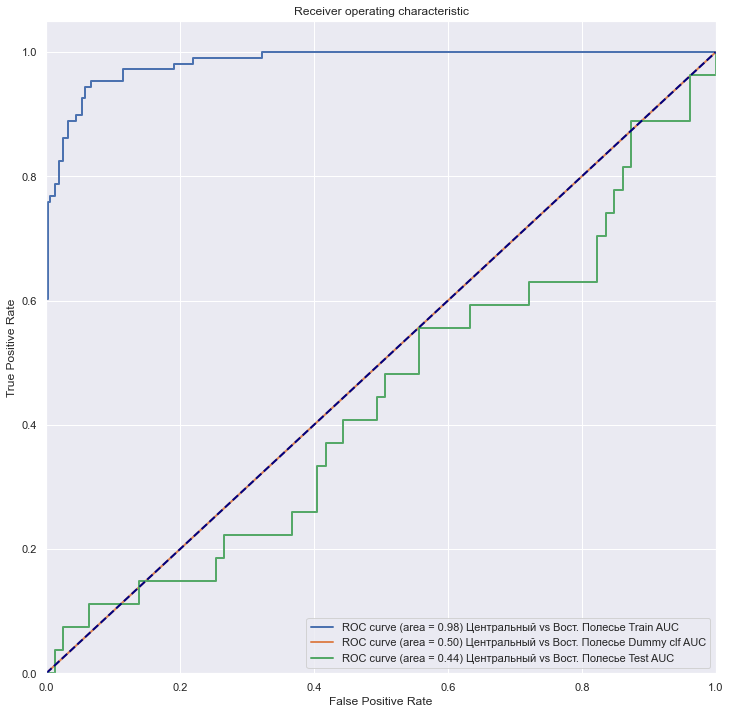

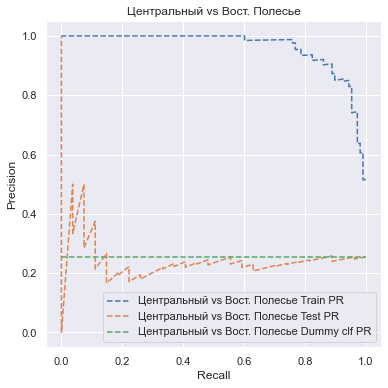

Зап. Полесье    242
Поозерье        216
Name: region, dtype: int64

35          104         128         155        193        279   \
level_0      target      target      target      target     target     target   
level_1   D8S1179-0    CSF1PO-0    PentaD-1   D13S317-1  D19S433-0   D18S51-0   
0        0.00218441  0.00602965  0.00712848  0.00899658  0.0113919  0.0159776   

              301        315        324        352        421        440   \
level_0     target     target     target     target     target     target   
level_1  D8S1179-1   D5S818-1   PentaE-1     TH01-0  D16S539-1  D3S1358-1   
0        0.0171464  0.0181076  0.0185265  0.0196866  0.0224618   0.023822   

              450        487        567        598        638        754   \
level_0     target     target     target     target     target     target   
level_1  D2S1338-1   D7S820-1     TH01-1  D19S433-1   PentaE-0  D2S1338-0   
0        0.0251086  0.0267922  0.0330474   0.035107  0.0380319  0.0479579   

              810        818        834        840        933        956   \
level_0     target     target     target     target     target     target   
level_1   D7S820-0  D16S539-0   D5S818-0   D21S11-1   CSF1PO-1  D13S317-0   
0        0.0529474  0.0539725  0.0548387  0.0557027  0.0687769  0.0734579   

              975        992        1003       1050       1071      1090  \
level_0     target     target     target     target     target    target   
level_1   D18S51-1   D21S11-0      vWA-1  D3S1358-0      vWA-0  PentaD-0   
0        0.0769721  0.0804912  0.0822128  0.0929363  0.0979549  0.105954   

             1094      1115      1119      1125  
level_0    target    target    target    target  
level_1    TPOX-1    TPOX-0     FGA-0     FGA-1  
0        0.108069  0.128653  0.146171  0.154592

14        31        32        30        24        23  \
Feature     D3S1358-0    TPOX-1     vWA-0    TPOX-0  PentaD-0     FGA-1   
KS value     0.138069  0.118871  0.111324  0.109258  0.105933  0.105753   
KS p-value  0.0543475  0.136688  0.188773  0.205693  0.234824  0.236347   

                  22         7          33         1          10         4   \
Feature        FGA-0   D18S51-1      vWA-1   CSF1PO-1   D21S11-0  D16S539-0   
KS value     0.10156  0.0885921  0.0837402  0.0778999  0.0730181  0.0714906   
KS p-value  0.277835    0.43742   0.508532    0.59927   0.678258    0.70249   

                   2          25         18         12         26         17  \
Feature     D13S317-0   PentaD-1   D7S820-0  D2S1338-0   PentaE-0   D5S818-1   
KS value    0.0711013  0.0686753  0.0678966  0.0674773  0.0666986  0.0646321   
KS p-value    0.70864   0.747036   0.759006   0.765546   0.777292   0.808104   

                   8         19         13         20         9          28  \
Feature     D19S433-0  D7S820-1  D2S1338-1  D8S1179-0  D19S433-1     TH01-0   
KS value    0.0602893  0.055677  0.0538501  0.0506454  0.0444757  0.0437569   
KS p-value   0.866875  0.918809   0.935907   0.960115   0.988437    0.99029   

                   15         16         5          11         21         27  \
Feature     D3S1358-1   D5S818-0  D16S539-1   D21S11-1  D8S1179-1   PentaE-1   
KS value    0.0426787  0.0421097  0.0367486  0.0354608  0.0338734  0.0314175   
KS p-value   0.992759   0.993824    0.99906    0.99948   0.999769   0.999948   

                   6          29         3          0   
Feature      D18S51-0     TH01-1  D13S317-1   CSF1PO-0  
KS value    0.0287819  0.0273144  0.0214442  0.0114708  
KS p-value   0.999993   0.999998          1          1

0:	total: 2.64ms	remaining: 1.32s
1:	total: 7.61ms	remaining: 1.9s
2:	total: 10.2ms	remaining: 1.69s
3:	total: 12.9ms	remaining: 1.6s
4:	total: 15.9ms	remaining: 1.57s
5:	total: 18.3ms	remaining: 1.51s
6:	total: 22.8ms	remaining: 1.61s
7:	total: 26.8ms	remaining: 1.65s
8:	total: 29.6ms	remaining: 1.61s
9:	total: 32ms	remaining: 1.57s
10:	total: 34.7ms	remaining: 1.54s
11:	total: 39.1ms	remaining: 1.59s
12:	total: 41.8ms	remaining: 1.57s
13:	total: 44.5ms	remaining: 1.54s
14:	total: 47.2ms	remaining: 1.53s
15:	total: 49.6ms	remaining: 1.5s
16:	total: 53.9ms	remaining: 1.53s
17:	total: 56.7ms	remaining: 1.52s
18:	total: 60ms	remaining: 1.52s
19:	total: 62.5ms	remaining: 1.5s
20:	total: 64.8ms	remaining: 1.48s
21:	total: 67.7ms	remaining: 1.47s
22:	total: 71.3ms	remaining: 1.48s
23:	total: 74.8ms	remaining: 1.48s
24:	total: 77.4ms	remaining: 1.47s
25:	total: 79.7ms	remaining: 1.45s
26:	total: 82.9ms	remaining: 1.45s
27:	total: 86ms	remaining: 1.45s
28:	total: 88.8ms	remaining: 1.44s
29:	t

251:	total: 773ms	remaining: 761ms
252:	total: 777ms	remaining: 758ms
253:	total: 781ms	remaining: 757ms
254:	total: 784ms	remaining: 753ms
255:	total: 787ms	remaining: 750ms
256:	total: 789ms	remaining: 746ms
257:	total: 794ms	remaining: 745ms
258:	total: 797ms	remaining: 742ms
259:	total: 800ms	remaining: 738ms
260:	total: 803ms	remaining: 735ms
261:	total: 805ms	remaining: 731ms
262:	total: 810ms	remaining: 730ms
263:	total: 813ms	remaining: 726ms
264:	total: 816ms	remaining: 723ms
265:	total: 818ms	remaining: 720ms
266:	total: 821ms	remaining: 716ms
267:	total: 825ms	remaining: 714ms
268:	total: 827ms	remaining: 711ms
269:	total: 830ms	remaining: 707ms
270:	total: 833ms	remaining: 704ms
271:	total: 835ms	remaining: 700ms
272:	total: 838ms	remaining: 697ms
273:	total: 842ms	remaining: 695ms
274:	total: 845ms	remaining: 691ms
275:	total: 848ms	remaining: 688ms
276:	total: 850ms	remaining: 685ms
277:	total: 853ms	remaining: 681ms
278:	total: 857ms	remaining: 679ms
279:	total: 860ms	re

496:	total: 1.55s	remaining: 9.37ms
497:	total: 1.56s	remaining: 6.25ms
498:	total: 1.56s	remaining: 3.12ms
499:	total: 1.56s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.747130  0.552381  0.705372  0.509090
1    rf   0.782985  0.477656  0.755363  0.472002
2    lr   0.728778  0.492308  0.709822  0.513153
3   svm   1.000000  0.652747  1.000000  0.651152

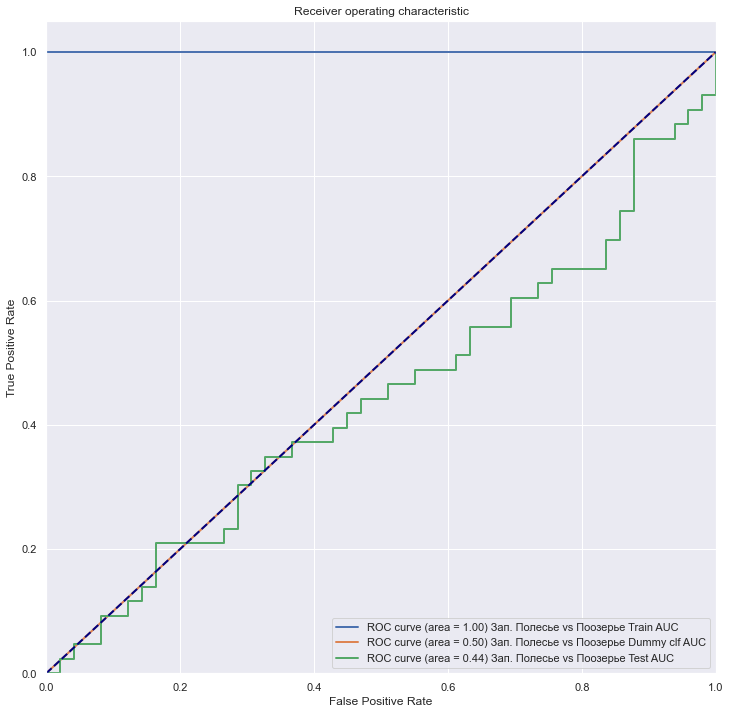

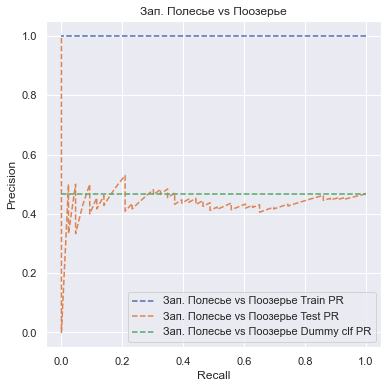

Зап. Полесье    242
Поднепровье     166
Name: region, dtype: int64

31          47         104        188        239        256   \
level_0      target      target     target     target     target     target   
level_1   D16S539-0   D19S433-1  D16S539-1   CSF1PO-0  D8S1179-0   D5S818-0   
0        0.00210223  0.00345084  0.0072392  0.0139824  0.0160703  0.0171423   

              281        393        472        478        510       516   \
level_0     target     target     target     target     target    target   
level_1   D21S11-1   D18S51-0  D8S1179-1   PentaD-1   PentaE-0  D7S820-1   
0        0.0192093  0.0263616  0.0326306  0.0328573  0.0357645  0.036355   

              552       563        621        650        691        692   \
level_0     target    target     target     target     target     target   
level_1     TH01-0    TH01-1   D5S818-1  D2S1338-0  D2S1338-1  D13S317-1   
0        0.0387767  0.039844  0.0441047  0.0480216   0.050869  0.0512179   

              849        851        854        870        890        964   \
level_0     target     target     target     target     target     target   
level_1   PentaE-1   D7S820-0  D19S433-0  D13S317-0   CSF1PO-1   D21S11-0   
0        0.0649861  0.0652377   0.065805  0.0669085  0.0700287  0.0786027   

              966        986       1030       1033       1040      1051  \
level_0     target     target    target     target     target    target   
level_1  D3S1358-0   D18S51-1  PentaD-0  D3S1358-1      vWA-0     vWA-1   
0        0.0786712  0.0817664  0.094357   0.095078  0.0961809  0.097884   

             1065     1073      1102     1118  
level_0    target   target    target   target  
level_1    TPOX-1    FGA-0     FGA-1   TPOX-0  
0        0.105477  0.11017  0.126122  0.14777

31         15        30        17         13         24  \
Feature       TPOX-1  D3S1358-1    TPOX-0  D5S818-1  D2S1338-1   PentaD-0   
KS value    0.125521   0.124898  0.108419  0.101835  0.0973548  0.0886283   
KS p-value  0.150387   0.154203  0.285747   0.35679   0.410789   0.528859   

                   32         11         12         2          10         28  \
Feature         vWA-0   D21S11-1  D2S1338-0  D13S317-0   D21S11-0     TH01-0   
KS value    0.0885504  0.0874206  0.0828626  0.0819666  0.0803304  0.0796681   
KS p-value   0.529679   0.546275   0.613033   0.626623   0.650884   0.660915   

                   23        18         3          1          27         16  \
Feature         FGA-1  D7S820-0  D13S317-1   CSF1PO-1   PentaE-1   D5S818-0   
KS value    0.0787331   0.07698  0.0761619  0.0754996  0.0741361  0.0740972   
KS p-value   0.674771  0.700965   0.713088   0.723019   0.742828   0.743519   

                   25         7          14         29         33         20  \
Feature      PentaD-1   D18S51-1  D3S1358-0     TH01-1      vWA-1  D8S1179-0   
KS value    0.0685652  0.0675913  0.0664615  0.0639682  0.0636176   0.062293   
KS p-value   0.820342   0.832917   0.847236   0.876513   0.880707   0.894977   

                   19         6          8          26         21         4   \
Feature      D7S820-1   D18S51-0  D19S433-0   PentaE-0  D8S1179-1  D16S539-0   
KS value    0.0606179  0.0592544  0.0576571  0.0529432  0.0515018  0.0405158   
KS p-value   0.911622   0.924199   0.937693   0.968592   0.975554   0.998621   

                   5          9          22         0   
Feature     D16S539-1  D19S433-1      FGA-0   CSF1PO-0  
KS value    0.0381394  0.0380225  0.0362694  0.0265301  
KS p-value   0.999477   0.999496   0.999785          1

0:	total: 3.08ms	remaining: 1.54s
1:	total: 6.89ms	remaining: 1.72s
2:	total: 10.9ms	remaining: 1.8s
3:	total: 14.5ms	remaining: 1.8s
4:	total: 17.8ms	remaining: 1.76s
5:	total: 21.1ms	remaining: 1.74s
6:	total: 26.6ms	remaining: 1.87s
7:	total: 30.1ms	remaining: 1.85s
8:	total: 33.4ms	remaining: 1.82s
9:	total: 36.8ms	remaining: 1.8s
10:	total: 41.6ms	remaining: 1.85s
11:	total: 44.9ms	remaining: 1.83s
12:	total: 48.4ms	remaining: 1.81s
13:	total: 52.2ms	remaining: 1.81s
14:	total: 57.1ms	remaining: 1.85s
15:	total: 60.9ms	remaining: 1.84s
16:	total: 64.1ms	remaining: 1.82s
17:	total: 70.9ms	remaining: 1.9s
18:	total: 76.9ms	remaining: 1.95s
19:	total: 80.2ms	remaining: 1.92s
20:	total: 84.1ms	remaining: 1.92s
21:	total: 89.1ms	remaining: 1.94s
22:	total: 92.8ms	remaining: 1.92s
23:	total: 96.7ms	remaining: 1.92s
24:	total: 101ms	remaining: 1.92s
25:	total: 106ms	remaining: 1.93s
26:	total: 110ms	remaining: 1.93s
27:	total: 113ms	remaining: 1.91s
28:	total: 119ms	remaining: 1.93s
29:	

281:	total: 976ms	remaining: 754ms
282:	total: 979ms	remaining: 750ms
283:	total: 981ms	remaining: 746ms
284:	total: 985ms	remaining: 743ms
285:	total: 988ms	remaining: 739ms
286:	total: 991ms	remaining: 735ms
287:	total: 993ms	remaining: 731ms
288:	total: 996ms	remaining: 727ms
289:	total: 999ms	remaining: 724ms
290:	total: 1s	remaining: 720ms
291:	total: 1s	remaining: 716ms
292:	total: 1.01s	remaining: 712ms
293:	total: 1.01s	remaining: 708ms
294:	total: 1.01s	remaining: 703ms
295:	total: 1.02s	remaining: 701ms
296:	total: 1.02s	remaining: 697ms
297:	total: 1.02s	remaining: 693ms
298:	total: 1.02s	remaining: 689ms
299:	total: 1.03s	remaining: 685ms
300:	total: 1.03s	remaining: 682ms
301:	total: 1.03s	remaining: 679ms
302:	total: 1.04s	remaining: 675ms
303:	total: 1.04s	remaining: 671ms
304:	total: 1.04s	remaining: 667ms
305:	total: 1.05s	remaining: 664ms
306:	total: 1.05s	remaining: 661ms
307:	total: 1.05s	remaining: 657ms
308:	total: 1.06s	remaining: 653ms
309:	total: 1.06s	remainin

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.952034  0.569801  0.916947  0.568321
1    rf   0.887956  0.493827  0.847468  0.458334
2    lr   0.500000  0.500000  0.407692  0.409091
3   svm   0.686168  0.604938  0.573851  0.488571

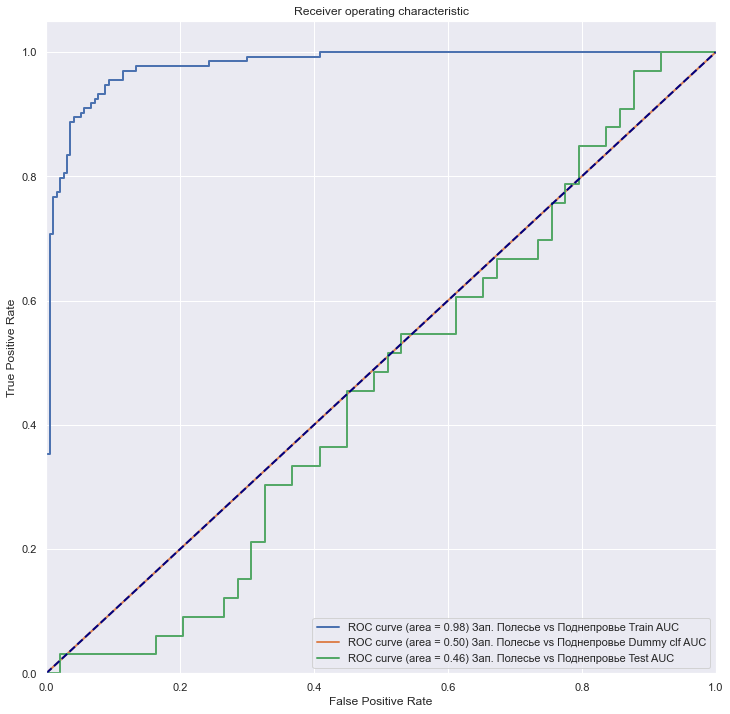

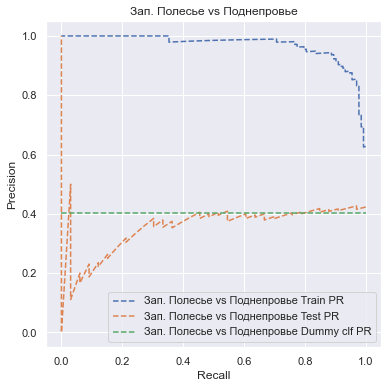

Зап. Полесье    242
Понеманье       144
Name: region, dtype: int64

20          41          62         191        198        223   \
level_0      target      target      target     target     target     target   
level_1   D19S433-0    D7S820-0    PentaD-1  D19S433-1  D2S1338-1  D8S1179-0   
0        0.00201508  0.00353678  0.00525203  0.0137513  0.0145864   0.015658   

              258        338        349        357        372        410   \
level_0     target     target     target     target     target     target   
level_1   CSF1PO-1   D21S11-1   D7S820-1  D3S1358-0  D13S317-0   D21S11-0   
0        0.0182147  0.0234315  0.0238923   0.024373  0.0262062  0.0290071   

              421        429        430        481        668        772   \
level_0     target     target     target     target     target     target   
level_1  D8S1179-1     TH01-0     TH01-1      vWA-1   PentaE-0   D18S51-0   
0        0.0294606  0.0298988  0.0300108  0.0336967  0.0496251  0.0582977   

              782        813        820        834        836        867   \
level_0     target     target     target     target     target     target   
level_1     TPOX-1   D5S818-1   D5S818-0     TPOX-0  D13S317-1   D18S51-1   
0        0.0592677  0.0623823  0.0627226  0.0637089  0.0643146  0.0682111   

              897        961        988        1032      1048      1060  \
level_0     target     target     target     target    target    target   
level_1  D2S1338-0   PentaE-1  D3S1358-1      FGA-1     vWA-0  PentaD-0   
0        0.0712324  0.0814879  0.0862183  0.0991174  0.107863  0.111719   

             1078       1090      1118       1120  
level_0    target     target    target     target  
level_1     FGA-0  D16S539-1  CSF1PO-0  D16S539-0  
0        0.122676   0.127208   0.15179   0.152764

4         0          5         27         12         13  \
Feature     D16S539-0  CSF1PO-0  D16S539-1  PentaE-1  D2S1338-0  D2S1338-1   
KS value     0.149989  0.140527   0.136472  0.119486   0.116107   0.112458   
KS p-value   0.068667  0.103105   0.121703  0.230791   0.259705   0.293298   

                   15        16        32         24         11         30  \
Feature     D3S1358-1  D5S818-0     vWA-0   PentaD-0   D21S11-1     TPOX-0   
KS value     0.107051   0.10615  0.104438  0.0845235  0.0815048  0.0810092   
KS p-value    0.34911  0.358794  0.378393   0.641389   0.685189   0.691678   

                  6          14         21         31         7          23  \
Feature     D18S51-0  D3S1358-0  D8S1179-1     TPOX-1   D18S51-1      FGA-1   
KS value    0.080784  0.0796125  0.0768642  0.0739356  0.0728092  0.0673575   
KS p-value  0.695197   0.712129   0.750918   0.789766   0.804811   0.869875   

                   1          22         25         28         17         29  \
Feature      CSF1PO-1      FGA-0   PentaD-1     TH01-0   D5S818-1     TH01-1   
KS value    0.0666817  0.0646993  0.0646542  0.0633927  0.0626718  0.0596531   
KS p-value   0.877941   0.898549   0.899059    0.91063   0.917471   0.941811   

                   26         2          10         8          20         19  \
Feature      PentaE-0  D13S317-0   D21S11-0  D19S433-0  D8S1179-0   D7S820-1   
KS value    0.0581663  0.0570849  0.0548772  0.0502365  0.0453255  0.0446497   
KS p-value   0.951905   0.958535   0.970365   0.987518   0.996343   0.996956   

                   3          9          18       33  
Feature     D13S317-1  D19S433-1   D7S820-0    vWA-1  
KS value    0.0418563  0.0388376  0.0310881  0.02451  
KS p-value   0.998825   0.999655   0.999997        1

0:	total: 2.58ms	remaining: 1.29s
1:	total: 5.33ms	remaining: 1.33s
2:	total: 7.49ms	remaining: 1.24s
3:	total: 9.99ms	remaining: 1.24s
4:	total: 12.3ms	remaining: 1.22s
5:	total: 14.6ms	remaining: 1.21s
6:	total: 17.3ms	remaining: 1.22s
7:	total: 19.7ms	remaining: 1.21s
8:	total: 22ms	remaining: 1.2s
9:	total: 24.8ms	remaining: 1.22s
10:	total: 27.3ms	remaining: 1.21s
11:	total: 30.4ms	remaining: 1.23s
12:	total: 32.8ms	remaining: 1.23s
13:	total: 35.2ms	remaining: 1.22s
14:	total: 37.6ms	remaining: 1.21s
15:	total: 40.2ms	remaining: 1.22s
16:	total: 42.7ms	remaining: 1.21s
17:	total: 45ms	remaining: 1.2s
18:	total: 47.4ms	remaining: 1.2s
19:	total: 49.8ms	remaining: 1.2s
20:	total: 52.1ms	remaining: 1.19s
21:	total: 54.5ms	remaining: 1.18s
22:	total: 56.9ms	remaining: 1.18s
23:	total: 59.3ms	remaining: 1.18s
24:	total: 61.9ms	remaining: 1.18s
25:	total: 64.5ms	remaining: 1.18s
26:	total: 66.9ms	remaining: 1.17s
27:	total: 69.2ms	remaining: 1.17s
28:	total: 71.9ms	remaining: 1.17s
29:

286:	total: 770ms	remaining: 571ms
287:	total: 774ms	remaining: 570ms
288:	total: 777ms	remaining: 567ms
289:	total: 780ms	remaining: 564ms
290:	total: 782ms	remaining: 562ms
291:	total: 785ms	remaining: 559ms
292:	total: 787ms	remaining: 556ms
293:	total: 790ms	remaining: 553ms
294:	total: 792ms	remaining: 551ms
295:	total: 795ms	remaining: 548ms
296:	total: 797ms	remaining: 545ms
297:	total: 800ms	remaining: 542ms
298:	total: 802ms	remaining: 539ms
299:	total: 805ms	remaining: 537ms
300:	total: 807ms	remaining: 534ms
301:	total: 810ms	remaining: 531ms
302:	total: 812ms	remaining: 528ms
303:	total: 814ms	remaining: 525ms
304:	total: 817ms	remaining: 522ms
305:	total: 819ms	remaining: 519ms
306:	total: 822ms	remaining: 517ms
307:	total: 825ms	remaining: 514ms
308:	total: 827ms	remaining: 511ms
309:	total: 829ms	remaining: 508ms
310:	total: 832ms	remaining: 506ms
311:	total: 835ms	remaining: 503ms
312:	total: 837ms	remaining: 500ms
313:	total: 841ms	remaining: 498ms
314:	total: 844ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.751941  0.553512  0.650036  0.431835
1    rf   0.857990  0.526198  0.813258  0.377421
2    lr   0.500000  0.500000  0.373984  0.370968
3   svm   0.696570  0.616499  0.617033  0.526234

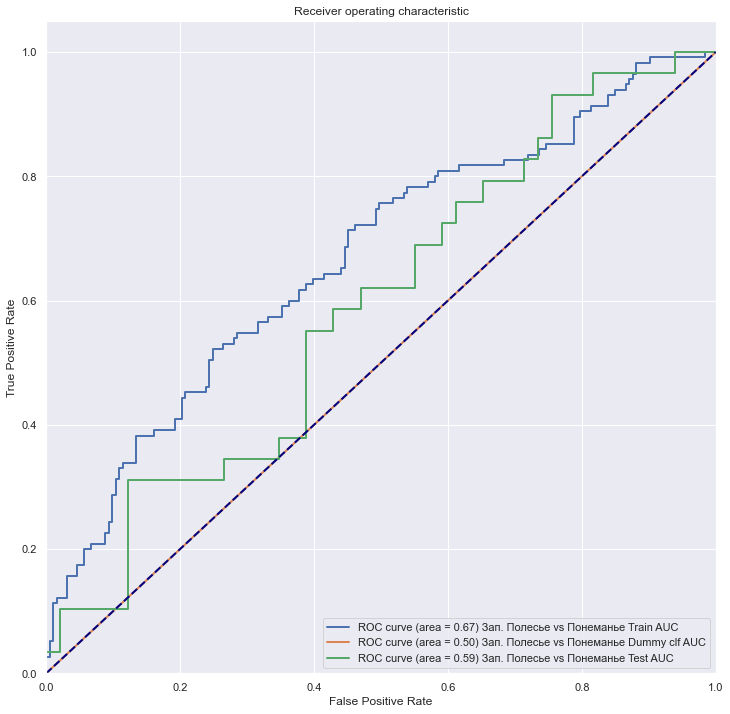

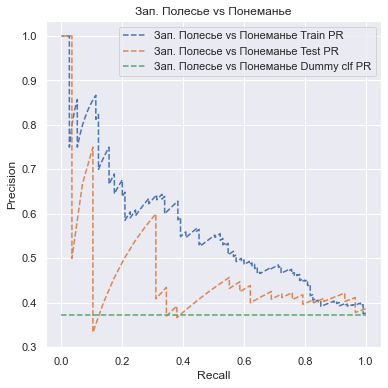

Зап. Полесье     242
Вост. Полесье    135
Name: region, dtype: int64

17          20          82          84          100   \
level_0      target      target      target      target      target   
level_1      TPOX-0   D2S1338-0       vWA-0    D18S51-1    D18S51-0   
0        0.00138295  0.00153957  0.00579204  0.00596324  0.00687363   

               119         139        165        171        294       310   \
level_0      target      target     target     target     target    target   
level_1   D8S1179-1   D16S539-0   PentaE-0      vWA-1  D13S317-1  CSF1PO-0   
0        0.00800058  0.00961385  0.0110155  0.0117613  0.0202666  0.021849   

              371        405        418        424        430        489   \
level_0     target     target     target     target     target     target   
level_1  D16S539-1  D3S1358-0  D19S433-0   D21S11-0   CSF1PO-1  D19S433-1   
0        0.0262236   0.030106  0.0318225  0.0319884  0.0322266  0.0363162   

              493        512        557        562        570        606   \
level_0     target     target     target     target     target     target   
level_1   D21S11-1   D7S820-0   D7S820-1  D2S1338-1   PentaD-1   PentaE-1   
0        0.0367022  0.0382124  0.0401803  0.0403293  0.0408076  0.0429963   

              625        694        814        835        914        973   \
level_0     target     target     target     target     target     target   
level_1  D13S317-0   PentaD-0  D3S1358-1  D8S1179-0   D5S818-1      FGA-0   
0         0.044604  0.0529643  0.0673808  0.0693642  0.0832524  0.0973296   

             1047      1073      1076      1096      1098  
level_0    target    target    target    target    target  
level_1  D5S818-0     FGA-1    TH01-0    TH01-1    TPOX-1  
0        0.114892  0.132476  0.136117  0.148904  0.150371

31        23        11        28        25        27  \
Feature        TPOX-1     FGA-1  D21S11-1    TH01-0  PentaD-1  PentaE-1   
KS value     0.181395  0.143878  0.142487  0.134331  0.129342   0.10948   
KS p-value  0.0178429  0.100601  0.106545  0.146728  0.176939  0.345361   

                  29         32         24         15         20         16  \
Feature       TH01-1      vWA-0   PentaD-0  D3S1358-1  D8S1179-0   D5S818-0   
KS value    0.106362  0.0942238  0.0924487  0.0921128  0.0920169  0.0887066   
KS p-value  0.379702   0.530611   0.554479   0.558967   0.560523   0.606363   

                   26         33         7          0          2          17  \
Feature      PentaE-0      vWA-1   D18S51-1   CSF1PO-0  D13S317-0   D5S818-1   
KS value    0.0828056  0.0708597  0.0631836  0.0595855  0.0559873  0.0550278   
KS p-value   0.689022   0.845855   0.923229   0.949881    0.97035   0.974555   

                   12         14        10         4          1          5   \
Feature     D2S1338-0  D3S1358-0  D21S11-0  D16S539-0   CSF1PO-1  D16S539-1   
KS value    0.0541163  0.0528689  0.050854  0.0490789  0.0478315   0.046824   
KS p-value   0.978233   0.982666  0.988458   0.992208   0.994295   0.995626   

                   9          19         13         22         18        30  \
Feature     D19S433-1   D7S820-1  D2S1338-1      FGA-0   D7S820-0    TPOX-0   
KS value    0.0463922  0.0460084  0.0436576  0.0414508  0.0407311  0.039004   
KS p-value   0.996118   0.996504   0.998318    0.99924   0.999434  0.999732   

                   6          8          3          21  
Feature      D18S51-0  D19S433-0  D13S317-1  D8S1179-1  
KS value    0.0337747   0.033199  0.0281136  0.0147764  
KS p-value   0.999987   0.999991          1          1

0:	total: 2.06ms	remaining: 1.03s
1:	total: 4.52ms	remaining: 1.13s
2:	total: 6.48ms	remaining: 1.07s
3:	total: 8.4ms	remaining: 1.04s
4:	total: 10.3ms	remaining: 1.02s
5:	total: 12.3ms	remaining: 1.02s
6:	total: 14.5ms	remaining: 1.02s
7:	total: 16.4ms	remaining: 1.01s
8:	total: 18.4ms	remaining: 1s
9:	total: 20.3ms	remaining: 992ms
10:	total: 22.1ms	remaining: 983ms
11:	total: 24.1ms	remaining: 981ms
12:	total: 26.3ms	remaining: 986ms
13:	total: 28.4ms	remaining: 986ms
14:	total: 30.4ms	remaining: 984ms
15:	total: 32.4ms	remaining: 979ms
16:	total: 34.6ms	remaining: 983ms
17:	total: 36.9ms	remaining: 988ms
18:	total: 39.8ms	remaining: 1.01s
19:	total: 41.7ms	remaining: 1000ms
20:	total: 43.7ms	remaining: 998ms
21:	total: 45.8ms	remaining: 995ms
22:	total: 48.1ms	remaining: 998ms
23:	total: 49.9ms	remaining: 989ms
24:	total: 51.9ms	remaining: 985ms
25:	total: 53.7ms	remaining: 980ms
26:	total: 55.7ms	remaining: 975ms
27:	total: 57.7ms	remaining: 972ms
28:	total: 59.7ms	remaining: 970m

254:	total: 569ms	remaining: 547ms
255:	total: 574ms	remaining: 547ms
256:	total: 576ms	remaining: 545ms
257:	total: 578ms	remaining: 542ms
258:	total: 580ms	remaining: 540ms
259:	total: 582ms	remaining: 537ms
260:	total: 584ms	remaining: 535ms
261:	total: 586ms	remaining: 532ms
262:	total: 588ms	remaining: 530ms
263:	total: 590ms	remaining: 527ms
264:	total: 592ms	remaining: 525ms
265:	total: 594ms	remaining: 523ms
266:	total: 596ms	remaining: 520ms
267:	total: 598ms	remaining: 518ms
268:	total: 600ms	remaining: 515ms
269:	total: 602ms	remaining: 513ms
270:	total: 604ms	remaining: 510ms
271:	total: 606ms	remaining: 508ms
272:	total: 608ms	remaining: 506ms
273:	total: 611ms	remaining: 504ms
274:	total: 614ms	remaining: 502ms
275:	total: 616ms	remaining: 500ms
276:	total: 617ms	remaining: 497ms
277:	total: 619ms	remaining: 495ms
278:	total: 622ms	remaining: 492ms
279:	total: 624ms	remaining: 490ms
280:	total: 628ms	remaining: 490ms
281:	total: 630ms	remaining: 487ms
282:	total: 632ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.626019  0.657925  0.442492  0.474240
1    rf   0.743053  0.502331  0.639721  0.374751
2    lr   0.500000  0.500000  0.358333  0.360656
3   svm   0.653428  0.603730  0.530711  0.518350

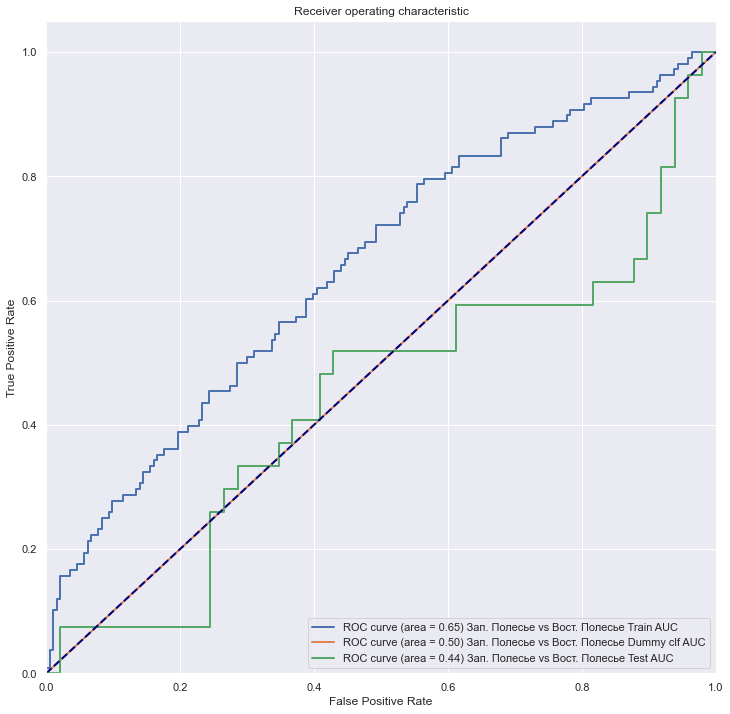

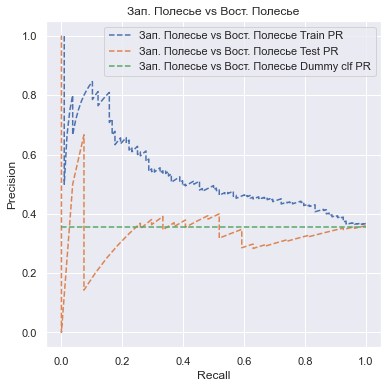

Поозерье       216
Поднепровье    166
Name: region, dtype: int64

16          125         129         138        187   \
level_0       target      target      target      target     target   
level_1       TH01-1   D3S1358-0   D2S1338-1    D7S820-0   D18S51-1   
0        0.000927369  0.00820132  0.00834229  0.00879475  0.0113193   

              214        263        267        283        290        311   \
level_0     target     target     target     target     target     target   
level_1     TPOX-1  D19S433-1   PentaD-1     TPOX-0   PentaE-0   D5S818-1   
0        0.0132743  0.0164231  0.0164563  0.0169981  0.0174259  0.0182966   

              323       336        406        414        431        458   \
level_0     target    target     target     target     target     target   
level_1  D13S317-0  PentaD-0      FGA-0   PentaE-1   D7S820-1  D2S1338-0   
0        0.0193171  0.020162  0.0258352  0.0263612  0.0270143  0.0286246   

              492        522       544        581       594        649   \
level_0     target     target    target     target    target     target   
level_1  D8S1179-1   D21S11-0  D21S11-1     TH01-0  CSF1PO-0  D13S317-1   
0        0.0316862  0.0336218   0.03501  0.0379785  0.039038  0.0420274   

              653        706        736       754        790        805   \
level_0     target     target     target    target     target     target   
level_1      vWA-1  D8S1179-0   CSF1PO-1     FGA-1  D16S539-1   D5S818-0   
0        0.0424775  0.0473528  0.0501378  0.051012  0.0566701  0.0585064   

             828        874        969        1131       1144  
level_0    target     target     target     target     target  
level_1     vWA-0   D18S51-0  D16S539-0  D19S433-0  D3S1358-1  
0        0.060931  0.0657799  0.0766141    0.12272   0.142411

8          15         23         10         6          4   \
Feature     D19S433-0  D3S1358-1      FGA-1   D21S11-0   D18S51-0  D16S539-0   
KS value     0.139797   0.135863  0.0894387  0.0836685  0.0799528  0.0781605   
KS p-value  0.0944846   0.111594   0.546483   0.629584   0.683948    0.71009   

                   22         12         5          13         32         11  \
Feature         FGA-0  D2S1338-0  D16S539-1  D2S1338-1      vWA-0   D21S11-1   
KS value    0.0749257  0.0735268  0.0717346   0.067844  0.0646966  0.0598881   
KS p-value   0.756519   0.775881   0.799655   0.849249   0.885041   0.930638   

                   14         17         30         20         27         16  \
Feature     D3S1358-0   D5S818-1     TPOX-0  D8S1179-0   PentaE-1   D5S818-0   
KS value     0.054555  0.0538556  0.0522382   0.049047  0.0489596  0.0476045   
KS p-value   0.966571   0.970071   0.977327   0.988007   0.988255   0.991426   

                   28         0          7          1          9          18  \
Feature        TH01-0   CSF1PO-0   D18S51-1   CSF1PO-1  D19S433-1   D7S820-0   
KS value    0.0467739  0.0464242  0.0457248  0.0406102  0.0405228  0.0396923   
KS p-value   0.992974   0.993564   0.994646   0.998975   0.999011   0.999289   

                   19         3          25        31         29         26  \
Feature      D7S820-1  D13S317-1   PentaD-1    TPOX-1     TH01-1   PentaE-0   
KS value    0.0393863  0.0378563  0.0348837  0.034228  0.0334849  0.0302063   
KS p-value   0.999379   0.999686   0.999935  0.999957   0.999973   0.999998   

                   33         21         2          24  
Feature         vWA-1  D8S1179-1  D13S317-0   PentaD-0  
KS value    0.0297692  0.0283266  0.0208953  0.0171796  
KS p-value   0.999999          1          1          1

0:	total: 2.99ms	remaining: 1.49s
1:	total: 5.32ms	remaining: 1.32s
2:	total: 7.33ms	remaining: 1.22s
3:	total: 9.4ms	remaining: 1.17s
4:	total: 11.5ms	remaining: 1.14s
5:	total: 13.2ms	remaining: 1.09s
6:	total: 15ms	remaining: 1.06s
7:	total: 18.3ms	remaining: 1.13s
8:	total: 21ms	remaining: 1.14s
9:	total: 23.2ms	remaining: 1.14s
10:	total: 25.1ms	remaining: 1.12s
11:	total: 27ms	remaining: 1.1s
12:	total: 29.2ms	remaining: 1.09s
13:	total: 32.5ms	remaining: 1.13s
14:	total: 35ms	remaining: 1.13s
15:	total: 36.9ms	remaining: 1.11s
16:	total: 38.8ms	remaining: 1.1s
17:	total: 41.2ms	remaining: 1.1s
18:	total: 43.2ms	remaining: 1.09s
19:	total: 45.1ms	remaining: 1.08s
20:	total: 47.1ms	remaining: 1.07s
21:	total: 51.1ms	remaining: 1.11s
22:	total: 53.1ms	remaining: 1.1s
23:	total: 55ms	remaining: 1.09s
24:	total: 57ms	remaining: 1.08s
25:	total: 58.8ms	remaining: 1.07s
26:	total: 60.6ms	remaining: 1.06s
27:	total: 63ms	remaining: 1.06s
28:	total: 66.4ms	remaining: 1.08s
29:	total: 68.

243:	total: 566ms	remaining: 594ms
244:	total: 570ms	remaining: 593ms
245:	total: 573ms	remaining: 592ms
246:	total: 576ms	remaining: 590ms
247:	total: 578ms	remaining: 588ms
248:	total: 581ms	remaining: 585ms
249:	total: 583ms	remaining: 583ms
250:	total: 585ms	remaining: 580ms
251:	total: 587ms	remaining: 578ms
252:	total: 590ms	remaining: 576ms
253:	total: 593ms	remaining: 574ms
254:	total: 595ms	remaining: 572ms
255:	total: 598ms	remaining: 570ms
256:	total: 600ms	remaining: 567ms
257:	total: 602ms	remaining: 565ms
258:	total: 605ms	remaining: 563ms
259:	total: 609ms	remaining: 562ms
260:	total: 612ms	remaining: 560ms
261:	total: 614ms	remaining: 558ms
262:	total: 616ms	remaining: 555ms
263:	total: 618ms	remaining: 553ms
264:	total: 623ms	remaining: 553ms
265:	total: 625ms	remaining: 550ms
266:	total: 628ms	remaining: 548ms
267:	total: 630ms	remaining: 546ms
268:	total: 632ms	remaining: 543ms
269:	total: 634ms	remaining: 540ms
270:	total: 637ms	remaining: 538ms
271:	total: 640ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.767022  0.539760  0.739531  0.563944
1    rf   0.776148  0.523965  0.748398  0.471534
2    lr   0.500000  0.500000  0.434426  0.442623
3   svm   0.670221  0.446623  0.592677  0.506895

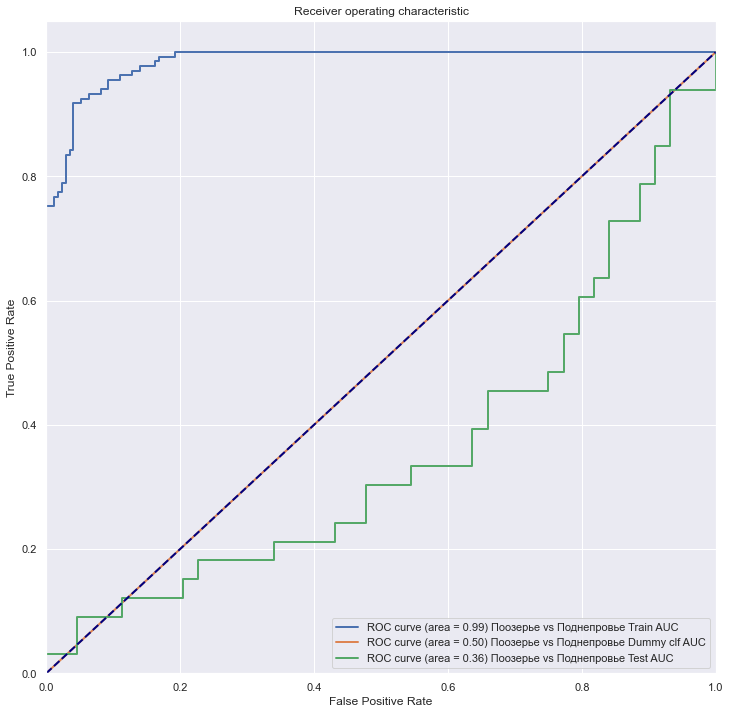

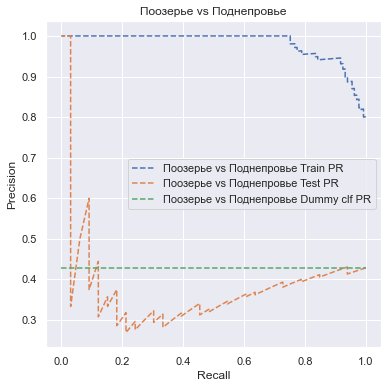

Поозерье     216
Понеманье    144
Name: region, dtype: int64

190        201        264        270        296        304   \
level_0     target     target     target     target     target     target   
level_1  D8S1179-1  D3S1358-0     TH01-0  D19S433-1   D7S820-0  D16S539-1   
0        0.0127188  0.0133096  0.0178117  0.0180162  0.0197658  0.0208981   

              330        335        399        453        457        556   \
level_0     target     target     target     target     target     target   
level_1   D18S51-1  D13S317-1      vWA-0   CSF1PO-1   PentaD-0  D16S539-0   
0        0.0229458  0.0230931  0.0285135  0.0329521  0.0330696  0.0402425   

              588        590        610        645        652        738   \
level_0     target     target     target     target     target     target   
level_1  D19S433-0      FGA-0      FGA-1   PentaD-1     TH01-1   D7S820-1   
0        0.0412483  0.0413302  0.0424026  0.0442395  0.0445441  0.0545107   

              786        791        834        866        877       899   \
level_0     target     target     target     target     target    target   
level_1  D3S1358-1     TPOX-1   PentaE-0  D8S1179-0   D21S11-1     vWA-1   
0        0.0584432  0.0588781  0.0631709   0.066206  0.0680756  0.070219   

              907        924        958        1038       1047      1065  \
level_0     target     target     target     target     target    target   
level_1  D13S317-0  D2S1338-0  D2S1338-1   PentaE-1   D5S818-1    TPOX-0   
0        0.0711137  0.0738407  0.0784594  0.0945298  0.0968025  0.102541   

             1074      1092      1095      1138  
level_0    target    target    target    target  
level_1  D21S11-0  D5S818-0  D18S51-0  CSF1PO-0  
0        0.104678  0.110063  0.110385  0.132302

10        27        19         12        0         16  \
Feature     D21S11-0  PentaE-1  D7S820-1  D2S1338-0  CSF1PO-0  D5S818-0   
KS value    0.140789  0.128676  0.123498   0.117316   0.11626  0.113747   
KS p-value   0.11313  0.182706  0.216523   0.269624  0.282638  0.306147   

                  11         13         2          15        30         24  \
Feature     D21S11-1  D2S1338-1  D13S317-0  D3S1358-1    TPOX-0   PentaD-0   
KS value     0.10284   0.102488  0.0997235  0.0995728  0.094848  0.0939935   
KS p-value  0.421293   0.427354   0.460708   0.463357  0.519653   0.535053   

                   3          4          5          18         6          23  \
Feature     D13S317-1  D16S539-0  D16S539-1   D7S820-0   D18S51-0      FGA-1   
KS value    0.0937924  0.0908268  0.0892184  0.0853481  0.0850465  0.0757979   
KS p-value   0.538698   0.579402   0.596355   0.654463   0.659863   0.787457   

                   31         7          26         14         29         17  \
Feature        TPOX-1   D18S51-1   PentaE-0  D3S1358-0     TH01-1   D5S818-1   
KS value    0.0736366  0.0727318  0.0713747  0.0700679  0.0659462  0.0646896   
KS p-value   0.813108   0.826011   0.839175   0.856901   0.897384   0.910912   

                  33         20         22         25         1          28  \
Feature        vWA-1  D8S1179-0      FGA-0   PentaD-1   CSF1PO-1     TH01-0   
KS value    0.063232  0.0553908  0.0544861  0.0523247  0.0423725  0.0394069   
KS p-value   0.92186   0.973483   0.976444   0.984684   0.998914   0.999676   

                   21         32         8          9   
Feature     D8S1179-1      vWA-0  D19S433-0  D19S433-1  
KS value    0.0393566  0.0315657  0.0275446  0.0218145  
KS p-value   0.999683   0.999998          1          1

0:	total: 2.3ms	remaining: 1.15s
1:	total: 4.63ms	remaining: 1.15s
2:	total: 6.83ms	remaining: 1.13s
3:	total: 8.82ms	remaining: 1.09s
4:	total: 10.7ms	remaining: 1.06s
5:	total: 14.4ms	remaining: 1.18s
6:	total: 16.3ms	remaining: 1.15s
7:	total: 18.3ms	remaining: 1.12s
8:	total: 20.9ms	remaining: 1.14s
9:	total: 22.9ms	remaining: 1.12s
10:	total: 24.7ms	remaining: 1.1s
11:	total: 27.5ms	remaining: 1.12s
12:	total: 29.6ms	remaining: 1.11s
13:	total: 31.7ms	remaining: 1.1s
14:	total: 33.9ms	remaining: 1.1s
15:	total: 36ms	remaining: 1.09s
16:	total: 38.1ms	remaining: 1.08s
17:	total: 40.2ms	remaining: 1.08s
18:	total: 43.8ms	remaining: 1.11s
19:	total: 45.8ms	remaining: 1.1s
20:	total: 47.9ms	remaining: 1.09s
21:	total: 50.1ms	remaining: 1.09s
22:	total: 52.1ms	remaining: 1.08s
23:	total: 54ms	remaining: 1.07s
24:	total: 55.9ms	remaining: 1.06s
25:	total: 59.8ms	remaining: 1.09s
26:	total: 61.8ms	remaining: 1.08s
27:	total: 63.9ms	remaining: 1.08s
28:	total: 66ms	remaining: 1.07s
29:	to

292:	total: 768ms	remaining: 543ms
293:	total: 773ms	remaining: 542ms
294:	total: 775ms	remaining: 539ms
295:	total: 777ms	remaining: 536ms
296:	total: 781ms	remaining: 534ms
297:	total: 785ms	remaining: 532ms
298:	total: 787ms	remaining: 529ms
299:	total: 791ms	remaining: 527ms
300:	total: 797ms	remaining: 527ms
301:	total: 800ms	remaining: 525ms
302:	total: 803ms	remaining: 522ms
303:	total: 805ms	remaining: 519ms
304:	total: 808ms	remaining: 516ms
305:	total: 810ms	remaining: 513ms
306:	total: 814ms	remaining: 512ms
307:	total: 816ms	remaining: 509ms
308:	total: 818ms	remaining: 506ms
309:	total: 820ms	remaining: 503ms
310:	total: 822ms	remaining: 499ms
311:	total: 824ms	remaining: 497ms
312:	total: 827ms	remaining: 494ms
313:	total: 831ms	remaining: 492ms
314:	total: 834ms	remaining: 490ms
315:	total: 837ms	remaining: 487ms
316:	total: 840ms	remaining: 485ms
317:	total: 845ms	remaining: 484ms
318:	total: 848ms	remaining: 481ms
319:	total: 851ms	remaining: 479ms
320:	total: 853ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.770558  0.613043  0.692339  0.561994
1    rf   0.802536  0.426087  0.751385  0.363141
2    lr   0.500000  0.500000  0.400000  0.396552
3   svm   1.000000  0.462112  1.000000  0.371390

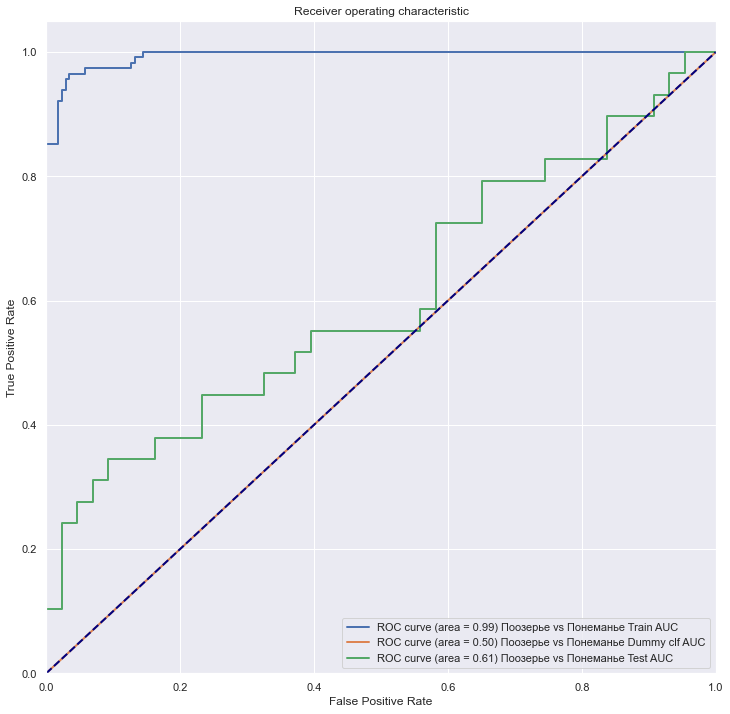

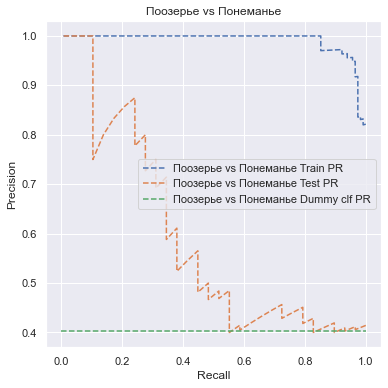

Поозерье         216
Вост. Полесье    135
Name: region, dtype: int64

60         160        176        191        253        266   \
level_0      target     target     target     target     target     target   
level_1    CSF1PO-0   D21S11-1  D13S317-1  D3S1358-0  D19S433-0  D8S1179-1   
0        0.00381931  0.0103727  0.0124166  0.0131343  0.0179662  0.0183784   

              292        322        332        360        372        415   \
level_0     target     target     target     target     target     target   
level_1  D2S1338-0   PentaD-1  D19S433-1   PentaE-0     TH01-1   D5S818-1   
0         0.019532  0.0214066  0.0221267  0.0262963  0.0270167  0.0292722   

              427        436        465        501        502        575   \
level_0     target     target     target     target     target     target   
level_1      FGA-1  D13S317-0      FGA-0   D7S820-1   D7S820-0  D16S539-0   
0        0.0298908  0.0309241  0.0329027  0.0351577  0.0352022  0.0416006   

              579       581        608        655        727        787   \
level_0     target    target     target     target     target     target   
level_1   CSF1PO-1  PentaD-0  D3S1358-1     TPOX-1   PentaE-1  D16S539-1   
0        0.0423317  0.042358  0.0442436  0.0474914  0.0547374  0.0621889   

              863       886        939       963        982        990   \
level_0     target    target     target    target     target     target   
level_1      vWA-0     vWA-1     TH01-0  D18S51-0   D21S11-0   D18S51-1   
0        0.0721705  0.077375  0.0820917  0.085782  0.0886336  0.0901975   

              994        1055      1071     1117  
level_0     target     target    target   target  
level_1  D8S1179-0  D2S1338-1  D5S818-0   TPOX-0  
0         0.090278   0.107612  0.111877  0.12908

10        7         11        6         30         13  \
Feature     D21S11-0  D18S51-1  D21S11-1  D18S51-0    TPOX-0  D2S1338-1   
KS value    0.133936  0.125323  0.122093  0.114341  0.111972   0.106589   
KS p-value  0.165667  0.224421   0.25003  0.320395  0.344362   0.403089   

                   29         27         32         20         16         33  \
Feature        TH01-1   PentaE-1      vWA-0  D8S1179-0   D5S818-0      vWA-1   
KS value    0.0999139  0.0992679  0.0986219  0.0932386  0.0867786  0.0861326   
KS p-value   0.483599   0.491797   0.500014   0.571174   0.659089   0.668398   

                   18         15         28         3         24         19  \
Feature      D7S820-0  D3S1358-1     TH01-0  D13S317-1  PentaD-0   D7S820-1   
KS value    0.0859173  0.0839793  0.0829027   0.080534  0.077304  0.0757967   
KS p-value   0.671164   0.698002    0.71259   0.744516    0.7863    0.80566   

                   22         31         0          5          12         26  \
Feature         FGA-0     TPOX-1   CSF1PO-0  D16S539-1  D2S1338-0   PentaE-0   
KS value    0.0686908  0.0673988  0.0667528  0.0645995  0.0645995  0.0639535   
KS p-value   0.885809   0.898168   0.904218   0.922791   0.922791   0.928154   

                   25         14         23         2          4          9   \
Feature      PentaD-1  D3S1358-0      FGA-1  D13S317-0  D16S539-0  D19S433-1   
KS value    0.0605082  0.0596469  0.0482343  0.0482343  0.0478036  0.0430663   
KS p-value   0.952479   0.957686   0.995137   0.995137    0.99569   0.999019   

                   17         1          8          21  
Feature      D5S818-1   CSF1PO-1  D19S433-0  D8S1179-1  
KS value    0.0430663  0.0329457  0.0267011  0.0193798  
KS p-value   0.999019   0.999996          1          1

0:	total: 2.46ms	remaining: 1.23s
1:	total: 4.52ms	remaining: 1.13s
2:	total: 6.67ms	remaining: 1.1s
3:	total: 9.92ms	remaining: 1.23s
4:	total: 12.1ms	remaining: 1.2s
5:	total: 14.4ms	remaining: 1.19s
6:	total: 16.4ms	remaining: 1.16s
7:	total: 18.5ms	remaining: 1.14s
8:	total: 20.3ms	remaining: 1.1s
9:	total: 22.8ms	remaining: 1.12s
10:	total: 25.7ms	remaining: 1.14s
11:	total: 29.3ms	remaining: 1.19s
12:	total: 31.8ms	remaining: 1.19s
13:	total: 34ms	remaining: 1.18s
14:	total: 36.2ms	remaining: 1.17s
15:	total: 40.2ms	remaining: 1.22s
16:	total: 42.2ms	remaining: 1.2s
17:	total: 44.2ms	remaining: 1.18s
18:	total: 46.5ms	remaining: 1.18s
19:	total: 48.7ms	remaining: 1.17s
20:	total: 50.6ms	remaining: 1.16s
21:	total: 52.8ms	remaining: 1.15s
22:	total: 56.6ms	remaining: 1.17s
23:	total: 58.6ms	remaining: 1.16s
24:	total: 60.6ms	remaining: 1.15s
25:	total: 62.8ms	remaining: 1.14s
26:	total: 64.7ms	remaining: 1.13s
27:	total: 66.4ms	remaining: 1.12s
28:	total: 68.3ms	remaining: 1.11s
2

300:	total: 764ms	remaining: 505ms
301:	total: 766ms	remaining: 502ms
302:	total: 768ms	remaining: 499ms
303:	total: 775ms	remaining: 500ms
304:	total: 779ms	remaining: 498ms
305:	total: 784ms	remaining: 497ms
306:	total: 791ms	remaining: 497ms
307:	total: 793ms	remaining: 495ms
308:	total: 797ms	remaining: 492ms
309:	total: 800ms	remaining: 490ms
310:	total: 802ms	remaining: 488ms
311:	total: 805ms	remaining: 485ms
312:	total: 807ms	remaining: 482ms
313:	total: 810ms	remaining: 480ms
314:	total: 813ms	remaining: 477ms
315:	total: 815ms	remaining: 474ms
316:	total: 817ms	remaining: 472ms
317:	total: 822ms	remaining: 471ms
318:	total: 825ms	remaining: 468ms
319:	total: 827ms	remaining: 465ms
320:	total: 829ms	remaining: 462ms
321:	total: 831ms	remaining: 459ms
322:	total: 833ms	remaining: 457ms
323:	total: 837ms	remaining: 455ms
324:	total: 839ms	remaining: 452ms
325:	total: 843ms	remaining: 450ms
326:	total: 845ms	remaining: 447ms
327:	total: 847ms	remaining: 444ms
328:	total: 850ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.972026  0.598930  0.964798  0.480427
1    rf   0.755056  0.528075  0.667313  0.402083
2    lr   0.500000  0.500000  0.383929  0.392857
3   svm   0.668352  0.639037  0.581788  0.467487

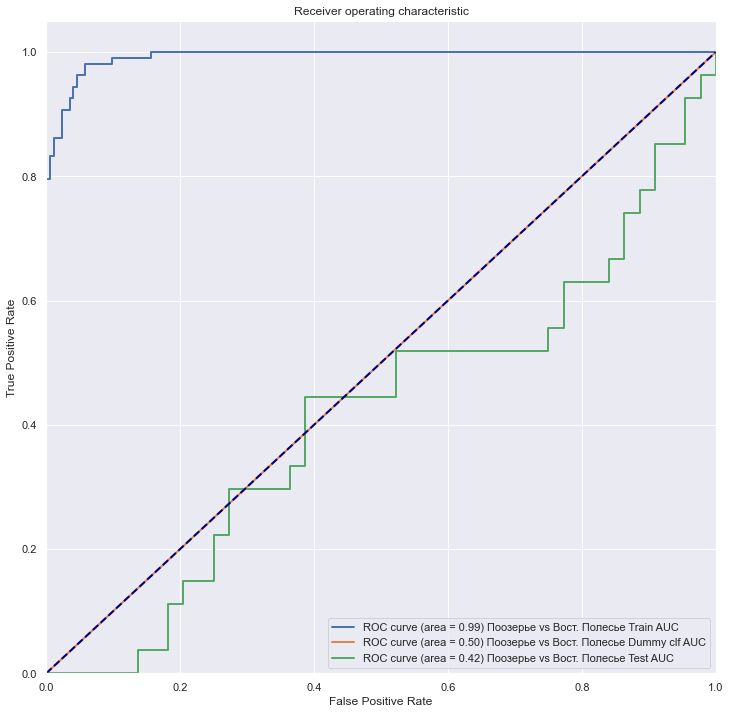

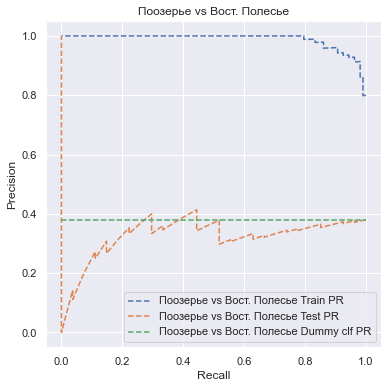

Поднепровье    166
Понеманье      144
Name: region, dtype: int64

39          61          73          83          122   \
level_0      target      target      target      target      target   
level_1    D7S820-0    PentaD-0   D3S1358-0   D19S433-1   D13S317-0   
0        0.00357037  0.00549676  0.00614192  0.00649418  0.00993452   

              133        136        164        266        333        370   \
level_0     target     target     target     target     target     target   
level_1   PentaE-0     TH01-1      FGA-0   PentaE-1  D2S1338-1  D8S1179-0   
0        0.0107822  0.0109246  0.0128557  0.0201503   0.024972  0.0278749   

              377        380        388        394        432        453   \
level_0     target     target     target     target     target     target   
level_1      vWA-0   D18S51-1  D13S317-1   D18S51-0  D2S1338-0     TPOX-1   
0        0.0281742  0.0282358  0.0292115  0.0295364  0.0324674  0.0340276   

              483       506        530        656        707        738   \
level_0     target    target     target     target     target     target   
level_1     TH01-0  PentaD-1   D7S820-1   D5S818-0     TPOX-0   D5S818-1   
0        0.0359401  0.037372  0.0386071  0.0494751  0.0549828  0.0581703   

              796        835        883        897        944        962   \
level_0     target     target     target     target     target     target   
level_1  D8S1179-1   D21S11-1      vWA-1      FGA-1  D19S433-0   CSF1PO-1   
0        0.0641487  0.0689689  0.0754905  0.0769887  0.0833274  0.0855223   

             1048      1054       1100       1131       1142  
level_0    target    target     target     target     target  
level_1  CSF1PO-0  D21S11-0  D16S539-1  D16S539-0  D3S1358-1  
0         0.10487  0.106468   0.122304   0.142654   0.150853

15         4          13        27        0          5   \
Feature     D3S1358-1  D16S539-0  D2S1338-1  PentaE-1  CSF1PO-0  D16S539-1   
KS value     0.168813   0.146715   0.142465   0.12272   0.11847   0.117686   
KS p-value  0.0511954   0.123719   0.144497  0.280146  0.318484   0.325705   

                   8         11        10         17         3          21  \
Feature     D19S433-0  D21S11-1  D21S11-0   D5S818-1  D13S317-1  D8S1179-1   
KS value     0.116901  0.110101  0.105132  0.0979405  0.0889179  0.0830991   
KS p-value   0.333792  0.404565  0.461714    0.55069   0.669476   0.745696   

                   23         7          12         16         19         33  \
Feature         FGA-1   D18S51-1  D2S1338-0   D5S818-0   D7S820-1      vWA-1   
KS value    0.0753841  0.0713305  0.0701536  0.0696306  0.0652501  0.0638771   
KS p-value   0.838971   0.881902   0.893173   0.897991   0.933699   0.943464   

                   1          25         2          30         32         9   \
Feature      CSF1PO-1   PentaD-1  D13S317-0     TPOX-0      vWA-0  D19S433-1   
KS value    0.0611311  0.0604119  0.0599542  0.0582543  0.0570121  0.0528931   
KS p-value   0.959807    0.96359   0.965836   0.973403   0.978267    0.98994   

                  22         20         24         28         26         31  \
Feature        FGA-0  D8S1179-0   PentaD-0     TH01-0   PentaE-0     TPOX-1   
KS value    0.049951  0.0497548  0.0479895  0.0458974  0.0420399  0.0365479   
KS p-value  0.994863   0.995039   0.996916   0.998337   0.999588   0.999974   

                   14         6          29         18  
Feature     D3S1358-0   D18S51-0     TH01-1   D7S820-0  
KS value    0.0349788  0.0344557  0.0332788  0.0318405  
KS p-value   0.999991   0.999994   0.999997   0.999999

0:	total: 3.12ms	remaining: 1.56s
1:	total: 5.31ms	remaining: 1.32s
2:	total: 7.25ms	remaining: 1.2s
3:	total: 9.16ms	remaining: 1.14s
4:	total: 11ms	remaining: 1.09s
5:	total: 14.8ms	remaining: 1.22s
6:	total: 16.7ms	remaining: 1.18s
7:	total: 18.9ms	remaining: 1.16s
8:	total: 20.9ms	remaining: 1.14s
9:	total: 23.2ms	remaining: 1.14s
10:	total: 25.2ms	remaining: 1.12s
11:	total: 27.5ms	remaining: 1.12s
12:	total: 30.5ms	remaining: 1.14s
13:	total: 32.6ms	remaining: 1.13s
14:	total: 34.8ms	remaining: 1.12s
15:	total: 36.8ms	remaining: 1.11s
16:	total: 38.8ms	remaining: 1.1s
17:	total: 40.8ms	remaining: 1.09s
18:	total: 43.2ms	remaining: 1.09s
19:	total: 47.1ms	remaining: 1.13s
20:	total: 49.5ms	remaining: 1.13s
21:	total: 51.5ms	remaining: 1.12s
22:	total: 53.4ms	remaining: 1.11s
23:	total: 55.5ms	remaining: 1.1s
24:	total: 57.4ms	remaining: 1.09s
25:	total: 61.1ms	remaining: 1.11s
26:	total: 64.5ms	remaining: 1.13s
27:	total: 66.9ms	remaining: 1.13s
28:	total: 69ms	remaining: 1.12s
29

315:	total: 755ms	remaining: 440ms
316:	total: 761ms	remaining: 439ms
317:	total: 764ms	remaining: 437ms
318:	total: 766ms	remaining: 434ms
319:	total: 768ms	remaining: 432ms
320:	total: 770ms	remaining: 429ms
321:	total: 772ms	remaining: 427ms
322:	total: 775ms	remaining: 425ms
323:	total: 777ms	remaining: 422ms
324:	total: 780ms	remaining: 420ms
325:	total: 782ms	remaining: 417ms
326:	total: 784ms	remaining: 415ms
327:	total: 786ms	remaining: 412ms
328:	total: 790ms	remaining: 410ms
329:	total: 794ms	remaining: 409ms
330:	total: 796ms	remaining: 407ms
331:	total: 798ms	remaining: 404ms
332:	total: 801ms	remaining: 401ms
333:	total: 803ms	remaining: 399ms
334:	total: 807ms	remaining: 397ms
335:	total: 809ms	remaining: 395ms
336:	total: 811ms	remaining: 392ms
337:	total: 813ms	remaining: 390ms
338:	total: 815ms	remaining: 387ms
339:	total: 817ms	remaining: 385ms
340:	total: 819ms	remaining: 382ms
341:	total: 823ms	remaining: 380ms
342:	total: 826ms	remaining: 378ms
343:	total: 828ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.709290  0.455717  0.649612  0.470498
1    rf   0.832701  0.267311  0.822895  0.358571
2    lr   0.500000  0.500000  0.464646  0.460000
3   svm   0.711957  0.375201  0.700898  0.456202

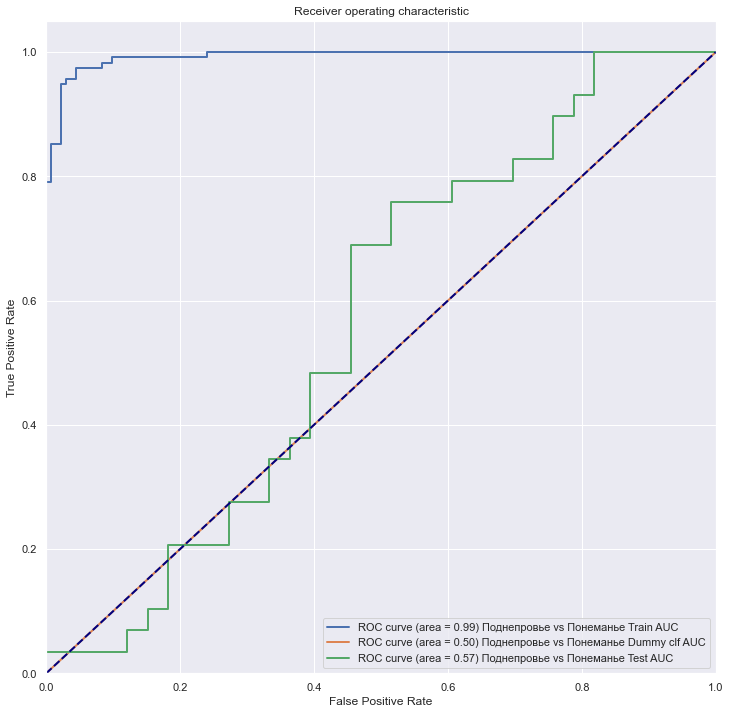

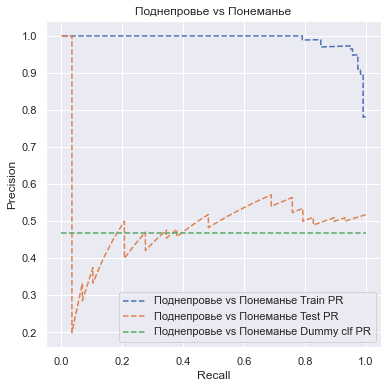

Поднепровье      166
Вост. Полесье    135
Name: region, dtype: int64

17          59          78          110        172        228   \
level_0      target      target      target      target     target     target   
level_1   D2S1338-0   D3S1358-0   D13S317-1       FGA-0   D18S51-0   D7S820-0   
0        0.00126942  0.00596709  0.00692283  0.00856794  0.0137748  0.0179451   

              243        261        352        371        377        385   \
level_0     target     target     target     target     target     target   
level_1      FGA-1  D19S433-0  D13S317-0   PentaD-0  D16S539-0   D5S818-1   
0        0.0186198  0.0199109  0.0265329  0.0285599  0.0290223  0.0298019   

              488        493        508        559        602        654   \
level_0     target     target     target     target     target     target   
level_1  D16S539-1  D19S433-1   CSF1PO-1   D21S11-1  D8S1179-1   PentaE-0   
0        0.0377187  0.0380992  0.0394237  0.0439428  0.0486258  0.0542764   

              677        732        767        793        912        919   \
level_0     target     target     target     target     target     target   
level_1   D7S820-1   CSF1PO-0     TPOX-1      vWA-1   PentaD-1     TH01-0   
0        0.0561717  0.0606277  0.0644195  0.0672168  0.0808292  0.0821997   

              920        960        975        998       1016      1034  \
level_0     target     target     target     target    target    target   
level_1  D8S1179-0   D21S11-0  D2S1338-1     TH01-1  PentaE-1  D18S51-1   
0        0.0825502  0.0886744  0.0924755  0.0962359  0.100349  0.103786   

             1051      1077      1093       1099  
level_0    target    target    target     target  
level_1  D5S818-0    TPOX-0     vWA-0  D3S1358-1  
0        0.107156  0.116506  0.122311   0.125128

15        32        19        11        30        29  \
Feature     D3S1358-1     vWA-0  D7S820-1  D21S11-1    TPOX-0    TH01-1   
KS value      0.14899   0.12963  0.112795  0.108586  0.107744  0.101852   
KS p-value    0.12748  0.245659  0.401827  0.448831  0.458574  0.529623   

                  7         10        16         26         27         25  \
Feature     D18S51-1  D21S11-0  D5S818-0   PentaE-0   PentaE-1   PentaD-1   
KS value     0.10101   0.10101  0.100168  0.0984848  0.0968013  0.0968013   
KS p-value  0.540163  0.540163  0.550702   0.572072   0.593687   0.593687   

                   31         6          0          13         12         17  \
Feature        TPOX-1   D18S51-0   CSF1PO-0  D2S1338-1  D2S1338-0   D5S818-1   
KS value    0.0925926  0.0917508  0.0909091  0.0909091  0.0875421  0.0850168   
KS p-value   0.648242   0.659288   0.670148   0.670148   0.713816    0.74585   

                   23         20         28         21         33         24  \
Feature         FGA-1  D8S1179-0     TH01-0  D8S1179-1      vWA-1   PentaD-0   
KS value    0.0850168  0.0749158  0.0732323  0.0656566  0.0648148  0.0614478   
KS p-value    0.74585    0.86306   0.879853   0.942008   0.947404   0.965861   

                   3          14         8          2          9          18  \
Feature     D13S317-1  D3S1358-0  D19S433-0  D13S317-0  D19S433-1   D7S820-0   
KS value    0.0563973  0.0547138   0.047138  0.0462963  0.0420875  0.0420875   
KS p-value   0.984806   0.988955    0.99834   0.998733   0.999745   0.999745   

                   1          5          22         4   
Feature      CSF1PO-1  D16S539-1      FGA-0  D16S539-0  
KS value    0.0420875  0.0387205  0.0277778  0.0252525  
KS p-value   0.999745   0.999951          1          1

0:	total: 2.01ms	remaining: 1s
1:	total: 3.98ms	remaining: 991ms
2:	total: 8.15ms	remaining: 1.35s
3:	total: 9.97ms	remaining: 1.24s
4:	total: 12.1ms	remaining: 1.19s
5:	total: 14.2ms	remaining: 1.17s
6:	total: 16.2ms	remaining: 1.14s
7:	total: 18.1ms	remaining: 1.11s
8:	total: 19.9ms	remaining: 1.08s
9:	total: 23.7ms	remaining: 1.16s
10:	total: 25.6ms	remaining: 1.14s
11:	total: 28.1ms	remaining: 1.14s
12:	total: 30ms	remaining: 1.12s
13:	total: 31.8ms	remaining: 1.1s
14:	total: 33.7ms	remaining: 1.09s
15:	total: 35.6ms	remaining: 1.08s
16:	total: 39.2ms	remaining: 1.11s
17:	total: 41ms	remaining: 1.1s
18:	total: 42.9ms	remaining: 1.09s
19:	total: 44.9ms	remaining: 1.08s
20:	total: 46.7ms	remaining: 1.06s
21:	total: 48.8ms	remaining: 1.06s
22:	total: 50.6ms	remaining: 1.05s
23:	total: 53.5ms	remaining: 1.06s
24:	total: 55.5ms	remaining: 1.05s
25:	total: 57.4ms	remaining: 1.05s
26:	total: 59.4ms	remaining: 1.04s
27:	total: 61.3ms	remaining: 1.03s
28:	total: 63.7ms	remaining: 1.03s
29:	

290:	total: 765ms	remaining: 549ms
291:	total: 774ms	remaining: 551ms
292:	total: 779ms	remaining: 550ms
293:	total: 783ms	remaining: 549ms
294:	total: 788ms	remaining: 548ms
295:	total: 791ms	remaining: 545ms
296:	total: 793ms	remaining: 542ms
297:	total: 795ms	remaining: 539ms
298:	total: 798ms	remaining: 536ms
299:	total: 800ms	remaining: 533ms
300:	total: 803ms	remaining: 531ms
301:	total: 806ms	remaining: 528ms
302:	total: 808ms	remaining: 525ms
303:	total: 810ms	remaining: 522ms
304:	total: 812ms	remaining: 519ms
305:	total: 814ms	remaining: 516ms
306:	total: 818ms	remaining: 514ms
307:	total: 820ms	remaining: 511ms
308:	total: 822ms	remaining: 508ms
309:	total: 825ms	remaining: 505ms
310:	total: 827ms	remaining: 502ms
311:	total: 833ms	remaining: 502ms
312:	total: 836ms	remaining: 500ms
313:	total: 839ms	remaining: 497ms
314:	total: 843ms	remaining: 495ms
315:	total: 846ms	remaining: 492ms
316:	total: 852ms	remaining: 492ms
317:	total: 855ms	remaining: 489ms
318:	total: 858ms	re

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.991992  0.559441  0.991166  0.496307
1    rf   0.919482  0.515734  0.919140  0.494965
2    lr   0.808469  0.416084  0.778165  0.408183
3   svm   0.799254  0.419580  0.763581  0.409161

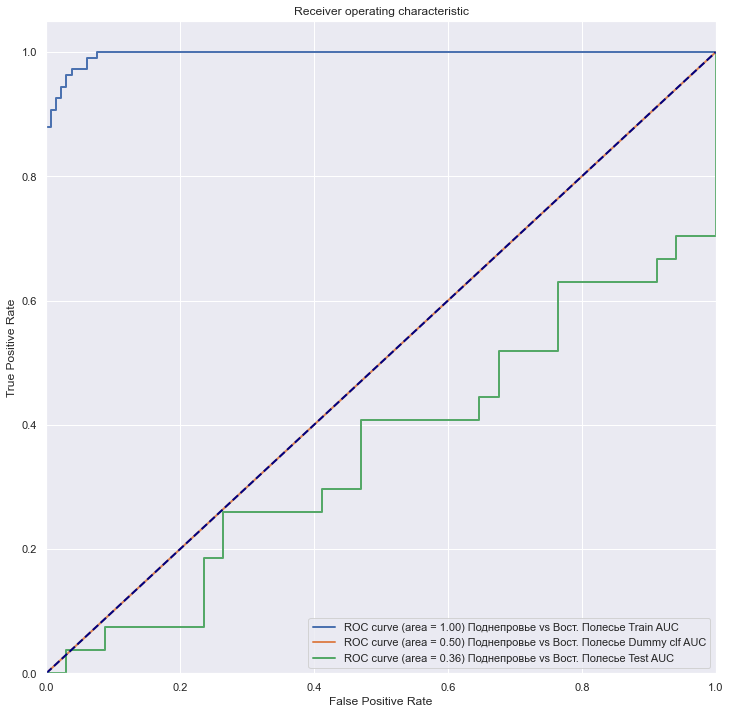

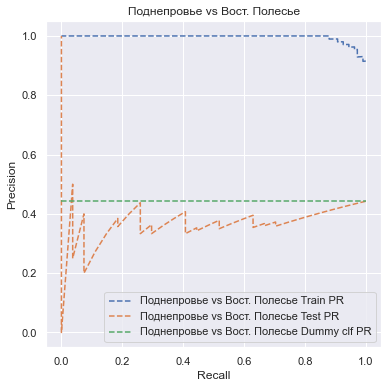

Понеманье        144
Вост. Полесье    135
Name: region, dtype: int64

7           32          76         125        153       164   \
level_0      target      target      target     target     target    target   
level_1    D5S818-1   D8S1179-0   D3S1358-0  D19S433-0  D8S1179-1  PentaD-0   
0        0.00015649  0.00312487  0.00571817  0.0108256  0.0119102  0.013593   

              254        319        347        354        380        400   \
level_0     target     target     target     target     target     target   
level_1  D3S1358-1     TPOX-0   D21S11-0  D19S433-1      vWA-1  D13S317-0   
0        0.0199874  0.0255508  0.0271993  0.0276244  0.0298401  0.0310993   

              434        445        510        552       565       623   \
level_0     target     target     target     target    target    target   
level_1   D5S818-0   D18S51-0  D2S1338-1   D7S820-0  PentaD-1  D21S11-1   
0        0.0336338  0.0343695  0.0385545  0.0431893  0.043826  0.050094   

              626        644        735        790        795        802   \
level_0     target     target     target     target     target     target   
level_1   D18S51-1  D13S317-1   D7S820-1      FGA-0  D2S1338-0     TPOX-1   
0        0.0508719   0.051604  0.0615195  0.0692119  0.0695741  0.0707939   

              831        844        853        977       995       1005  \
level_0     target     target     target     target    target    target   
level_1   PentaE-0   CSF1PO-0   CSF1PO-1      vWA-0     FGA-1    TH01-1   
0        0.0748083  0.0768786  0.0777574  0.0968648  0.104054  0.105066   

             1011       1027       1080      1115  
level_0    target     target     target    target  
level_1    TH01-0  D16S539-1  D16S539-0  PentaE-1  
0        0.107635   0.110949   0.125984  0.147526

27         4          5         29        23         12  \
Feature      PentaE-1  D16S539-0  D16S539-1    TH01-1     FGA-1  D2S1338-0   
KS value     0.220451   0.148309   0.146216   0.13591  0.131804   0.130032   
KS p-value  0.0071107   0.150889    0.16203  0.226184  0.256108   0.270345   

                  32        26        24        28         13         6   \
Feature        vWA-0  PentaE-0  PentaD-0    TH01-0  D2S1338-1   D18S51-0   
KS value    0.122383  0.115217  0.111192  0.108213  0.0942029  0.0904992   
KS p-value  0.337161   0.40825  0.452005  0.485577   0.657509   0.704429   

                  31         1          25         7          33         11  \
Feature       TPOX-1   CSF1PO-1   PentaD-1   D18S51-1      vWA-1   D21S11-1   
KS value    0.089694  0.0862319  0.0798712  0.0772947  0.0662641  0.0652174   
KS p-value  0.714008   0.756774   0.829583   0.856893   0.947801   0.953898   

                   22         18         0          17         19         16  \
Feature         FGA-0   D7S820-0   CSF1PO-0   D5S818-1   D7S820-1   D5S818-0   
KS value    0.0640902  0.0561192  0.0524155  0.0515298  0.0491143  0.0471014   
KS p-value   0.959713   0.988529   0.994514   0.995556   0.997733   0.998796   

                   20         14         9          21         3          2   \
Feature     D8S1179-0  D3S1358-0  D19S433-1  D8S1179-1  D13S317-1  D13S317-0   
KS value    0.0434783  0.0433172  0.0430757  0.0427536   0.042351  0.0369565   
KS p-value   0.999641   0.999665   0.999698   0.999737    0.99978   0.999988   

                   15         10         30         8   
Feature     D3S1358-1   D21S11-0     TPOX-0  D19S433-0  
KS value    0.0283414  0.0241546  0.0215781  0.0206119  
KS p-value          1          1          1          1

0:	total: 2.3ms	remaining: 1.15s
1:	total: 4.36ms	remaining: 1.08s
2:	total: 6.6ms	remaining: 1.09s
3:	total: 8.5ms	remaining: 1.05s
4:	total: 11.6ms	remaining: 1.15s
5:	total: 13.8ms	remaining: 1.14s
6:	total: 16.1ms	remaining: 1.13s
7:	total: 18.3ms	remaining: 1.13s
8:	total: 20.5ms	remaining: 1.12s
9:	total: 22.4ms	remaining: 1.1s
10:	total: 25.6ms	remaining: 1.14s
11:	total: 28.7ms	remaining: 1.17s
12:	total: 31.1ms	remaining: 1.16s
13:	total: 34.8ms	remaining: 1.21s
14:	total: 39.3ms	remaining: 1.27s
15:	total: 44.1ms	remaining: 1.33s
16:	total: 47.7ms	remaining: 1.36s
17:	total: 50.5ms	remaining: 1.35s
18:	total: 53.5ms	remaining: 1.35s
19:	total: 60.9ms	remaining: 1.46s
20:	total: 63.4ms	remaining: 1.45s
21:	total: 65.5ms	remaining: 1.42s
22:	total: 67.4ms	remaining: 1.4s
23:	total: 70.1ms	remaining: 1.39s
24:	total: 74.5ms	remaining: 1.42s
25:	total: 76.5ms	remaining: 1.4s
26:	total: 78.7ms	remaining: 1.38s
27:	total: 81ms	remaining: 1.36s
28:	total: 82.8ms	remaining: 1.34s
29:

302:	total: 953ms	remaining: 620ms
303:	total: 957ms	remaining: 617ms
304:	total: 962ms	remaining: 615ms
305:	total: 964ms	remaining: 611ms
306:	total: 967ms	remaining: 608ms
307:	total: 969ms	remaining: 604ms
308:	total: 972ms	remaining: 601ms
309:	total: 974ms	remaining: 597ms
310:	total: 978ms	remaining: 594ms
311:	total: 981ms	remaining: 591ms
312:	total: 983ms	remaining: 587ms
313:	total: 986ms	remaining: 584ms
314:	total: 989ms	remaining: 581ms
315:	total: 993ms	remaining: 578ms
316:	total: 995ms	remaining: 574ms
317:	total: 997ms	remaining: 571ms
318:	total: 1000ms	remaining: 567ms
319:	total: 1s	remaining: 564ms
320:	total: 1s	remaining: 560ms
321:	total: 1.01s	remaining: 557ms
322:	total: 1.01s	remaining: 554ms
323:	total: 1.01s	remaining: 550ms
324:	total: 1.01s	remaining: 547ms
325:	total: 1.02s	remaining: 543ms
326:	total: 1.02s	remaining: 540ms
327:	total: 1.02s	remaining: 537ms
328:	total: 1.03s	remaining: 533ms
329:	total: 1.03s	remaining: 530ms
330:	total: 1.03s	remaini

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.699191  0.635375  0.621418  0.576300
1    rf   0.768263  0.585968  0.745795  0.535032
2    lr   0.674798  0.567194  0.619982  0.539917
3   svm   0.684656  0.583004  0.632390  0.553352

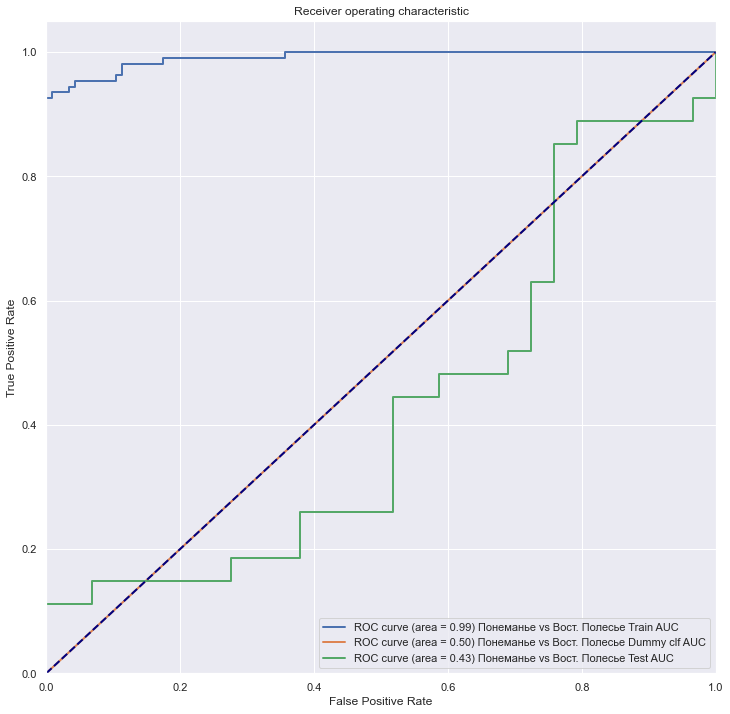

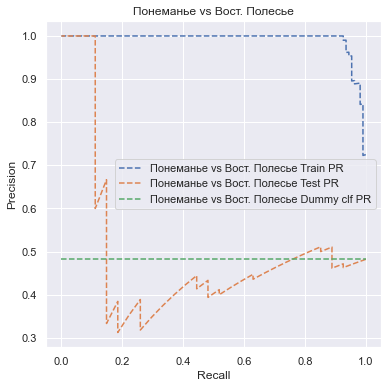

In [30]:
from populations.clf_utils import one_vs_one_clfs, one_vs_all_clfs
from populations.viz_utils import plot_heatmap

test_pr_auc_bel = one_vs_one_clfs(
    dh.get('bel_data'),
    'region',
)
# test_roc_auc_one_hot = one_vs_one_clfs(
#     dh.get('bel_data_one_hot'),
#     'region',
# )

In [43]:
def kek(test_roc_auc):
    return pd.concat([
        test_roc_auc.rename(columns={'Group1':'Group2', 'Group2':'Group1'}),
        test_roc_auc
    ])  
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from lightgbm import plot_importance
from matplotlib import pyplot as plt
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler

sns.set()
def plot_heatmap_(df, title):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)

    pivot_df = df.pivot("Group1", "Group2", "Test ROC AUC")

    sns.heatmap(pivot_df, ax=ax, annot=True, cmap="YlGnBu")
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.show()

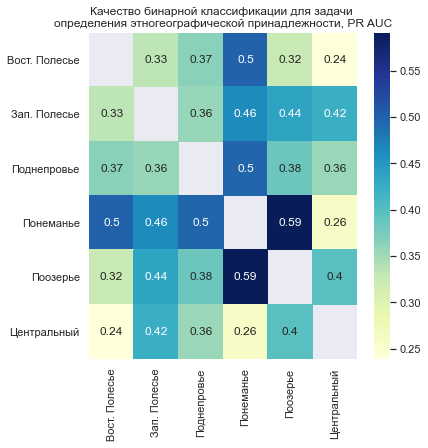

In [45]:
from populations.viz_utils import plot_heatmap

plot_heatmap_(kek(test_pr_auc_bel).sort_values(['Group1', 'Group2']), 'Качество бинарной классификации для задачи \nопределения этногеографической принадлежности, PR AUC')
#plot_heatmap(test_roc_auc_one_hot, 'Bel data (one-hot) "region" 1vs1 results')

**US**

Belarus    466
Cauc       361
Name: population, dtype: int64

103            121          585            638         1228    \
level_0         target         target       target         target      target   
level_1  D12S391, 25.0  D2S1338, 19.0   SE33, 25.2  D8S1179, 15.0   TH01, 6.0   
0           9.0066e-05    9.85786e-05  0.000507899    0.000592999  0.00108401   

                1255        1296          1500          1587       3909    \
level_0         target      target        target        target     target   
level_1  D12S391, 17.3   vWA, 14.0  D18S51, 18.0  PentaD, 14.0  FGA, 21.2   
0            0.0011126  0.00115215    0.00133106     0.0014142   0.001712   

                4137        6858          7125          8304        8463    \
level_0         target      target        target        target      target   
level_1  D3S1358, 17.0   FGA, 22.2  CSF1PO, 14.0  D21S11, 32.2  TPOX, 11.0   
0           0.00186062  0.00230967    0.00256362    0.00287179  0.00298158   

                9896          9961        10084          10155   \
level_0         target        target      target         target   
level_1  D8S1179, 13.0  PentaE, 16.0  SE33, 23.2  D2S1338, 16.0   
0           0.00311926    0.00315065  0.00327027     0.00333625   

                11317          12451          12504          12932   \
level_0         target         target         target         target   
level_1  D12S391, 16.0  D3S1358, 14.0  D19S433, 15.2  D13S317, 10.0   
0           0.00366538     0.00377826     0.00386505     0.00415282   

                 13668         13727       14244         15142         15194   \
level_0          target        target      target        target        target   
level_1  D22S1045, 11.0  D18S51, 10.0   TH01, 9.3  D2S441, 13.0  D16S539, 9.0   
0            0.00447414    0.00454462  0.00462764    0.00491909    0.00493371   

                15234          16453          17589       17595   \
level_0         target         target         target      target   
level_1  D1S1656, 13.0  D12S391, 24.0  D1S1656, 14.0   FGA, 21.0   
0           0.00497499     0.00554307     0.00593586  0.00594858   

               17801          18507         18912       19619        19621   \
level_0        target         target        target      target       target   
level_1  D7S820, 11.0  D2S1338, 18.0  D18S51, 19.0  SE33, 33.2  PentaD, 7.0   
0          0.00609993     0.00623719    0.00643254   0.0065501    0.0065501   

               19623       20498         20505        20533       20535   \
level_0        target      target        target       target      target   
level_1  PentaD, 16.0  TPOX, 10.0  D21S11, 28.0  D2S441, 9.0   FGA, 24.2   
0           0.0065501  0.00693805    0.00694248   0.00697268  0.00697268   

                20536         20538          20541          20542   \
level_0         target        target         target         target   
level_1  D19S433, 18.2  D21S11, 33.0  D6S1043, 22.0  D1S1656, 10.0   
0           0.00697268    0.00697268     0.00697268     0.00697268   

             20544       20547          20549         20551   ...  \
level_0      target      target         target        target  ...   
level_1  SE33, 11.0   vWA, 21.0  D3S1358, 13.0  D5S818, 15.0  ...   
0        0.00697268  0.00697268     0.00697268    0.00697268  ...   

                173006         173007         173008         173009  \
level_0         target         target         target         target   
level_1  D6S1043, 12.3  D6S1043, 18.1  D6S1043, 18.3  D6S1043, 19.3   
0                  NaN            NaN            NaN            NaN   

                173010         173011         173012         173013  \
level_0         target         target         target         target   
level_1  D6S1043, 20.3  D6S1043, 21.3  D6S1043, 22.3  D6S1043, 23.0   
0                  NaN            NaN            NaN            NaN   

                173014         173015         173016         173017  \
level_0         target         target         target         target   
level_1  D6S1043, 23.3  D

390             15         387             157  \
Feature       TH01, 9.0  D10S1248, 13.0  TH01, 7.0  D22S1045, 16.0   
KS value       0.161811        0.140399   0.131367        0.122493   
KS p-value  0.000339202      0.00287409  0.0064563       0.0135923   

                      118        408        410           312            257  \
Feature     D1S1656, 17.3  vWA, 15.0  vWA, 17.0  PentaE, 12.0  D8S1179, 14.0   
KS value         0.113396   0.105015   0.103909      0.103341        0.10296   
KS p-value      0.0275722  0.0504355  0.0544538     0.0566094      0.0581239   

                  398          242            93            310           4    \
Feature     TPOX, 8.0  D7S820, 9.0  D19S433, 13.0  PentaE, 10.0  CSF1PO, 10.0   
KS value     0.102244    0.0933047      0.0930721     0.0900584     0.0809428   
KS p-value  0.0609919     0.108625       0.110163      0.132205      0.221172   

                      40              17             163             16   \
Feature     D12S391, 22.0  D10S1248, 15.0  D2S1338, 17.0  D10S1248, 14.0   
KS value        0.0792778       0.0783384       0.073362       0.0731387   
KS p-value       0.241491        0.253556       0.324807        0.328321   

                     243            53           3             314  \
Feature     D7S820, 10.0  D13S317, 13.0  CSF1PO, 9.0  PentaE, 14.0   
KS value       0.0721528      0.0712877    0.0698646     0.0697529   
KS p-value      0.343843       0.358126     0.382188      0.384257   

                     72         399        269            113            115  \
Feature     D18S51, 14.0  TPOX, 9.0  FGA, 20.0  D1S1656, 15.0  D1S1656, 16.0   
KS value       0.0696134  0.0682554  0.0673252      0.0659951      0.0659672   
KS p-value      0.386833   0.410748   0.428062       0.452787       0.453331   

                  411           296            197           186  \
Feature     vWA, 18.0  PentaD, 10.0  D3S1358, 16.0  D2S441, 14.0   
KS value    0.0648975      0.064265      0.0632976     0.0628697   
KS p-value    0.47417      0.486844       0.505868      0.514571   

                     133            195            214            25   \
Feature     D21S11, 30.0  D3S1358, 15.0  D6S1043, 11.0  D12S391, 17.0   
KS value       0.0623861      0.0619861      0.0601258      0.0582747   
KS p-value      0.524668       0.532905       0.571594       0.610721   

                     188            253           48            298  \
Feature     D2S441, 15.0  D8S1179, 10.0  D13S317, 8.0  PentaD, 12.0   
KS value       0.0573632      0.0562749     0.0562005     0.0561261   
KS p-value      0.630624       0.653935      0.655753      0.657138   

                     76            205         348            215        275  \
Feature     D18S51, 16.0  D5S818, 10.0  SE33, 18.0  D6S1043, 12.0  FGA, 23.0   
KS value       0.0553726      0.055168   0.0547029      0.0523217  0.0521543   
KS p-value      0.673483      0.677598    0.687814       0.738365   0.741423   

                      91            6              51         277  \
Feature     D19S433, 12.0  CSF1PO, 12.0  D13S317, 11.0  FGA, 24.0   
KS value        0.0520798      0.050973      0.0504335  0.0482941   
KS p-value       0.743179      0.765891       0.777223    0.81867   

                     299           134  ...           248           246  \
Feature     PentaD, 13.0  D21S11, 30.2  ...  D7S820, 13.0  D7S820, 11.1   
KS value       0.0480336     0.0471593  ...     0.0119805    0.00537634   
KS p-value      0.823732      0.839634  ...             1             1   

                     245           244          241          238  \
Feature     D7S820, 11.0  D7S820, 10.3  D7S820, 8.1  D7S820, 6.0   
KS value       0.0122409             0   0.00346021            0   
KS p-value             1             1            1            1   

                      237            236            235            233  \
Feature     D6S1043, 26.0  D6S1043, 25.0  D6S1043, 24.0  D6S1043, 23.0   
KS value       

0:	total: 6.99ms	remaining: 3.49s
1:	total: 15.1ms	remaining: 3.76s
2:	total: 21.8ms	remaining: 3.61s
3:	total: 31ms	remaining: 3.84s
4:	total: 37.5ms	remaining: 3.71s
5:	total: 46.9ms	remaining: 3.86s
6:	total: 54ms	remaining: 3.8s
7:	total: 63ms	remaining: 3.87s
8:	total: 69.7ms	remaining: 3.8s
9:	total: 75.9ms	remaining: 3.72s
10:	total: 82.6ms	remaining: 3.67s
11:	total: 90.7ms	remaining: 3.69s
12:	total: 97.4ms	remaining: 3.65s
13:	total: 104ms	remaining: 3.6s
14:	total: 113ms	remaining: 3.64s
15:	total: 120ms	remaining: 3.62s
16:	total: 128ms	remaining: 3.63s
17:	total: 135ms	remaining: 3.61s
18:	total: 144ms	remaining: 3.65s
19:	total: 151ms	remaining: 3.62s
20:	total: 160ms	remaining: 3.65s
21:	total: 167ms	remaining: 3.63s
22:	total: 176ms	remaining: 3.65s
23:	total: 183ms	remaining: 3.62s
24:	total: 192ms	remaining: 3.64s
25:	total: 198ms	remaining: 3.61s
26:	total: 210ms	remaining: 3.68s
27:	total: 217ms	remaining: 3.66s
28:	total: 225ms	remaining: 3.66s
29:	total: 233ms	rem

247:	total: 2.02s	remaining: 2.06s
248:	total: 2.03s	remaining: 2.05s
249:	total: 2.04s	remaining: 2.04s
250:	total: 2.05s	remaining: 2.03s
251:	total: 2.05s	remaining: 2.02s
252:	total: 2.06s	remaining: 2.01s
253:	total: 2.07s	remaining: 2s
254:	total: 2.08s	remaining: 2s
255:	total: 2.08s	remaining: 1.99s
256:	total: 2.1s	remaining: 1.98s
257:	total: 2.1s	remaining: 1.97s
258:	total: 2.11s	remaining: 1.96s
259:	total: 2.12s	remaining: 1.96s
260:	total: 2.13s	remaining: 1.95s
261:	total: 2.13s	remaining: 1.94s
262:	total: 2.14s	remaining: 1.93s
263:	total: 2.15s	remaining: 1.92s
264:	total: 2.16s	remaining: 1.91s
265:	total: 2.16s	remaining: 1.9s
266:	total: 2.17s	remaining: 1.9s
267:	total: 2.18s	remaining: 1.89s
268:	total: 2.19s	remaining: 1.88s
269:	total: 2.19s	remaining: 1.87s
270:	total: 2.2s	remaining: 1.86s
271:	total: 2.21s	remaining: 1.85s
272:	total: 2.22s	remaining: 1.84s
273:	total: 2.23s	remaining: 1.84s
274:	total: 2.24s	remaining: 1.83s
275:	total: 2.25s	remaining: 1.

493:	total: 4.27s	remaining: 51.9ms
494:	total: 4.28s	remaining: 43.2ms
495:	total: 4.29s	remaining: 34.6ms
496:	total: 4.29s	remaining: 25.9ms
497:	total: 4.3s	remaining: 17.3ms
498:	total: 4.31s	remaining: 8.64ms
499:	total: 4.32s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.949043  0.728276  0.940064  0.669861
1    rf   0.823531  0.636437  0.786352  0.558710
2    lr   0.855292  0.751724  0.806707  0.684308
3   svm   0.901497  0.784598  0.866592  0.699562

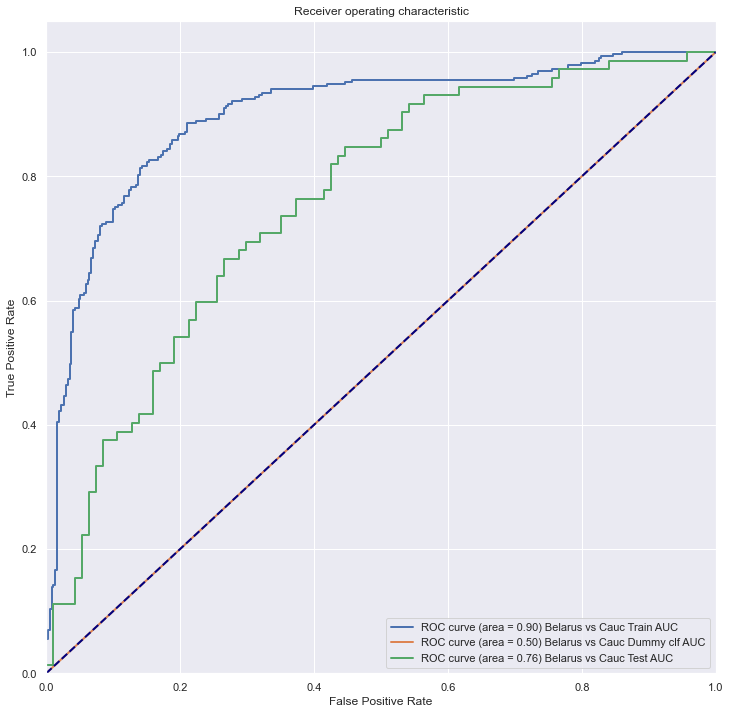

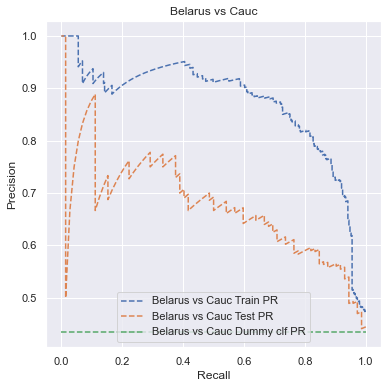

Belarus    466
AA         341
Name: population, dtype: int64

1565           4811        5178          5180            5396    \
level_0       target         target      target        target          target   
level_1  D7S820, 9.0  D2S1338, 23.0  SE33, 21.2  D8S1179, 8.0  D22S1045, 18.0   
0         0.00125242     0.00156448  0.00183622    0.00183622      0.00197368   

               8703          13416         14516         14735   \
level_0        target        target        target        target   
level_1  D18S51, 16.0  D18S51, 12.0  D2S441, 11.3  D18S51, 15.0   
0            0.002545    0.00335209    0.00362362    0.00380358   

                16173       16417         18480       20015         20547   \
level_0         target      target        target      target        target   
level_1  D3S1358, 17.0  SE33, 16.0  D21S11, 33.2   vWA, 13.0  CSF1PO, 12.0   
0           0.00409174  0.00419466    0.00471438  0.00510155    0.00520045   

                20800         23207       24217       25266       25885   \
level_0         target        target      target      target      target   
level_1  D19S433, 17.2  PentaE, 15.0   vWA, 17.0  TPOX, 12.0  SE33, 13.0   
0           0.00538508    0.00596385  0.00626646  0.00658702  0.00681283   

             31350       31352         31355          33267         33985   \
level_0      target      target        target         target        target   
level_1   vWA, 21.0  SE33, 36.0  D18S51, 24.0  D6S1043, 16.0  PentaE, 13.0   
0        0.00866287  0.00866287    0.00866287     0.00921901    0.00947195   

                38617         41679       42996         42998        43001   \
level_0         target        target      target        target       target   
level_1  D12S391, 20.0  D5S818, 14.0  SE33, 34.0  D5S818, 15.0  D5S818, 7.0   
0            0.0110376     0.0119008   0.0122702     0.0122702    0.0122702   

               43019         43414         43417         43419   \
level_0        target        target        target        target   
level_1  PentaE, 16.0  PentaD, 17.0  D7S820, 14.0  D6S1043, 9.0   
0           0.0122842     0.0124414     0.0124414     0.0124414   

                46076         47856       50695          51900       52077   \
level_0         target        target      target         target      target   
level_1  D6S1043, 12.0  PentaD, 11.0  SE33, 23.0  D12S391, 25.0  SE33, 14.0   
0            0.0134173     0.0140474   0.0150514      0.0155773   0.0156248   

              52728          57305       57861       57862          62364   \
level_0       target         target      target      target         target   
level_1  D7S820, 7.0  D1S1656, 16.0  SE33, 12.0  SE33, 33.2  D6S1043, 14.0   
0          0.0158945      0.0174612    0.017636    0.017636      0.0195349   

               66824         66847       69244           69343   \
level_0        target        target      target          target   
level_1  D7S820, 11.0  D5S818, 12.0  SE33, 25.2  D10S1248, 13.0   
0           0.0213613      0.021377    0.022347       0.0223563   

                73089          73799           77110   ...        173006  \
level_0         target         target          target  ...        target   
level_1  D8S1179, 11.0  D1S1656, 15.3  D10S1248, 15.0  ...  D16S539, 5.0   
0            0.0240322      0.0243455       0.0259883  ...           NaN   

               173007        173008        173009        173010        173011  \
level_0        target        target        target        target        target   
level_1  D16S539, 7.0  D18S51, 14.2  D18S51, 16.2  D18S51, 28.0  D19S433, 9.0   
0                 NaN           NaN           NaN           NaN           NaN   

                173012        173013        173014        173015  \
level_0         target        target        target        target   
level_1  D19S433, 13.3  D21S11, 24.2  D21S11, 25.2  D21S11, 26.2   
0                  NaN           NaN           NaN           NaN   

               173016        173017        173018         173019  \
level_0        target        targ

387          391            111            118  \
Feature       TH01, 7.0    TH01, 9.3  D1S1656, 14.0  D1S1656, 17.3   
KS value       0.429133      0.37599       0.320779        0.29112   
KS p-value  1.30601e-25  9.27832e-20    6.77236e-15    2.78833e-12   

                    308            52            182           179  \
Feature     PentaE, 8.0  D13S317, 12.0  D2S441, 12.0  D2S441, 10.0   
KS value       0.265922       0.252452      0.246839      0.246455   
KS p-value  2.67282e-10    2.56909e-09   6.34715e-09   6.70246e-09   

                     48              157            214          398  \
Feature     D13S317, 8.0  D22S1045, 16.0  D6S1043, 11.0    TPOX, 8.0   
KS value        0.235378        0.232896       0.225038     0.222734   
KS p-value   3.76702e-08       5.493e-08      1.749e-07  2.42414e-07   

                       158          388          289           310  \
Feature     D22S1045, 17.0    TH01, 8.0  PentaD, 2.2  PentaE, 10.0   
KS value          0.216738     0.215526     0.208791      0.204596   
KS p-value     5.68933e-07  6.73353e-07   1.6795e-06   2.93755e-06   

                       14             199            96             168  \
Feature     D10S1248, 12.0  D3S1358, 18.0  D19S433, 14.0  D2S1338, 22.0   
KS value          0.200225        0.19925       0.194582       0.193371   
KS p-value      5.1783e-06    5.86715e-06    1.05935e-05    1.23113e-05   

                      167            163            256            98   \
Feature     D2S1338, 21.0  D2S1338, 17.0  D8S1179, 13.0  D19S433, 15.0   
KS value         0.192367       0.189058        0.18575       0.183387   
KS p-value    1.39544e-05    2.08739e-05    3.11299e-05    4.10839e-05   

                      40           396          269          294  \
Feature     D12S391, 22.0    TPOX, 6.0    FGA, 20.0  PentaD, 8.0   
KS value         0.181141     0.175824      0.16968     0.164333   
KS p-value    5.34656e-05  9.80841e-05  0.000193658  0.000342865   

                     72          399            62            206         386  \
Feature     D18S51, 14.0   TPOX, 9.0  D16S539, 12.0  D5S818, 11.0   TH01, 6.0   
KS value        0.163092    0.161527       0.158395      0.151808    0.150715   
KS p-value    0.00039053  0.00045973    0.000633329    0.00121716  0.00135265   

                     208           299         411           59   \
Feature     D5S818, 13.0  PentaD, 13.0   vWA, 18.0  D16S539, 9.0   
KS value        0.142414      0.141616    0.138278      0.136358   
KS p-value    0.00294449    0.00316566  0.00426698    0.00504963   

                     128           70             60             63   \
Feature     D21S11, 28.0  D18S51, 13.0  D16S539, 10.0  D16S539, 13.0   
KS value        0.129446      0.129091       0.128382       0.128205   
KS p-value    0.00908565    0.00935248     0.00991546      0.0100632   

                      28          348           247            97   \
Feature     D12S391, 18.0  SE33, 18.0  D7S820, 12.0  D19S433, 14.2   
KS value         0.126492    0.125694      0.122563       0.119875   
KS p-value       0.011569   0.0123335     0.0158151      0.0194764   

                   353            90         270            116  \
Feature     SE33, 20.0  D19S433, 11.0  FGA, 21.0  D1S1656, 16.3   
KS value      0.119609       0.119166   0.118427       0.114233   
KS p-value   0.0198744      0.0205609  0.0217467      0.0296999   

                      53   ...            226           246           250  \
Feature     D13S317, 13.0  ...  D6S1043, 19.3  D7S820, 11.1  D8S1179, 7.0   
KS value         0.113937  ...       0.003663    0.00268817    0.00268817   
KS p-value       0.030336  ...              1             1             1   

                     251            260            261        262         263  \
Feature     D8S1179, 8.0  D8S1179, 17.0  D8S1179, 18.0  FGA, 16.2   FGA, 17.0   
KS value     0.000502186     0.00732601     0.00732601          0  0.00268817   
KS p-value             1    

0:	total: 11.2ms	remaining: 5.58s
1:	total: 20.6ms	remaining: 5.12s
2:	total: 28.8ms	remaining: 4.77s
3:	total: 38.9ms	remaining: 4.82s
4:	total: 47ms	remaining: 4.66s
5:	total: 57.2ms	remaining: 4.71s
6:	total: 66.8ms	remaining: 4.71s
7:	total: 75.5ms	remaining: 4.64s
8:	total: 83.7ms	remaining: 4.57s
9:	total: 94.7ms	remaining: 4.64s
10:	total: 108ms	remaining: 4.82s
11:	total: 138ms	remaining: 5.63s
12:	total: 156ms	remaining: 5.86s
13:	total: 180ms	remaining: 6.25s
14:	total: 203ms	remaining: 6.56s
15:	total: 228ms	remaining: 6.91s
16:	total: 244ms	remaining: 6.92s
17:	total: 258ms	remaining: 6.92s
18:	total: 272ms	remaining: 6.88s
19:	total: 283ms	remaining: 6.8s
20:	total: 297ms	remaining: 6.77s
21:	total: 309ms	remaining: 6.72s
22:	total: 324ms	remaining: 6.72s
23:	total: 339ms	remaining: 6.73s
24:	total: 352ms	remaining: 6.69s
25:	total: 363ms	remaining: 6.63s
26:	total: 378ms	remaining: 6.62s
27:	total: 392ms	remaining: 6.61s
28:	total: 408ms	remaining: 6.63s
29:	total: 424ms	

244:	total: 2.95s	remaining: 3.07s
245:	total: 2.96s	remaining: 3.06s
246:	total: 2.97s	remaining: 3.04s
247:	total: 2.99s	remaining: 3.03s
248:	total: 2.99s	remaining: 3.02s
249:	total: 3.01s	remaining: 3.01s
250:	total: 3.02s	remaining: 3s
251:	total: 3.04s	remaining: 2.99s
252:	total: 3.05s	remaining: 2.98s
253:	total: 3.06s	remaining: 2.96s
254:	total: 3.07s	remaining: 2.95s
255:	total: 3.08s	remaining: 2.94s
256:	total: 3.09s	remaining: 2.92s
257:	total: 3.11s	remaining: 2.91s
258:	total: 3.12s	remaining: 2.9s
259:	total: 3.14s	remaining: 2.9s
260:	total: 3.15s	remaining: 2.89s
261:	total: 3.17s	remaining: 2.88s
262:	total: 3.18s	remaining: 2.86s
263:	total: 3.19s	remaining: 2.85s
264:	total: 3.2s	remaining: 2.84s
265:	total: 3.21s	remaining: 2.82s
266:	total: 3.22s	remaining: 2.81s
267:	total: 3.23s	remaining: 2.79s
268:	total: 3.24s	remaining: 2.78s
269:	total: 3.25s	remaining: 2.77s
270:	total: 3.27s	remaining: 2.77s
271:	total: 3.29s	remaining: 2.75s
272:	total: 3.3s	remaining

489:	total: 5.83s	remaining: 119ms
490:	total: 5.84s	remaining: 107ms
491:	total: 5.86s	remaining: 95.2ms
492:	total: 5.87s	remaining: 83.3ms
493:	total: 5.88s	remaining: 71.4ms
494:	total: 5.89s	remaining: 59.5ms
495:	total: 5.9s	remaining: 47.6ms
496:	total: 5.91s	remaining: 35.7ms
497:	total: 5.92s	remaining: 23.8ms
498:	total: 5.93s	remaining: 11.9ms
499:	total: 5.94s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.999169  0.997543  0.998885  0.996717
1    rf   0.994674  0.986241  0.993503  0.979258
2    lr   0.999138  1.000000  0.998926  1.000000
3   svm   1.000000  0.998771  1.000000  0.998410

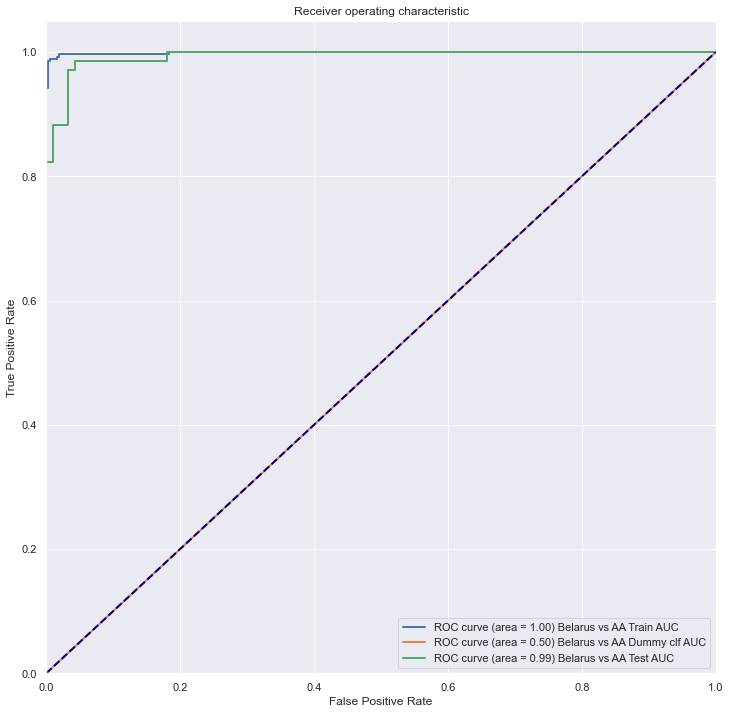

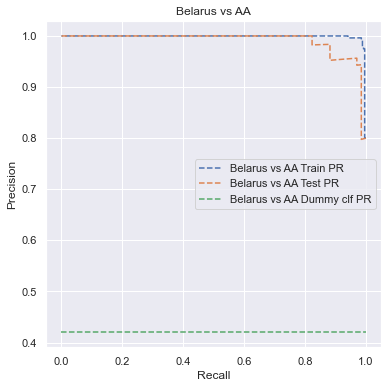

Belarus    466
Hisp       235
Name: population, dtype: int64

417          418           421          422           655     \
level_0         target       target        target       target        target   
level_1  D16S539, 15.0   SE33, 33.0  PentaE, 22.0   SE33, 12.0  D8S1179, 9.0   
0          0.000370017  0.000370017   0.000370017  0.000370017   0.000644368   

               989         1070          1237           1298          1433    \
level_0        target      target        target         target        target   
level_1  D21S11, 32.0  SE33, 21.0  D18S51, 20.0  D19S433, 16.2  D18S51, 18.0   
0         0.000995185  0.00106687    0.00119953     0.00126165    0.00134848   

                1793           1829         5234        12846         14903   \
level_0         target         target       target      target        target   
level_1  D16S539, 11.0  D19S433, 14.0  PentaD, 9.0   TPOX, 9.0  PentaD, 10.0   
0           0.00164204     0.00169226   0.00195054  0.00374605    0.00421243   

               15035          18890       21117         21248         22389   \
level_0        target         target      target        target        target   
level_1  D21S11, 27.0  D8S1179, 11.0   vWA, 17.0  PentaE, 18.0  D7S820, 12.0   
0          0.00435431     0.00564751  0.00630945     0.0064152     0.0068172   

                24008         24680          27041         27178   \
level_0         target        target         target        target   
level_1  D6S1043, 12.0  PentaE, 11.0  D1S1656, 12.0  PentaE, 13.0   
0           0.00727434    0.00753214     0.00834741    0.00837678   

               27638         27876         27991          28605        30117   \
level_0        target        target        target         target       target   
level_1  D7S820, 10.0  D2S441, 12.0  CSF1PO, 11.0  D3S1358, 16.0  D5S818, 9.0   
0          0.00857881     0.0088073    0.00885077     0.00915452   0.00970586   

                33749      33824          34473       36638          36742   \
level_0         target     target         target      target         target   
level_1  D1S1656, 15.3  FGA, 23.0  D6S1043, 20.0  SE33, 29.2  D19S433, 16.0   
0            0.0110789  0.0111486      0.0113838    0.012093      0.0121018   

               36949          37978           38729      38731         38733   \
level_0        target         target          target     target        target   
level_1  PentaD, 14.0  D13S317, 12.0  D10S1248, 11.0  FGA, 23.2  PentaD, 16.0   
0           0.0121842       0.012587       0.0129208  0.0129208     0.0129208   

              41261          42571         44030       44500         44503   \
level_0       target         target        target      target        target   
level_1  PentaE, 9.0  D12S391, 17.3  PentaD, 11.0  SE33, 20.2  PentaD, 17.0   
0          0.0138539      0.0145545     0.0152009   0.0153951     0.0153951   

             44504        44507           44515          45054   \
level_0      target       target          target         target   
level_1  SE33, 33.2  PentaD, 7.0  D10S1248, 17.0  D12S391, 21.0   
0         0.0153951    0.0153951       0.0154078      0.0157096   

                46793          46961   ...        173006        173007  \
level_0         target         target  ...        target        target   
level_1  D1S1656, 16.3  D19S433, 13.0  ...  D21S11, 36.0  D21S11, 37.0   
0            0.0162832      0.0163354  ...           NaN           NaN   

               173008        173009         173010       173011       173012  \
level_0        target        target         target       target       target   
level_1  D21S11, 38.0  D21S11, 39.0  D22S1045, 8.0  D2S441, 8.0  D2S441, 9.1   
0                 NaN           NaN            NaN          NaN          NaN   

               173013        173014         173015         173016  \
level_0        target        target         target         target   
level_1  D2S441, 13.3  D2S441, 14.3  D3S1358, 12.0  D3S1358, 15.2   
0                 NaN           NaN            NaN            NaN   

       

387            51           391          409  \
Feature       TH01, 7.0  D13S317, 11.0    TH01, 9.3    vWA, 16.0   
KS value       0.282144       0.208591     0.194921        0.188   
KS p-value  2.86794e-09    2.99505e-05  0.000122266  0.000240456   

                      214            60            49          402  \
Feature     D6S1043, 11.0  D16S539, 10.0  D13S317, 9.0  TPOX, 12.0   
KS value         0.186571       0.171986      0.168497     0.15111   
KS p-value    0.000275083     0.00104337    0.00141027  0.00578967   

                       156           179             152        398  \
Feature     D22S1045, 15.0  D2S441, 10.0  D22S1045, 11.0  TPOX, 8.0   
KS value          0.140471      0.136468        0.133093   0.131034   
KS p-value       0.0127346     0.0168798       0.0212726  0.0244189   

                      40            245            107            31   \
Feature     D12S391, 22.0  D7S820, 11.0  D1S1656, 11.0  D12S391, 19.0   
KS value         0.127831      0.126287       0.124285       0.123027   
KS p-value      0.0301583     0.0332862      0.0378293       0.040942   

                  390            195            115           128        269  \
Feature     TH01, 9.0  D3S1358, 15.0  D1S1656, 16.0  D21S11, 28.0  FGA, 20.0   
KS value     0.121025       0.117994       0.114962      0.114848   0.109529   
KS p-value  0.0463188      0.0556909      0.0666805      0.067144  0.0909329   

                      165         348           186            163  \
Feature     D2S1338, 19.0  SE33, 18.0  D2S441, 14.0  D2S1338, 17.0   
KS value         0.109186    0.108042     0.0983185      0.0972889   
KS p-value      0.0927475   0.0986464      0.164529       0.172887   

                      218        282            222             15   \
Feature     D6S1043, 14.0  FGA, 27.0  D6S1043, 18.0  D10S1248, 13.0   
KS value        0.0970602  0.0957447      0.0943148       0.0915694   
KS p-value       0.174798   0.186759       0.199757        0.227393   

                     76             230             157           208  \
Feature     D18S51, 16.0  D6S1043, 21.3  D22S1045, 16.0  D5S818, 13.0   
KS value       0.0912263      0.0904255       0.0873942     0.0855067   
KS p-value       0.23109       0.240053        0.275106      0.298615   

                      194        272           69              18         281  \
Feature     D3S1358, 14.0  FGA, 22.0  D18S51, 12.0  D10S1248, 16.0  FGA, 26.0   
KS value        0.0848204  0.0840769     0.0833905       0.0827042   0.082075   
KS p-value       0.307655    0.31743      0.326651        0.336298   0.345183   

                      50             118            256            199  \
Feature     D13S317, 10.0  D1S1656, 17.3  D8S1179, 13.0  D3S1358, 18.0   
KS value        0.0813887      0.0808739      0.0804164      0.0777282   
KS p-value       0.355012       0.362467       0.369215        0.41055   

                      54            6             315            63   \
Feature     D13S317, 14.0  CSF1PO, 12.0  PentaE, 15.0  D16S539, 13.0   
KS value        0.0765271     0.0764127     0.0761267      0.0753832   
KS p-value       0.429785      0.431681      0.436489       0.448827   

                      98            4              64            133  ...  \
Feature     D19S433, 15.0  CSF1PO, 10.0  D16S539, 14.0  D21S11, 30.0  ...   
KS value        0.0751544     0.0743537      0.0728094     0.0726378  ...   
KS p-value       0.452585      0.465942       0.492939      0.495861  ...   

                  264         263        262            261          238  \
Feature     FGA, 17.2   FGA, 17.0  FGA, 16.2  D8S1179, 18.0  D7S820, 6.0   
KS value            0  0.00531915          0     0.00531915            0   
KS p-value          1           1          1              1            1   

                      260           252           250           249  \
Feature     D8S1179, 17.0  D8S1179, 9.0  D8S1179, 7.0  D7S820, 14.0   
KS value        0.0106383   0.000171585  

0:	total: 7.61ms	remaining: 3.79s
1:	total: 15.6ms	remaining: 3.89s
2:	total: 23.8ms	remaining: 3.95s
3:	total: 31.7ms	remaining: 3.93s
4:	total: 39.8ms	remaining: 3.94s
5:	total: 49.7ms	remaining: 4.09s
6:	total: 56.9ms	remaining: 4.01s
7:	total: 64.4ms	remaining: 3.96s
8:	total: 71ms	remaining: 3.87s
9:	total: 78.5ms	remaining: 3.84s
10:	total: 85.5ms	remaining: 3.8s
11:	total: 92.3ms	remaining: 3.75s
12:	total: 99.7ms	remaining: 3.74s
13:	total: 107ms	remaining: 3.71s
14:	total: 114ms	remaining: 3.7s
15:	total: 123ms	remaining: 3.71s
16:	total: 130ms	remaining: 3.71s
17:	total: 137ms	remaining: 3.68s
18:	total: 145ms	remaining: 3.67s
19:	total: 152ms	remaining: 3.64s
20:	total: 159ms	remaining: 3.62s
21:	total: 166ms	remaining: 3.6s
22:	total: 173ms	remaining: 3.59s
23:	total: 181ms	remaining: 3.58s
24:	total: 188ms	remaining: 3.56s
25:	total: 195ms	remaining: 3.55s
26:	total: 202ms	remaining: 3.53s
27:	total: 212ms	remaining: 3.57s
28:	total: 220ms	remaining: 3.56s
29:	total: 229ms

248:	total: 2.66s	remaining: 2.68s
249:	total: 2.67s	remaining: 2.67s
250:	total: 2.68s	remaining: 2.66s
251:	total: 2.69s	remaining: 2.65s
252:	total: 2.7s	remaining: 2.64s
253:	total: 2.71s	remaining: 2.63s
254:	total: 2.73s	remaining: 2.62s
255:	total: 2.74s	remaining: 2.61s
256:	total: 2.75s	remaining: 2.6s
257:	total: 2.76s	remaining: 2.59s
258:	total: 2.77s	remaining: 2.58s
259:	total: 2.78s	remaining: 2.56s
260:	total: 2.79s	remaining: 2.56s
261:	total: 2.8s	remaining: 2.54s
262:	total: 2.81s	remaining: 2.53s
263:	total: 2.82s	remaining: 2.52s
264:	total: 2.83s	remaining: 2.51s
265:	total: 2.84s	remaining: 2.5s
266:	total: 2.85s	remaining: 2.48s
267:	total: 2.85s	remaining: 2.47s
268:	total: 2.87s	remaining: 2.46s
269:	total: 2.88s	remaining: 2.45s
270:	total: 2.89s	remaining: 2.44s
271:	total: 2.9s	remaining: 2.43s
272:	total: 2.91s	remaining: 2.42s
273:	total: 2.92s	remaining: 2.41s
274:	total: 2.93s	remaining: 2.4s
275:	total: 2.94s	remaining: 2.39s
276:	total: 2.95s	remainin

484:	total: 5.75s	remaining: 178ms
485:	total: 5.77s	remaining: 166ms
486:	total: 5.79s	remaining: 155ms
487:	total: 5.82s	remaining: 143ms
488:	total: 5.84s	remaining: 131ms
489:	total: 5.86s	remaining: 120ms
490:	total: 5.88s	remaining: 108ms
491:	total: 5.9s	remaining: 95.9ms
492:	total: 5.92s	remaining: 84.1ms
493:	total: 5.95s	remaining: 72.2ms
494:	total: 5.97s	remaining: 60.3ms
495:	total: 5.99s	remaining: 48.3ms
496:	total: 6s	remaining: 36.2ms
497:	total: 6.03s	remaining: 24.2ms
498:	total: 6.05s	remaining: 12.1ms
499:	total: 6.1s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.969284  0.793741  0.957031  0.704513
1    rf   0.858758  0.658250  0.793334  0.560807
2    lr   0.917226  0.798720  0.894204  0.708110
3   svm   0.969060  0.843883  0.960222  0.765536

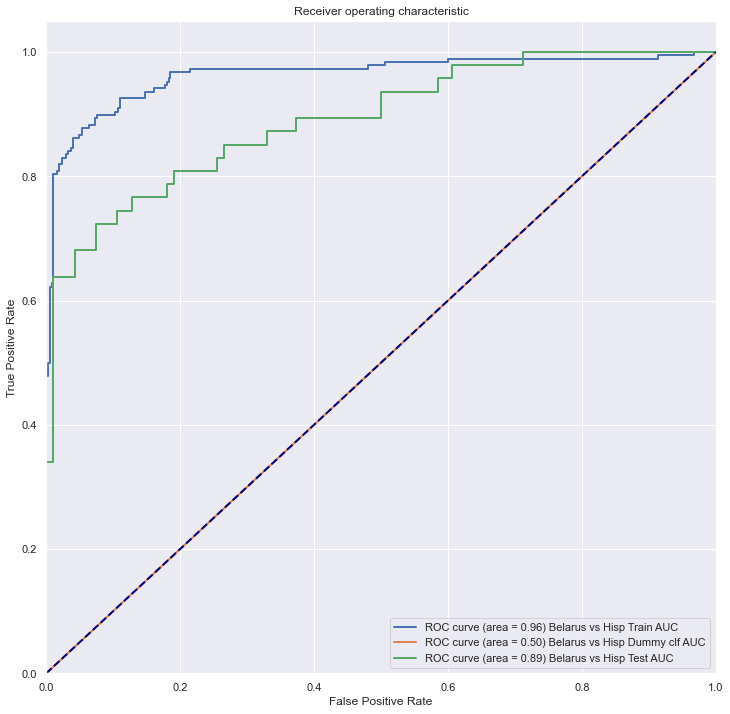

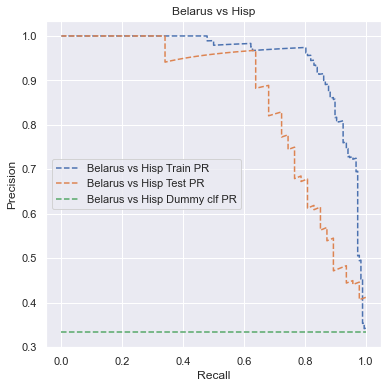

Belarus    466
Asian       97
Name: population, dtype: int64

511           1114          1211           1345         1890    \
level_0       target        target        target         target       target   
level_1    FGA, 25.0  PentaE, 16.0  D18S51, 19.0  D3S1358, 17.0  D7S820, 7.0   
0        0.000630501    0.00124534      0.001339     0.00150345   0.00204732   

              1893         1894          4668          4795          4796    \
level_0       target       target        target        target        target   
level_1  PentaE, 8.0  PentaD, 8.0  PentaD, 12.0  D18S51, 21.0  CSF1PO, 14.0   
0         0.00204732   0.00204732    0.00278899    0.00291512    0.00291512   

                8610        8684           10504       13259        13460   \
level_0         target      target         target      target       target   
level_1  D2S1338, 26.0   vWA, 18.0  D6S1043, 10.0  SE33, 26.2  PentaE, 5.0   
0           0.00418026  0.00426795     0.00485517  0.00596409   0.00609115   

               18811          18854          19005       19257   \
level_0        target         target         target      target   
level_1  D5S818, 13.0  D19S433, 17.2  D1S1656, 18.3   FGA, 22.0   
0          0.00886203      0.0089098      0.0090152  0.00909178   

                20506       20702           24314      25083       25771   \
level_0         target      target          target     target      target   
level_1  D19S433, 13.2  TH01, 10.0  D10S1248, 17.0  TH01, 8.0  SE33, 19.0   
0            0.0100198   0.0101205        0.011723   0.012059   0.0123193   

                26991         29213         29579       29580         31016   \
level_0         target        target        target      target        target   
level_1  D12S391, 25.0  PentaD, 10.0  D5S818, 14.0  SE33, 32.2  D18S51, 20.0   
0            0.0130817     0.0143106      0.014427    0.014427      0.015193   

                32979       34259       35184          37170           37825   \
level_0         target      target      target         target          target   
level_1  D6S1043, 20.0  SE33, 29.2  SE33, 28.2  D6S1043, 17.0  D10S1248, 15.0   
0            0.0162144   0.0167885   0.0173212      0.0183609       0.0188797   

              38310       38311      38317      38818          39539   \
level_0       target      target     target     target         target   
level_1  D5S818, 8.0  SE33, 23.0  FGA, 19.0  vWA, 20.0  D6S1043, 19.0   
0          0.0191806   0.0191806  0.0191841  0.0193862      0.0196926   

             42189          43003          43004      43006        43009   \
level_0      target         target         target     target       target   
level_1  SE33, 22.0  D6S1043, 21.0  D2S1338, 31.0  FGA, 17.0  CSF1PO, 6.0   
0         0.0212013      0.0216099      0.0216099  0.0216099    0.0216099   

                43010          43012          43015      43017       43018   \
level_0         target         target         target     target      target   
level_1  D1S1656, 10.0  D6S1043, 22.0  D19S433, 13.3  vWA, 21.0  SE33, 19.3   
0            0.0216099      0.0216099      0.0216099  0.0216099   0.0216099   

             43021   ...         173006         173007       173008  \
level_0      target  ...         target         target       target   
level_1  SE33, 36.0  ...  D6S1043, 25.0  D6S1043, 26.0  D7S820, 6.0   
0         0.0216099  ...            NaN            NaN          NaN   

              173009        173010     173011     173012     173013  \
level_0       target        target     target     target     target   
level_1  D7S820, 8.1  D7S820, 10.3  FGA, 16.2  FGA, 17.2  FGA, 18.2   
0                NaN           NaN        NaN        NaN        NaN   

            173014     173015     173016     173017     173018     173019  \
level_0     target     target     target     target     target     target   
level_1  FGA, 19.2  FGA, 22.3  FGA, 25.2  FGA, 27.0  FGA, 29.0  FGA, 30.0   
0              NaN        NaN        NaN        NaN        NaN        NaN   

            173020     173021       17302

391           186           59           390  \
Feature       TH01, 9.3  D2S441, 14.0  D16S539, 9.0    TH01, 9.0   
KS value       0.492349      0.374483      0.365178     0.355045   
KS p-value  1.04361e-14   1.34189e-08   3.44421e-08  9.33007e-08   

                     182          307            163           205  \
Feature     D2S441, 12.0  PentaE, 7.0  D2S1338, 17.0  D5S818, 10.0   
KS value        0.330852      0.27957       0.266956      0.259098   
KS p-value   8.90031e-07  6.03144e-05    0.000151662   0.000263368   

                      113            214            60             62   \
Feature     D1S1656, 15.0  D6S1043, 11.0  D16S539, 10.0  D16S539, 12.0   
KS value         0.254549       0.249586       0.232423       0.227874   
KS p-value    0.000359695    0.000502002      0.0015092     0.00199316   

                       158           70             195         407  \
Feature     D22S1045, 17.0  D18S51, 13.0  D3S1358, 15.0   vWA, 14.0   
KS value          0.221257      0.219396       0.205542    0.204508   
KS p-value      0.00295718    0.00329713     0.00719586  0.00761165   

                   408           128            40            133  \
Feature      vWA, 15.0  D21S11, 28.0  D12S391, 22.0  D21S11, 30.0   
KS value      0.201406      0.193755       0.186518      0.186518   
KS p-value  0.00899248     0.0134187      0.0193116     0.0193116   

                      98             118            194           245  \
Feature     D19S433, 15.0  D1S1656, 17.3  D3S1358, 14.0  D7S820, 11.0   
KS value         0.185691       0.184657       0.181969      0.179074   
KS p-value      0.0201152      0.0211595       0.024105     0.0276767   

                  387            35            207            61   \
Feature     TH01, 7.0  D12S391, 20.0  D5S818, 12.0  D16S539, 11.0   
KS value     0.175765       0.174938      0.173077       0.168734   
KS p-value   0.032323       0.033588     0.0365883      0.0445216   

                      256            97             63            49   \
Feature     D8S1179, 13.0  D19S433, 14.2  D16S539, 13.0  D13S317, 9.0   
KS value         0.168528       0.167494       0.166667      0.157155   
KS p-value      0.0449316      0.0470436      0.0487944     0.0732976   

                       157            50             169          242  \
Feature     D22S1045, 16.0  D13S317, 10.0  D2S1338, 23.0  D7S820, 9.0   
KS value           0.15426       0.152812        0.14909     0.148883   
KS p-value       0.0825664      0.0875596       0.101568       0.1024   

                     310           179            28             215  \
Feature     PentaE, 10.0  D2S441, 10.0  D12S391, 18.0  D6S1043, 12.0   
KS value          0.1433       0.14268       0.141646       0.140199   
KS p-value      0.127017      0.130028       0.135167       0.142652   

                      222            217            218             16   \
Feature     D6S1043, 18.0  D6S1043, 13.0  D6S1043, 14.0  D10S1248, 14.0   
KS value          0.13751        0.13689       0.135443        0.133995   
KS p-value       0.157424       0.160997       0.169602        0.178561   

                      108            165             152            199  \
Feature     D1S1656, 12.0  D2S1338, 19.0  D22S1045, 11.0  D3S1358, 18.0   
KS value         0.133375       0.133168        0.131927        0.13172   
KS p-value       0.182509       0.183833        0.191994       0.193353   

                     72             115  ...        266        264  \
Feature     D18S51, 14.0  D1S1656, 16.0  ...  FGA, 18.2  FGA, 17.2   
KS value        0.130066       0.126344  ...          0          0   
KS p-value      0.204735       0.232137  ...          1          1   

                   263        262            216            261           250  \
Feature      FGA, 17.0  FGA, 16.2  D6S1043, 12.3  D8S1179, 18.0  D8S1179, 7.0   
KS value    0.00268817          0      0.0128205      0.0128205    0.00268817   
KS p-value           1          1   

0:	total: 7.71ms	remaining: 3.85s
1:	total: 14.3ms	remaining: 3.55s
2:	total: 22.1ms	remaining: 3.66s
3:	total: 29.1ms	remaining: 3.61s
4:	total: 36.3ms	remaining: 3.6s
5:	total: 42.5ms	remaining: 3.5s
6:	total: 49.2ms	remaining: 3.46s
7:	total: 56.1ms	remaining: 3.45s
8:	total: 63ms	remaining: 3.44s
9:	total: 69.2ms	remaining: 3.39s
10:	total: 76.9ms	remaining: 3.42s
11:	total: 82.7ms	remaining: 3.36s
12:	total: 89.3ms	remaining: 3.35s
13:	total: 95.9ms	remaining: 3.33s
14:	total: 102ms	remaining: 3.31s
15:	total: 108ms	remaining: 3.28s
16:	total: 117ms	remaining: 3.33s
17:	total: 127ms	remaining: 3.41s
18:	total: 134ms	remaining: 3.4s
19:	total: 140ms	remaining: 3.37s
20:	total: 147ms	remaining: 3.34s
21:	total: 153ms	remaining: 3.32s
22:	total: 160ms	remaining: 3.31s
23:	total: 166ms	remaining: 3.29s
24:	total: 172ms	remaining: 3.27s
25:	total: 179ms	remaining: 3.26s
26:	total: 185ms	remaining: 3.24s
27:	total: 192ms	remaining: 3.23s
28:	total: 198ms	remaining: 3.21s
29:	total: 205m

264:	total: 1.83s	remaining: 1.63s
265:	total: 1.84s	remaining: 1.62s
266:	total: 1.84s	remaining: 1.61s
267:	total: 1.85s	remaining: 1.6s
268:	total: 1.86s	remaining: 1.6s
269:	total: 1.86s	remaining: 1.59s
270:	total: 1.87s	remaining: 1.58s
271:	total: 1.88s	remaining: 1.58s
272:	total: 1.89s	remaining: 1.57s
273:	total: 1.9s	remaining: 1.57s
274:	total: 1.91s	remaining: 1.56s
275:	total: 1.92s	remaining: 1.56s
276:	total: 1.93s	remaining: 1.55s
277:	total: 1.94s	remaining: 1.55s
278:	total: 1.95s	remaining: 1.55s
279:	total: 1.96s	remaining: 1.54s
280:	total: 1.97s	remaining: 1.54s
281:	total: 1.98s	remaining: 1.53s
282:	total: 1.99s	remaining: 1.52s
283:	total: 2s	remaining: 1.52s
284:	total: 2.02s	remaining: 1.52s
285:	total: 2.07s	remaining: 1.55s
286:	total: 2.09s	remaining: 1.55s
287:	total: 2.1s	remaining: 1.55s
288:	total: 2.12s	remaining: 1.55s
289:	total: 2.13s	remaining: 1.54s
290:	total: 2.15s	remaining: 1.54s
291:	total: 2.16s	remaining: 1.54s
292:	total: 2.18s	remaining

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.983167  0.988176  0.919178  0.935877
1    rf   0.961518  0.972973  0.894507  0.878766
2    lr   1.000000  0.993243  1.000000  0.974882
3   svm   1.000000  0.989020  1.000000  0.948469

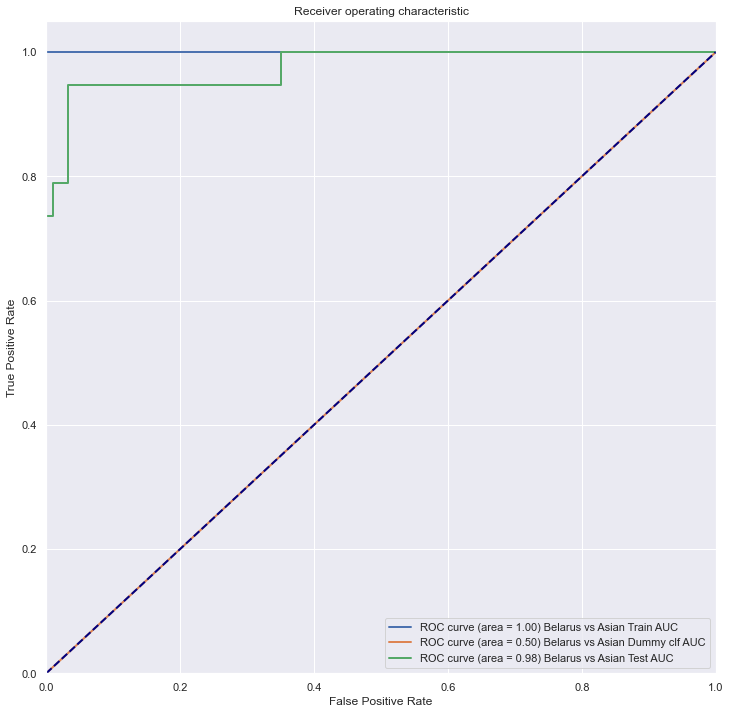

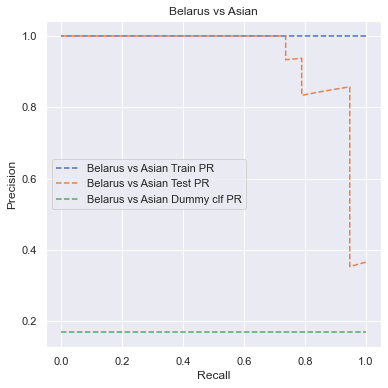

Cauc    361
AA      341
Name: population, dtype: int64

1010           1384           1561        1743    \
level_0         target         target         target      target   
level_1  D1S1656, 15.0  D6S1043, 17.0  D3S1358, 17.0  SE33, 17.3   
0          0.000924662      0.0012597     0.00142841   0.0015999   

               1745        1747        1748       1750       1752    \
level_0        target      target      target     target     target   
level_1  PentaD, 17.0  SE33, 28.3  TPOX, 13.0  FGA, 23.2  vWA, 21.0   
0           0.0015999   0.0015999   0.0015999  0.0015999  0.0015999   

             1777        4934           4937           4939          9451    \
level_0      target      target         target         target        target   
level_1  SE33, 15.0  SE33, 33.2  D12S391, 19.3  D1S1656, 14.3  D21S11, 32.0   
0        0.00161498  0.00226666     0.00226666     0.00226666    0.00321711   

               9452          9857           11917       17100         18784   \
level_0        target        target         target      target        target   
level_1  D18S51, 21.0  D7S820, 11.0  D6S1043, 18.0  SE33, 22.0  D21S11, 29.0   
0          0.00321711     0.0035598     0.00380267  0.00535827    0.00597089   

                 21268         27676         28035         29863   \
level_0          target        target        target        target   
level_1  D10S1248, 17.0  PentaE, 17.0  D18S51, 15.0  D2S441, 11.0   
0            0.00657856    0.00890701    0.00908851    0.00989552   

                36752          36867          36894           38554   \
level_0         target         target         target          target   
level_1  D19S433, 13.0  D16S539, 11.0  D13S317, 11.0  D10S1248, 15.0   
0            0.0123138      0.0124078      0.0124509       0.0129723   

                 42213           44378           47504         47506   \
level_0          target          target          target        target   
level_1  D22S1045, 11.0  D10S1248, 14.0  D22S1045, 13.0  D8S1179, 9.0   
0             0.0143155       0.0151666       0.0164364     0.0164364   

                47623          52131       52369          53357   \
level_0         target         target      target         target   
level_1  D6S1043, 13.0  D6S1043, 12.0  SE33, 13.0  D12S391, 20.0   
0            0.0165474      0.0185039   0.0185836      0.0189259   

               53837         54108       54712         56503       59426   \
level_0        target        target      target        target      target   
level_1  D2S441, 12.3  D18S51, 17.0  SE33, 25.2  PentaE, 15.0  SE33, 23.0   
0           0.0190705     0.0191512   0.0192947     0.0200249   0.0215093   

             59428          60657       61087         61892         62770   \
level_0      target         target      target        target        target   
level_1  SE33, 14.2  D16S539, 14.0  SE33, 31.0  D21S11, 30.2  CSF1PO, 14.0   
0         0.0215093      0.0222094   0.0224887     0.0229072     0.0233498   

               65714         66815      68221         69279        69280   \
level_0        target        target     target        target       target   
level_1  D21S11, 31.0  PentaE, 14.0  FGA, 19.0  D5S818, 15.0  D5S818, 7.0   
0           0.0245743      0.025087  0.0258726     0.0264112    0.0264112   

         ...         173006         173007        173008        173009  \
level_0  ...         target         target        target        target   
level_1  ...  D1S1656, 12.3  D1S1656, 20.3  D21S11, 24.2  D21S11, 26.0   
0        ...            NaN            NaN           NaN           NaN   

               173010        173011        173012         173013  \
level_0        target        target        target         target   
level_1  D21S11, 26.2  D21S11, 28.2  D21S11, 30.3  D2S1338, 15.0   
0                 NaN           NaN           NaN            NaN   

                173014         173015       173016       173017        173018  \
level_0         target         target       target       target        target   
level_1  D2S1338, 28.0  D

391          387             157            111  \
Feature       TH01, 9.3    TH01, 7.0  D22S1045, 16.0  D1S1656, 14.0   
KS value       0.386294     0.333143        0.319254        0.30857   
KS p-value  1.36681e-18  2.55351e-14     3.70814e-13    2.60691e-12   

                    308           179             158            257  \
Feature     PentaE, 8.0  D2S441, 10.0  D22S1045, 17.0  D8S1179, 14.0   
KS value       0.250801       0.23447        0.231074       0.227335   
KS p-value  2.99117e-08   2.90773e-07     4.59618e-07    7.48716e-07   

                     182           299            52            298  \
Feature     D2S441, 12.0  PentaD, 13.0  D13S317, 12.0  PentaD, 12.0   
KS value        0.221078      0.220582       0.204289      0.203831   
KS p-value   1.68014e-06   1.78276e-06    1.29766e-05   1.36601e-05   

                      167          289            214           206  \
Feature     D2S1338, 21.0  PentaD, 2.2  D6S1043, 11.0  D5S818, 11.0   
KS value         0.201999     0.198375       0.196925      0.194483   
KS p-value    1.69248e-05  2.55964e-05    3.01792e-05    3.9668e-05   

                    388          398            168           133  \
Feature       TH01, 8.0    TPOX, 8.0  D2S1338, 22.0  D21S11, 30.0   
KS value       0.188645     0.180899       0.175786      0.174756   
KS p-value  7.51543e-05  0.000170072    0.000286292   0.000317394   

                    396           59             96             256  \
Feature       TPOX, 6.0  D16S539, 9.0  D19S433, 14.0  D8S1179, 13.0   
KS value       0.172352       0.17052       0.169605       0.168613   
KS p-value  0.000402501   0.000481712    0.000526448    0.000579366   

                       14             199          386           70   \
Feature     D10S1248, 12.0  D3S1358, 18.0    TH01, 6.0  D18S51, 13.0   
KS value          0.168078       0.167888     0.164492      0.158997   
KS p-value     0.000609723     0.00062096  0.000856642    0.00142222   

                      98            128            62            208  \
Feature     D19S433, 15.0  D21S11, 28.0  D16S539, 12.0  D5S818, 13.0   
KS value         0.155945      0.154647       0.153579      0.153503   
KS p-value     0.00187047    0.00209812     0.00230463    0.00232007   

                     48             118            197          294  \
Feature     D13S317, 8.0  D1S1656, 17.3  D3S1358, 16.0  PentaD, 8.0   
KS value        0.153388       0.151671       0.150145     0.144956   
KS p-value    0.00234342     0.00272068     0.00310237   0.00479992   

                      28         408        269            38             258  \
Feature     D12S391, 18.0  vWA, 15.0  FGA, 20.0  D12S391, 21.0  D8S1179, 15.0   
KS value         0.138813   0.135417   0.133165       0.126221       0.125191   
KS p-value     0.00788846  0.0102827   0.012216       0.020408      0.0219712   

                      253          240            63            312  \
Feature     D8S1179, 10.0  D7S820, 8.0  D16S539, 13.0  PentaE, 12.0   
KS value         0.121566     0.117827       0.117788      0.115881   
KS p-value      0.0283456    0.0365944      0.0366914     0.0416612   

                    307        270          1              166            90   \
Feature     PentaE, 7.0  FGA, 21.0  CSF1PO, 7.0  D2S1338, 20.0  D19S433, 11.0   
KS value       0.115079   0.114507     0.113553       0.111989       0.110653   
KS p-value    0.0439167  0.0455934    0.0485104      0.0536392       0.058386   

            ...            223           245           249           250  \
Feature     ...  D6S1043, 18.1  D7S820, 11.0  D7S820, 14.0  D8S1179, 7.0   
KS value    ...              0      0.012706    0.00675366             0   
KS p-value  ...              1             1             1             1   

                     251           252            260            261  \
Feature     D8S1179, 8.0  D8S1179, 9.0  D8S1179, 17.0  D8S1179, 18.0   
KS value      0.00946276    0.00309066     0.00385379     0.0073260

0:	total: 9.42ms	remaining: 4.7s
1:	total: 20.5ms	remaining: 5.11s
2:	total: 33ms	remaining: 5.46s
3:	total: 42.6ms	remaining: 5.29s
4:	total: 55.7ms	remaining: 5.51s
5:	total: 67.6ms	remaining: 5.57s
6:	total: 79.4ms	remaining: 5.59s
7:	total: 88.3ms	remaining: 5.43s
8:	total: 100ms	remaining: 5.46s
9:	total: 112ms	remaining: 5.5s
10:	total: 121ms	remaining: 5.38s
11:	total: 136ms	remaining: 5.53s
12:	total: 152ms	remaining: 5.71s
13:	total: 211ms	remaining: 7.34s
14:	total: 270ms	remaining: 8.73s
15:	total: 294ms	remaining: 8.89s
16:	total: 312ms	remaining: 8.86s
17:	total: 327ms	remaining: 8.76s
18:	total: 338ms	remaining: 8.55s
19:	total: 350ms	remaining: 8.41s
20:	total: 364ms	remaining: 8.29s
21:	total: 377ms	remaining: 8.18s
22:	total: 385ms	remaining: 7.98s
23:	total: 399ms	remaining: 7.92s
24:	total: 414ms	remaining: 7.86s
25:	total: 428ms	remaining: 7.81s
26:	total: 439ms	remaining: 7.7s
27:	total: 451ms	remaining: 7.61s
28:	total: 463ms	remaining: 7.52s
29:	total: 474ms	rema

254:	total: 3.79s	remaining: 3.64s
255:	total: 3.8s	remaining: 3.62s
256:	total: 3.81s	remaining: 3.6s
257:	total: 3.82s	remaining: 3.58s
258:	total: 3.83s	remaining: 3.57s
259:	total: 3.86s	remaining: 3.56s
260:	total: 3.87s	remaining: 3.54s
261:	total: 3.88s	remaining: 3.52s
262:	total: 3.89s	remaining: 3.51s
263:	total: 3.91s	remaining: 3.49s
264:	total: 3.94s	remaining: 3.49s
265:	total: 3.97s	remaining: 3.5s
266:	total: 3.99s	remaining: 3.48s
267:	total: 4s	remaining: 3.46s
268:	total: 4.01s	remaining: 3.44s
269:	total: 4.01s	remaining: 3.42s
270:	total: 4.02s	remaining: 3.4s
271:	total: 4.03s	remaining: 3.38s
272:	total: 4.04s	remaining: 3.36s
273:	total: 4.05s	remaining: 3.34s
274:	total: 4.05s	remaining: 3.32s
275:	total: 4.06s	remaining: 3.3s
276:	total: 4.07s	remaining: 3.28s
277:	total: 4.08s	remaining: 3.26s
278:	total: 4.09s	remaining: 3.24s
279:	total: 4.09s	remaining: 3.22s
280:	total: 4.11s	remaining: 3.2s
281:	total: 4.14s	remaining: 3.2s
282:	total: 4.15s	remaining: 3

493:	total: 6.68s	remaining: 81.1ms
494:	total: 6.69s	remaining: 67.6ms
495:	total: 6.71s	remaining: 54.1ms
496:	total: 6.72s	remaining: 40.6ms
497:	total: 6.73s	remaining: 27ms
498:	total: 6.74s	remaining: 13.5ms
499:	total: 6.76s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.997288  0.967712  0.997028  0.934815
1    rf   0.988093  0.939498  0.987635  0.932693
2    lr   0.996669  0.982445  0.996693  0.972723
3   svm   1.000000  0.987147  1.000000  0.980059

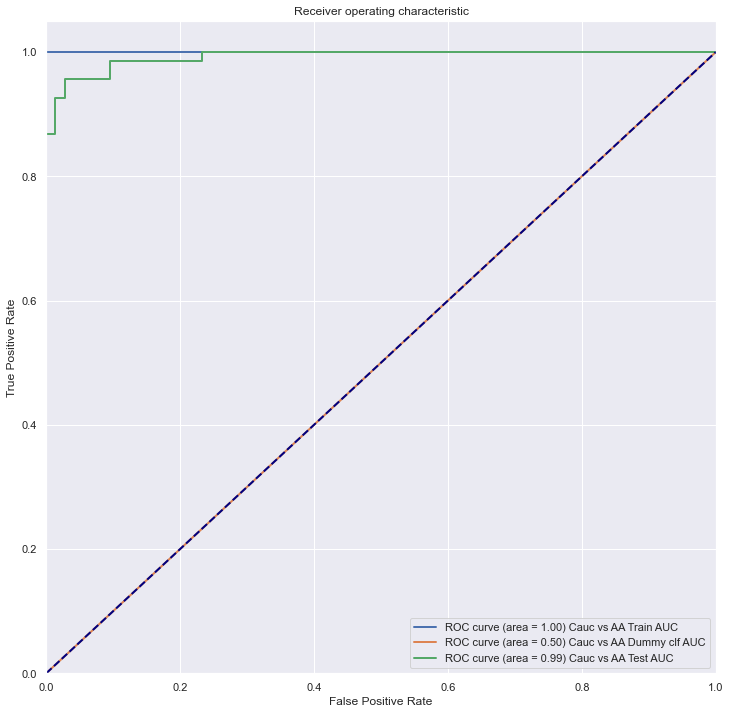

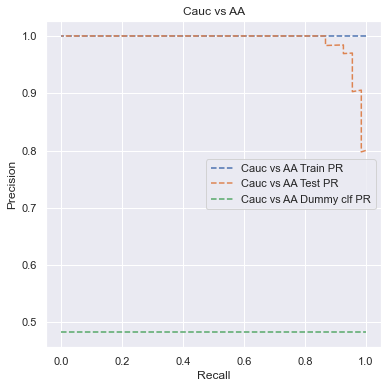

Cauc    361
Hisp    235
Name: population, dtype: int64

1395          3575          3700       3705        3826    \
level_0      target        target        target     target      target   
level_1  TPOX, 11.0  D18S51, 13.0  D2S441, 13.0  FGA, 24.0  SE33, 20.0   
0        0.00151527    0.00223259    0.00233193  0.0023401  0.00244457   

                3996        5960          6016        6214          7636    \
level_0         target      target        target      target        target   
level_1  D6S1043, 20.0   TH01, 6.0  D5S818, 10.0  SE33, 29.2  PentaE, 13.0   
0           0.00267503  0.00339825    0.00345473  0.00365365    0.00371666   

             7778           10146         11676         12851          13865   \
level_0      target         target        target        target         target   
level_1  SE33, 17.0  D3S1358, 17.0  D18S51, 17.0  D18S51, 19.0  D1S1656, 15.0   
0        0.00384447      0.0048273    0.00544006     0.0059366     0.00628702   

               14774       15195       15887         15929         17133   \
level_0        target      target      target        target        target   
level_1  PentaE, 10.0   TH01, 8.0  SE33, 32.2  D18S51, 12.0  D13S317, 8.0   
0          0.00656761  0.00678273  0.00714162    0.00718275    0.00761299   

               17138       17228         17258          18189         18264   \
level_0        target      target        target         target        target   
level_1  PentaE, 19.0  SE33, 28.2  PentaE, 16.0  D13S317, 13.0  D21S11, 33.2   
0          0.00761429   0.0077234    0.00775332     0.00809958    0.00815316   

               18453        18848         18850           18852   \
level_0        target       target        target          target   
level_1  CSF1PO, 12.0  D5S818, 8.0  D18S51, 22.0  D22S1045, 13.0   
0          0.00823254   0.00840054    0.00840054      0.00840054   

                19951          21357       22655           22798       22801   \
level_0         target         target      target          target      target   
level_1  D1S1656, 17.0  D8S1179, 10.0   vWA, 14.0  D10S1248, 19.0  SE33, 14.2   
0           0.00891278     0.00953795  0.00997819       0.0100396   0.0100396   

            22803          24136          24398         25475         25657   \
level_0     target         target         target        target        target   
level_1  vWA, 20.0  D6S1043, 13.0  D12S391, 17.3  D21S11, 31.2  D18S51, 18.0   
0        0.0100396      0.0107302      0.0108843     0.0112697       0.01137   

               25675           26662          28117          29218   \
level_0        target          target         target         target   
level_1  D21S11, 30.0  D22S1045, 12.0  D12S391, 18.0  D2S1338, 18.0   
0           0.0113942       0.0119698      0.0126551      0.0132579   

            30678          30680         30683       30684         30686   \
level_0     target         target        target      target        target   
level_1  vWA, 21.0  D19S433, 10.0  D2S441, 16.0  SE33, 33.0  D18S51, 14.2   
0        0.0139579      0.0139579     0.0139579   0.0139579     0.0139579   

               30689         30691   ...        173006         173007  \
level_0        target        target  ...        target         target   
level_1  PentaD, 17.0  D5S818, 15.0  ...  D2S441, 17.0  D3S1358, 11.0   
0           0.0139579     0.0139579  ...           NaN            NaN   

                173008         173009        173010        173011  \
level_0         target         target        target        target   
level_1  D3S1358, 12.0  D3S1358, 15.2  D6S1043, 8.0  D6S1043, 9.0   
0                  NaN            NaN           NaN           NaN   

                173012         173013         173014         173015  \
level_0         target         target         target         target   
level_1  D6S1043, 12.3  D6S1043, 18.3  D6S1043, 23.0  D6S1043, 23.3   
0                  NaN            NaN            NaN            NaN   

                173016         173017         173018       173019  \
level_0    

391         387             152            257  \
Feature       TH01, 9.3   TH01, 7.0  D22S1045, 11.0  D8S1179, 14.0   
KS value       0.188313    0.164598        0.162825       0.148419   
KS p-value  0.000518024  0.00360758      0.00412634      0.0116585   

                     179           49             214             156  \
Feature     D2S441, 10.0  D13S317, 9.0  D6S1043, 11.0  D22S1045, 15.0   
KS value        0.145095      0.144873        0.14406        0.139406   
KS p-value     0.0146139      0.014833      0.0156618       0.0212574   

                     245            51             60            128  \
Feature     D7S820, 11.0  D13S317, 11.0  D16S539, 10.0  D21S11, 28.0   
KS value        0.138889       0.135564       0.124778      0.123301   
KS p-value     0.0219777      0.0271494      0.0520138     0.0566304   

                  409            218           298            107  \
Feature     vWA, 16.0  D6S1043, 14.0  PentaD, 12.0  D1S1656, 11.0   
KS value     0.119238       0.117612      0.110446       0.108156   
KS p-value  0.0711378      0.0777723      0.113561       0.127524   

                     299        399            165           315         402  \
Feature     PentaD, 13.0  TPOX, 9.0  D2S1338, 19.0  PentaE, 15.0  TPOX, 12.0   
KS value        0.105349   0.102911       0.102467      0.101212    0.100768   
KS p-value      0.146518   0.164826       0.168343      0.178576    0.182324   

                      63           242           296            256  \
Feature     D16S539, 13.0  D7S820, 9.0  PentaD, 10.0  D8S1179, 13.0   
KS value        0.0978871    0.0969267     0.0932329      0.0911643   
KS p-value       0.208157     0.217377      0.255665        0.27916   

                      35             50             230            111  \
Feature     D12S391, 20.0  D13S317, 10.0  D6S1043, 21.3  D1S1656, 14.0   
KS value        0.0911643      0.0905733      0.0904255      0.0900561   
KS p-value        0.27916       0.286131       0.287922       0.292359   

                      199        282            31             25         412  \
Feature     D3S1358, 18.0  FGA, 27.0  D12S391, 19.0  D12S391, 17.0  vWA, 19.0   
KS value        0.0893174  0.0888002      0.0848848      0.0837027  0.0827423   
KS p-value       0.301419   0.307868       0.359795       0.376515   0.390481   

                     72             255            93            139  \
Feature     D18S51, 14.0  D8S1179, 12.0  D19S433, 13.0  D21S11, 32.2   
KS value       0.0814125      0.0766105      0.0746897     0.0743203   
KS p-value        0.4103        0.48657       0.518846      0.525184   

                     208             155        279          305        269  \
Feature     D5S818, 13.0  D22S1045, 14.0  FGA, 25.0  PentaE, 5.0  FGA, 20.0   
KS value       0.0740248       0.0736554  0.0722518    0.0715869  0.0712175   
KS p-value      0.530233        0.536673   0.561095     0.572862   0.579284   

                      43             110            171        275  \
Feature     D12S391, 24.0  D1S1656, 13.0  D2S1338, 25.0  FGA, 23.0   
KS value        0.0671543      0.0669326      0.0665632  0.0664155   
KS p-value       0.652077       0.656099       0.662736   0.665397   

                    202         342            195  ...            261  \
Feature     D5S818, 7.0  SE33, 16.0  D3S1358, 15.0  ...  D8S1179, 18.0   
KS value      0.0656767   0.0653812      0.0643469  ...     0.00531915   
KS p-value      0.67857    0.683975       0.702503  ...              1   

                      260            259            237            253  \
Feature     D8S1179, 17.0  D8S1179, 16.0  D6S1043, 26.0  D8S1179, 10.0   
KS value        0.0106383       0.014406              0     0.00502364   
KS p-value              1              1              1              1   

                     251           250           249           246  \
Feature     D8S1179, 8.0  D8S1179, 7.0  D7S820, 14.0  D7S820, 11.1   
KS value       0.0110816       

0:	total: 7.64ms	remaining: 3.81s
1:	total: 15.2ms	remaining: 3.78s
2:	total: 22.3ms	remaining: 3.7s
3:	total: 31.2ms	remaining: 3.87s
4:	total: 41ms	remaining: 4.06s
5:	total: 48ms	remaining: 3.96s
6:	total: 54.9ms	remaining: 3.86s
7:	total: 64.1ms	remaining: 3.94s
8:	total: 70.8ms	remaining: 3.87s
9:	total: 80.1ms	remaining: 3.92s
10:	total: 87.4ms	remaining: 3.89s
11:	total: 96.4ms	remaining: 3.92s
12:	total: 104ms	remaining: 3.89s
13:	total: 113ms	remaining: 3.92s
14:	total: 120ms	remaining: 3.87s
15:	total: 127ms	remaining: 3.84s
16:	total: 134ms	remaining: 3.81s
17:	total: 144ms	remaining: 3.85s
18:	total: 151ms	remaining: 3.81s
19:	total: 159ms	remaining: 3.83s
20:	total: 167ms	remaining: 3.8s
21:	total: 176ms	remaining: 3.82s
22:	total: 183ms	remaining: 3.79s
23:	total: 192ms	remaining: 3.8s
24:	total: 199ms	remaining: 3.78s
25:	total: 212ms	remaining: 3.87s
26:	total: 222ms	remaining: 3.89s
27:	total: 230ms	remaining: 3.87s
28:	total: 239ms	remaining: 3.87s
29:	total: 246ms	re

253:	total: 2.04s	remaining: 1.97s
254:	total: 2.05s	remaining: 1.97s
255:	total: 2.05s	remaining: 1.96s
256:	total: 2.06s	remaining: 1.95s
257:	total: 2.07s	remaining: 1.94s
258:	total: 2.08s	remaining: 1.93s
259:	total: 2.08s	remaining: 1.92s
260:	total: 2.09s	remaining: 1.92s
261:	total: 2.1s	remaining: 1.91s
262:	total: 2.11s	remaining: 1.9s
263:	total: 2.11s	remaining: 1.89s
264:	total: 2.12s	remaining: 1.88s
265:	total: 2.13s	remaining: 1.87s
266:	total: 2.14s	remaining: 1.86s
267:	total: 2.15s	remaining: 1.86s
268:	total: 2.15s	remaining: 1.85s
269:	total: 2.16s	remaining: 1.84s
270:	total: 2.17s	remaining: 1.83s
271:	total: 2.18s	remaining: 1.82s
272:	total: 2.18s	remaining: 1.81s
273:	total: 2.19s	remaining: 1.81s
274:	total: 2.2s	remaining: 1.8s
275:	total: 2.21s	remaining: 1.79s
276:	total: 2.21s	remaining: 1.78s
277:	total: 2.23s	remaining: 1.78s
278:	total: 2.23s	remaining: 1.77s
279:	total: 2.24s	remaining: 1.76s
280:	total: 2.25s	remaining: 1.75s
281:	total: 2.26s	remain

492:	total: 4.07s	remaining: 57.7ms
493:	total: 4.08s	remaining: 49.6ms
494:	total: 4.1s	remaining: 41.4ms
495:	total: 4.1s	remaining: 33.1ms
496:	total: 4.11s	remaining: 24.8ms
497:	total: 4.12s	remaining: 16.6ms
498:	total: 4.13s	remaining: 8.29ms
499:	total: 4.15s	remaining: 0us


/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.977014  0.769964  0.974162  0.707785
1    rf   0.847072  0.657668  0.798693  0.602091
2    lr   0.891855  0.747278  0.881299  0.698643
3   svm   1.000000  0.753630  1.000000  0.686918

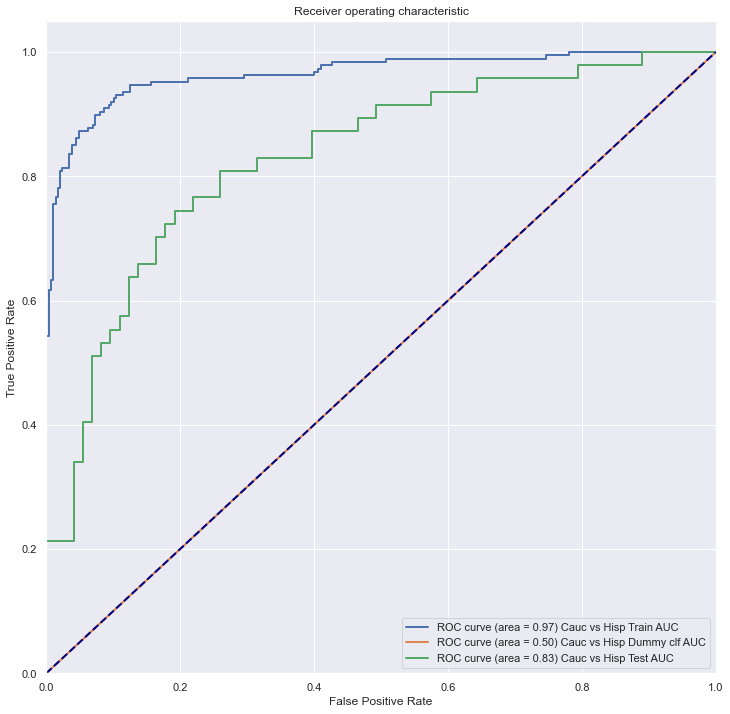

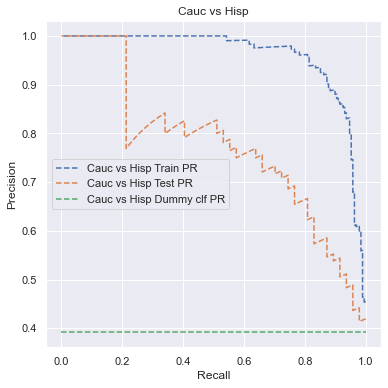

Cauc     361
Asian     97
Name: population, dtype: int64

2064            2118            4497          4789        4791    \
level_0      target          target          target        target      target   
level_1   FGA, 25.0  D10S1248, 17.0  D10S1248, 13.0  PentaD, 15.0  TH01, 10.0   
0        0.00266006      0.00270426      0.00340376    0.00376903  0.00376903   

             6703          7182          8508           11022          14819   \
level_0      target        target        target         target         target   
level_1  TPOX, 12.0  D7S820, 10.0  PentaE, 16.0  D2S1338, 20.0  D6S1043, 20.0   
0        0.00412067    0.00474456    0.00547705     0.00631342     0.00867143   

             15570        16455         17051          22657       22933   \
level_0      target       target        target         target      target   
level_1  SE33, 28.2  D5S818, 8.0  CSF1PO, 12.0  D2S1338, 24.0  SE33, 32.2   
0        0.00887485   0.00946817    0.00970403      0.0132017   0.0134529   

               22936          23517         27471      27502      28539   \
level_0        target         target        target     target     target   
level_1  CSF1PO, 14.0  D2S1338, 26.0  D5S818, 13.0  TPOX, 8.0  vWA, 19.0   
0           0.0134646      0.0136391       0.01595  0.0159912  0.0165257   

            28581          28587      29728       31181          32626   \
level_0     target         target     target      target         target   
level_1  vWA, 18.0  D12S391, 25.0  vWA, 17.0  SE33, 21.2  D1S1656, 18.3   
0        0.0165809      0.0165836  0.0172774   0.0181109      0.0191668   

               33254       35683      36346         39498         40193   \
level_0        target      target     target        target        target   
level_1  D18S51, 19.0  SE33, 27.2  FGA, 18.0  PentaE, 14.0  D2S441, 11.0   
0            0.019529    0.021147  0.0216554     0.0235059     0.0239215   

             40573       40841         41292         42524         43972   \
level_0      target      target        target        target        target   
level_1  SE33, 16.0  SE33, 18.0  D18S51, 21.0  D18S51, 15.0  D2S441, 12.3   
0         0.0242785     0.02447     0.0247556     0.0256141      0.026688   

                43974          43982         44297      44703          44704   \
level_0         target         target        target     target         target   
level_1  D12S391, 19.3  D6S1043, 16.0  D18S51, 20.0  FGA, 21.2  D13S317, 15.0   
0             0.026688       0.026688     0.0270336  0.0272398      0.0272398   

             44706        44707         44708         44711         44713   \
level_0      target       target        target        target        target   
level_1  SE33, 11.0  D7S820, 8.1  PentaE, 24.0  D18S51, 16.2  PentaD, 17.0   
0         0.0272398    0.0272398     0.0272398     0.0272398     0.0272398   

               44714       44717       44719         44721      44722   ...  \
level_0        target      target      target        target     target  ...   
level_1  D6S1043, 8.0  SE33, 32.0  SE33, 34.2  D21S11, 35.0  vWA, 12.0  ...   
0           0.0272398   0.0272398   0.0272398     0.0272398  0.0272398  ...   

                173006         173007       173008        173009  \
level_0         target         target       target        target   
level_1  D6S1043, 25.0  D6S1043, 26.0  D7S820, 6.0  D7S820, 10.3   
0                  NaN            NaN          NaN           NaN   

               173010        173011     173012     173013     173014  \
level_0        target        target     target     target     target   
level_1  D7S820, 11.1  D8S1179, 7.0  FGA, 16.2  FGA, 17.0  FGA, 17.2   
0                 NaN           NaN        NaN        NaN        NaN   

            173015     173016     173017     173018     173019     173020  \
level_0     target     target     target     target     target     target   
level_1  FGA, 18.2  FGA, 19.2  FGA, 22.3  FGA, 25.2  FGA, 28.0  FGA, 29.0   
0              NaN        NaN        NaN        NaN        NaN        NaN   

        

390          391           59            205          307  \
Feature       TH01, 9.0    TH01, 9.3  D16S539, 9.0  D5S818, 10.0  PentaE, 7.0   
KS value       0.499199     0.477564      0.366186      0.329327     0.309028   
KS p-value  1.78746e-14  2.88547e-13   7.38935e-08   2.03919e-06  1.07749e-05   

                     182           186             157             158  \
Feature     D2S441, 12.0  D2S441, 14.0  D22S1045, 16.0  D22S1045, 17.0   
KS value        0.290865      0.278045         0.25641        0.243323   
KS p-value   4.34327e-05   0.000110104      0.00047897      0.00109757   

                     207            62             163         407  \
Feature     D5S818, 12.0  D16S539, 12.0  D2S1338, 17.0   vWA, 14.0   
KS value        0.242521       0.235043       0.225962    0.221421   
KS p-value    0.00115313     0.00181228     0.00307718  0.00397772   

                    242           299            214            61   \
Feature     D7S820, 9.0  PentaD, 13.0  D6S1043, 11.0  D16S539, 11.0   
KS value       0.214744      0.205929       0.192575       0.189904   
KS p-value   0.00574587     0.0091742      0.0179439      0.0204109   

                      60            72             35            128  \
Feature     D16S539, 10.0  D18S51, 14.0  D12S391, 20.0  D21S11, 28.0   
KS value         0.189637      0.186966       0.186699      0.186699   
KS p-value      0.0206721     0.0234623      0.0237608     0.0237608   

                     70             98            245            195  \
Feature     D18S51, 13.0  D19S433, 15.0  D7S820, 11.0  D3S1358, 15.0   
KS value        0.184562       0.183226       0.18109        0.17922   
KS p-value     0.0262559      0.0279329      0.030808      0.0335387   

                      256            113            194            215  \
Feature     D8S1179, 13.0  D1S1656, 15.0  D3S1358, 14.0  D6S1043, 12.0   
KS value         0.176816       0.169872         0.1664       0.165064   
KS p-value      0.0373534      0.0505768      0.0585832      0.0619373   

                      28             97            49             50   \
Feature     D12S391, 18.0  D19S433, 14.2  D13S317, 9.0  D13S317, 10.0   
KS value         0.162927       0.153045      0.151442       0.150908   
KS p-value      0.0676504       0.100211      0.106552       0.108744   

                     179        408            218           206  \
Feature     D2S441, 10.0  vWA, 15.0  D6S1043, 14.0  D5S818, 11.0   
KS value        0.148504   0.143162       0.141827      0.138088   
KS p-value      0.119051   0.144816       0.151924      0.173301   

                     78             165            108           48   \
Feature     D18S51, 17.0  D2S1338, 19.0  D1S1656, 12.0  D13S317, 8.0   
KS value        0.136752       0.136752       0.135951       0.13328   
KS p-value      0.181472       0.181472       0.186531       0.20416   

                     312           69             53             63   \
Feature     PentaE, 12.0  D18S51, 12.0  D13S317, 13.0  D16S539, 13.0   
KS value        0.132746      0.132479       0.132479       0.128472   
KS p-value      0.207811      0.209699       0.209699       0.239054   

                     138        386            197           5    \
Feature     D21S11, 32.0  TH01, 6.0  D3S1358, 16.0  CSF1PO, 11.0   
KS value        0.127137   0.126335       0.126335      0.124466   
KS p-value      0.249488   0.255976       0.255976       0.27144   

                      217  ...        267        266        265        264  \
Feature     D6S1043, 13.0  ...  FGA, 19.0  FGA, 18.2  FGA, 18.0  FGA, 17.2   
KS value         0.122329  ...  0.0181624          0  0.0120192          0   
KS p-value       0.289905  ...          1          1          1          1   

                  263           212        262           252           250  \
Feature     FGA, 17.0  D6S1043, 9.0  FGA, 16.2  D8S1179, 9.0  D8S1179, 7.0   
KS value            0             0          0     0.0138889           

0:	total: 7.27ms	remaining: 3.63s
1:	total: 15.2ms	remaining: 3.79s
2:	total: 22.7ms	remaining: 3.77s
3:	total: 30ms	remaining: 3.72s
4:	total: 37.7ms	remaining: 3.74s
5:	total: 44.8ms	remaining: 3.69s
6:	total: 52ms	remaining: 3.66s
7:	total: 59.4ms	remaining: 3.65s
8:	total: 64.9ms	remaining: 3.54s
9:	total: 71.9ms	remaining: 3.52s
10:	total: 84.8ms	remaining: 3.77s
11:	total: 95.7ms	remaining: 3.89s
12:	total: 106ms	remaining: 3.98s
13:	total: 116ms	remaining: 4.04s
14:	total: 129ms	remaining: 4.16s
15:	total: 145ms	remaining: 4.37s
16:	total: 157ms	remaining: 4.47s
17:	total: 173ms	remaining: 4.64s
18:	total: 188ms	remaining: 4.76s
19:	total: 200ms	remaining: 4.79s
20:	total: 215ms	remaining: 4.89s
21:	total: 226ms	remaining: 4.9s
22:	total: 233ms	remaining: 4.83s
23:	total: 242ms	remaining: 4.79s
24:	total: 252ms	remaining: 4.79s
25:	total: 259ms	remaining: 4.72s
26:	total: 267ms	remaining: 4.68s
27:	total: 279ms	remaining: 4.7s
28:	total: 288ms	remaining: 4.67s
29:	total: 294ms	r

241:	total: 1.82s	remaining: 1.94s
242:	total: 1.83s	remaining: 1.94s
243:	total: 1.84s	remaining: 1.93s
244:	total: 1.84s	remaining: 1.92s
245:	total: 1.85s	remaining: 1.91s
246:	total: 1.86s	remaining: 1.9s
247:	total: 1.86s	remaining: 1.9s
248:	total: 1.87s	remaining: 1.89s
249:	total: 1.88s	remaining: 1.88s
250:	total: 1.89s	remaining: 1.87s
251:	total: 1.89s	remaining: 1.86s
252:	total: 1.9s	remaining: 1.85s
253:	total: 1.91s	remaining: 1.85s
254:	total: 1.91s	remaining: 1.84s
255:	total: 1.92s	remaining: 1.83s
256:	total: 1.93s	remaining: 1.82s
257:	total: 1.94s	remaining: 1.81s
258:	total: 1.94s	remaining: 1.81s
259:	total: 1.95s	remaining: 1.8s
260:	total: 1.96s	remaining: 1.79s
261:	total: 1.96s	remaining: 1.78s
262:	total: 1.97s	remaining: 1.77s
263:	total: 1.98s	remaining: 1.77s
264:	total: 1.98s	remaining: 1.76s
265:	total: 1.99s	remaining: 1.75s
266:	total: 2s	remaining: 1.74s
267:	total: 2s	remaining: 1.73s
268:	total: 2.01s	remaining: 1.73s
269:	total: 2.02s	remaining: 1

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.998668  0.938578  0.996217  0.806909
1    rf   0.978261  0.915948  0.943169  0.802736
2    lr   1.000000  0.992457  1.000000  0.977083
3   svm   1.000000  0.993534  1.000000  0.979715

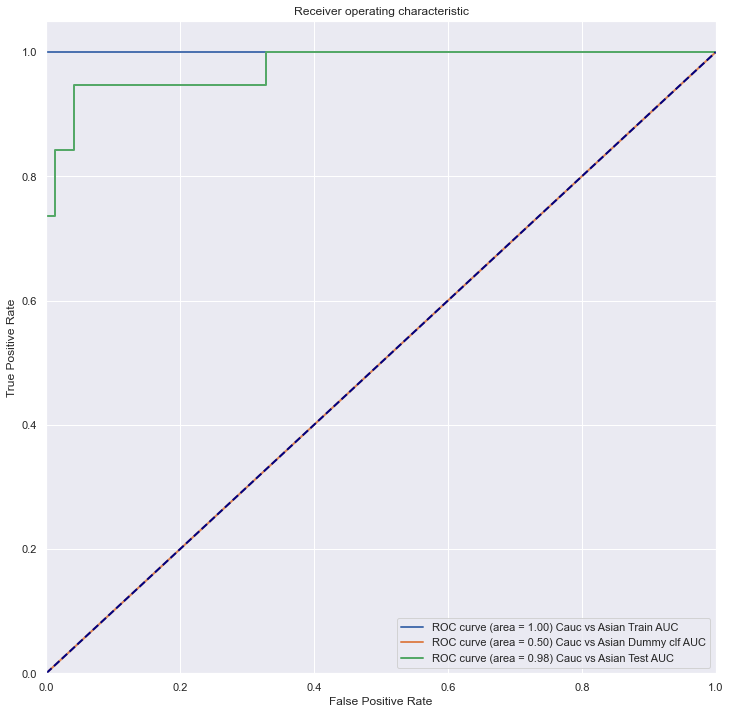

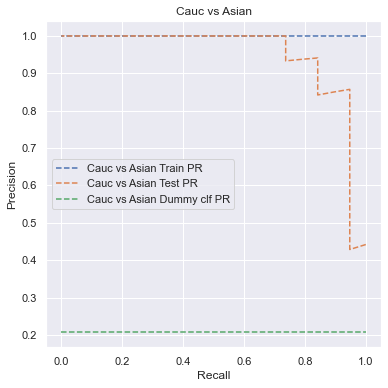

AA      341
Hisp    235
Name: population, dtype: int64

303             737            1995           1997    \
level_0        target          target         target         target   
level_1  CSF1PO, 13.0  D10S1248, 17.0  D6S1043, 10.0  D1S1656, 19.3   
0         0.000261489     0.000654381     0.00185428     0.00185428   

               2089          2091        5389           5403          5660    \
level_0        target        target      target         target        target   
level_1  PentaE, 14.0  PentaE, 11.0  SE33, 13.0  D2S1338, 26.0  D2S441, 11.3   
0          0.00193113    0.00193113  0.00263688     0.00265375    0.00297734   

             5805           8675          10773          10793   \
level_0      target         target        target         target   
level_1  SE33, 26.2  D6S1043, 17.0  D21S11, 31.0  D8S1179, 12.0   
0        0.00307821     0.00344782    0.00392146      0.0039409   

                13538       13571        15317         15380       16979   \
level_0         target      target       target        target      target   
level_1  D19S433, 15.2  SE33, 23.2  D7S820, 7.0  D21S11, 33.2   FGA, 24.0   
0           0.00469706   0.0047245   0.00502595    0.00507617  0.00551316   

                19237       19273          25870      34714         34717   \
level_0         target      target         target     target        target   
level_1  D6S1043, 13.0  SE33, 22.0  D2S1338, 24.0  vWA, 21.0  PentaD, 17.0   
0           0.00622391  0.00629555     0.00857021  0.0122735     0.0122735   

            34719      34720          34723         34724         34888   \
level_0     target     target         target        target        target   
level_1  FGA, 30.0  vWA, 11.0  D6S1043, 19.3  D18S51, 24.0  D5S818, 15.0   
0        0.0122735  0.0122735      0.0122735     0.0122735     0.0124208   

               34891          34892      35016          39658          40100   \
level_0        target         target     target         target         target   
level_1  D18S51, 10.0  D8S1179, 18.0  TH01, 9.0  D2S1338, 25.0  D1S1656, 17.0   
0           0.0124208      0.0124208  0.0124469      0.0143793      0.0146164   

               46373       46416          46597       47313          47315   \
level_0        target      target         target      target         target   
level_1  CSF1PO, 10.0  SE33, 18.0  D1S1656, 13.0  SE33, 33.2  D8S1179, 17.0   
0           0.0169594   0.0170093      0.0171349   0.0173954      0.0173954   

                47317       47318          47321          47323      47324   \
level_0         target      target         target         target     target   
level_1  D3S1358, 13.0  SE33, 15.2  D1S1656, 14.3  D3S1358, 19.0  FGA, 22.2   
0            0.0173954   0.0173954      0.0173954      0.0173954  0.0173954   

             47327       49508          49700          50960      52513   \
level_0      target      target         target         target     target   
level_1  SE33, 12.2  SE33, 15.0  D12S391, 24.0  D3S1358, 14.0  vWA, 14.0   
0         0.0173954   0.0182396      0.0183315      0.0189419  0.0194985   

            52827         53283   ...         173006         173007  \
level_0     target        target  ...         target         target   
level_1  FGA, 26.0  D5S818, 12.0  ...  D19S433, 17.0  D19S433, 18.0   
0        0.0196092     0.0199705  ...            NaN            NaN   

                173008         173009        173010        173011  \
level_0         target         target        target        target   
level_1  D1S1656, 12.3  D1S1656, 20.3  D21S11, 25.2  D21S11, 26.0   
0                  NaN            NaN           NaN           NaN   

               173012        173013        173014        173015  \
level_0        target        target        target        target   
level_1  D21S11, 28.2  D21S11, 29.2  D21S11, 30.3  D21S11, 34.2   
0                 NaN           NaN           NaN           NaN   

                173016         173017         173018       173019  \
level_0         target         target         tar

179             157           128           182  \
Feature     D2S441, 10.0  D22S1045, 16.0  D21S11, 28.0  D2S441, 12.0   
KS value        0.359512        0.293101      0.256649      0.253989   
KS p-value    2.6612e-13     6.20038e-09    6.1365e-07   8.35778e-07   

                       156          308            52            206  \
Feature     D22S1045, 15.0  PentaE, 8.0  D13S317, 12.0  D5S818, 11.0   
KS value          0.241317     0.236859       0.227237      0.226924   
KS p-value     3.50506e-06  5.69996e-06    1.57785e-05   1.62954e-05   

                     49             167           208            111  \
Feature     D13S317, 9.0  D2S1338, 21.0  D5S818, 13.0  D1S1656, 14.0   
KS value          0.2227       0.220901      0.218633       0.216521   
KS p-value   2.51094e-05    3.01044e-05    3.7777e-05    4.65571e-05   

                     72           391          387             158  \
Feature     D18S51, 14.0    TH01, 9.3    TH01, 7.0  D22S1045, 17.0   
KS value        0.194149     0.188517     0.186718        0.185153   
KS p-value   0.000375285  0.000612054  0.000713257     0.000813776   

                   386         399          289         388            118  \
Feature      TH01, 6.0   TPOX, 9.0  PentaD, 2.2   TH01, 8.0  D1S1656, 17.3   
KS value      0.181242    0.180695     0.177644    0.175767       0.172403   
KS p-value  0.00112664  0.00117801   0.00150967  0.00175411     0.00228742   

                    240           133           48          396  \
Feature     D7S820, 8.0  D21S11, 30.0  D13S317, 8.0   TPOX, 6.0   
KS value       0.164659      0.160904      0.157619    0.155194   
KS p-value   0.00413176     0.0054504    0.00690788  0.00820191   

                       14            70             28             25   \
Feature     D10S1248, 12.0  D18S51, 13.0  D12S391, 18.0  D12S391, 17.0   
KS value          0.148154      0.142522       0.142444       0.139862   
KS p-value       0.0133012     0.0192673      0.0193643      0.0228376   

                      168          294           139         402  \
Feature     D2S1338, 22.0  PentaD, 8.0  D21S11, 32.2  TPOX, 12.0   
KS value         0.136264     0.135951      0.133996     0.12938   
KS p-value      0.0285952    0.0291527     0.0328564   0.0432557   

                       152           247        398            98   \
Feature     D22S1045, 11.0  D7S820, 12.0  TPOX, 8.0  D19S433, 15.0   
KS value           0.12766      0.126721   0.126252       0.126252   
KS p-value       0.0478116     0.0504771  0.0518537      0.0518537   

                     299            96            296            199  \
Feature     PentaD, 13.0  D19S433, 14.0  PentaD, 10.0  D3S1358, 18.0   
KS value        0.125469       0.125469      0.124687       0.123748   
KS p-value     0.0542175      0.0542175     0.0566714      0.0597424   

                    305            51             218          2    \
Feature     PentaE, 5.0  D13S317, 11.0  D6S1043, 14.0  CSF1PO, 8.0   
KS value       0.122028       0.119837       0.112719     0.108651   
KS p-value    0.0657334      0.0741182       0.107837     0.132231   

                      116            91            245            253  \
Feature     D1S1656, 16.3  D19S433, 12.0  D7S820, 11.0  D8S1179, 10.0   
KS value         0.107713       0.107635      0.105757       0.104036   
KS p-value       0.138415       0.138945      0.152167       0.165094   

                       155  ...           251           252            254  \
Feature     D22S1045, 14.0  ...  D8S1179, 8.0  D8S1179, 9.0  D8S1179, 11.0   
KS value          0.102863  ...     0.0135325    0.00860451       0.010873   
KS p-value        0.174438  ...             1             1              1   

                      255            260            261        262  \
Feature     D8S1179, 12.0  D8S1179, 17.0  D8S1179, 18.0  FGA, 16.2   
KS value         0.012281     0.00328536     0.00203379          0   
KS p-value              1              1              

0:	total: 10.3ms	remaining: 5.16s
1:	total: 18ms	remaining: 4.48s
2:	total: 25.7ms	remaining: 4.26s
3:	total: 33.3ms	remaining: 4.13s
4:	total: 40.8ms	remaining: 4.04s
5:	total: 47.8ms	remaining: 3.94s
6:	total: 55.5ms	remaining: 3.91s
7:	total: 62.4ms	remaining: 3.84s
8:	total: 69.9ms	remaining: 3.81s
9:	total: 77.4ms	remaining: 3.79s
10:	total: 86.8ms	remaining: 3.86s
11:	total: 94.5ms	remaining: 3.84s
12:	total: 104ms	remaining: 3.91s
13:	total: 112ms	remaining: 3.89s
14:	total: 120ms	remaining: 3.87s
15:	total: 127ms	remaining: 3.85s
16:	total: 135ms	remaining: 3.83s
17:	total: 143ms	remaining: 3.84s
18:	total: 151ms	remaining: 3.83s
19:	total: 159ms	remaining: 3.8s
20:	total: 168ms	remaining: 3.83s
21:	total: 175ms	remaining: 3.8s
22:	total: 184ms	remaining: 3.81s
23:	total: 196ms	remaining: 3.88s
24:	total: 204ms	remaining: 3.87s
25:	total: 214ms	remaining: 3.91s
26:	total: 226ms	remaining: 3.96s
27:	total: 236ms	remaining: 3.98s
28:	total: 245ms	remaining: 3.99s
29:	total: 257ms

257:	total: 2.91s	remaining: 2.73s
258:	total: 2.92s	remaining: 2.72s
259:	total: 2.94s	remaining: 2.71s
260:	total: 2.95s	remaining: 2.7s
261:	total: 2.96s	remaining: 2.69s
262:	total: 2.97s	remaining: 2.68s
263:	total: 2.98s	remaining: 2.67s
264:	total: 2.99s	remaining: 2.65s
265:	total: 3s	remaining: 2.64s
266:	total: 3.01s	remaining: 2.63s
267:	total: 3.02s	remaining: 2.62s
268:	total: 3.03s	remaining: 2.6s
269:	total: 3.04s	remaining: 2.59s
270:	total: 3.05s	remaining: 2.58s
271:	total: 3.06s	remaining: 2.56s
272:	total: 3.07s	remaining: 2.55s
273:	total: 3.07s	remaining: 2.54s
274:	total: 3.08s	remaining: 2.52s
275:	total: 3.09s	remaining: 2.51s
276:	total: 3.1s	remaining: 2.49s
277:	total: 3.11s	remaining: 2.48s
278:	total: 3.12s	remaining: 2.47s
279:	total: 3.12s	remaining: 2.45s
280:	total: 3.13s	remaining: 2.44s
281:	total: 3.14s	remaining: 2.43s
282:	total: 3.15s	remaining: 2.42s
283:	total: 3.16s	remaining: 2.4s
284:	total: 3.16s	remaining: 2.39s
285:	total: 3.17s	remaining

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.995841  0.930799  0.994359  0.919415
1    rf   0.977064  0.912281  0.970544  0.896119
2    lr   0.992569  0.932749  0.990212  0.924078
3   svm   1.000000  0.940546  1.000000  0.935196

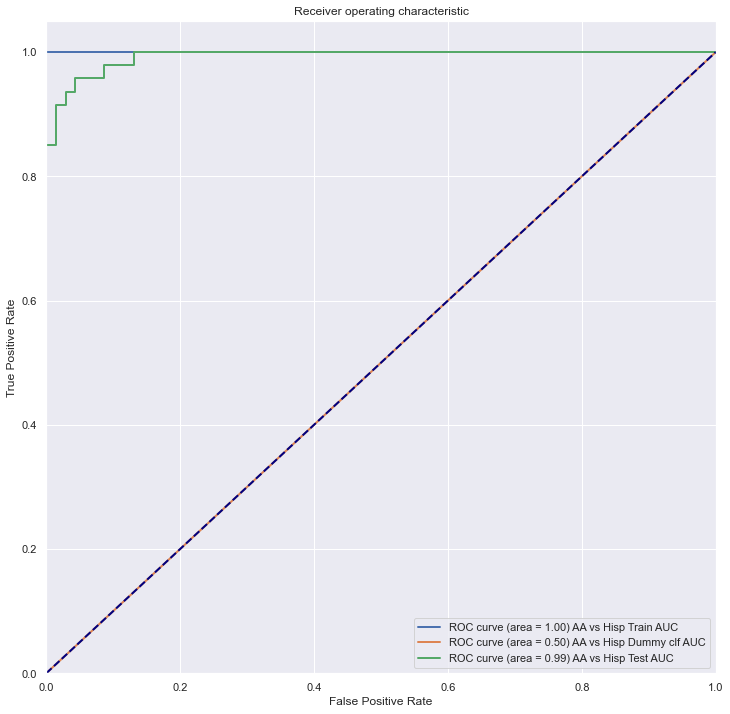

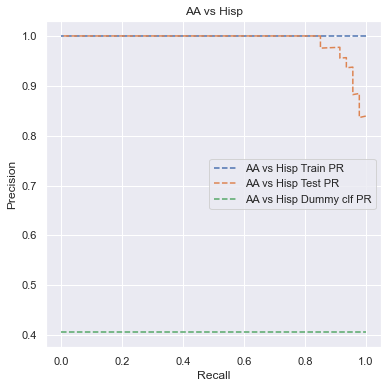

AA       341
Asian     97
Name: population, dtype: int64

256           5211        11341          13917       15242   \
level_0         target        target      target         target      target   
level_1  D12S391, 24.0  D21S11, 31.2  SE33, 21.0  D6S1043, 11.0  SE33, 20.0   
0          0.000247856    0.00313067  0.00548648     0.00638622  0.00652479   

              15317        15318         15321           15322         15324   \
level_0       target       target        target          target        target   
level_1  D7S820, 7.0  PentaD, 6.0  D2S441, 12.3  D22S1045, 19.0  D18S51, 21.0   
0         0.00661201   0.00661201    0.00661201      0.00661201    0.00661201   

                15545         15729          15758         15761       15762   \
level_0         target        target         target        target      target   
level_1  D12S391, 23.0  D21S11, 29.0  D19S433, 17.2  D18S51, 23.0  SE33, 32.2   
0           0.00673402    0.00699833     0.00701268    0.00701268  0.00701268   

               20591          23882          26465           27402   \
level_0        target         target         target          target   
level_1  D2S441, 11.0  D3S1358, 18.0  D19S433, 15.0  D22S1045, 18.0   
0          0.00891197      0.0103405      0.0118121       0.0122892   

                 31500      31678          36022          36323   \
level_0          target     target         target         target   
level_1  D22S1045, 17.0  FGA, 24.0  D1S1656, 13.0  D12S391, 19.0   
0             0.0143454  0.0144707      0.0166163       0.016748   

                37217          37477           39543          41388   \
level_0         target         target          target         target   
level_1  D8S1179, 13.0  D6S1043, 17.0  D22S1045, 16.0  D1S1656, 12.0   
0            0.0173633      0.0174801       0.0183249      0.0191948   

             42568          42790          45934          47589   \
level_0      target         target         target         target   
level_1  SE33, 22.0  D16S539, 13.0  D8S1179, 12.0  D12S391, 18.0   
0         0.0198069      0.0200318      0.0214127      0.0224849   

                51257          51259          51261          51262   \
level_0         target         target         target         target   
level_1  D2S1338, 27.0  D8S1179, 17.0  D12S391, 19.3  D8S1179, 18.0   
0            0.0246832      0.0246832      0.0246832      0.0246832   

               51811         52809      55139           57150         58670   \
level_0        target        target     target          target        target   
level_1  CSF1PO, 11.0  D5S818, 14.0  FGA, 21.0  D10S1248, 15.0  D21S11, 33.1   
0           0.0250419     0.0254408  0.0265208       0.0275533     0.0286649   

             58673         58675          58676         58679         58680   \
level_0      target        target         target        target        target   
level_1  SE33, 11.2  D18S51, 15.2  D10S1248, 8.0  D21S11, 37.0  D21S11, 38.0   
0         0.0286649     0.0286649      0.0286649     0.0286649     0.0286649   

            58681          58684         58686      58688          58691   \
level_0     target         target        target     target         target   
level_1  FGA, 23.2  D12S391, 18.1  D6S1043, 9.0  FGA, 22.3  D12S391, 17.1   
0        0.0286649      0.0286649     0.0286649  0.0286649      0.0286649   

         ...         173006         173007         173008        173009  \
level_0  ...         target         target         target        target   
level_1  ...  D2S1338, 15.0  D2S1338, 28.0  D2S1338, 31.0  D2S441, 14.3   
0        ...            NaN            NaN            NaN           NaN   

               173010        173011         173012         173013  \
level_0        target        target         target         target   
level_1  D2S441, 16.0  D2S441, 17.0  D3S1358, 11.0  D3S1358, 20.0   
0                 NaN           NaN            NaN            NaN   

               173014         173015         173016         173017  \
level_0        target         target         

390           70            128            111  \
Feature       TH01, 9.0  D18S51, 13.0  D21S11, 28.0  D1S1656, 14.0   
KS value       0.359729      0.355015      0.347756       0.340498   
KS p-value  1.61761e-07   2.54902e-07    4.9283e-07    9.38186e-07   

                     179           72            48            186  \
Feature     D2S441, 10.0  D18S51, 14.0  D13S317, 8.0  D2S441, 14.0   
KS value        0.338235      0.298077      0.291007      0.287425   
KS p-value   1.10242e-06   2.86858e-05   4.93147e-05   6.42214e-05   

                      52           408          308            167  \
Feature     D13S317, 12.0    vWA, 15.0  PentaE, 8.0  D2S1338, 21.0   
KS value         0.286293     0.283277     0.266591       0.266591   
KS p-value    6.81222e-05  8.43364e-05  0.000266246    0.000266246   

                     59            205         398         388           49   \
Feature     D16S539, 9.0  D5S818, 10.0   TPOX, 8.0   TH01, 8.0  D13S317, 9.0   
KS value        0.247832      0.224736    0.215781    0.215592      0.212198   
KS p-value   0.000900134    0.00354526  0.00582748  0.00586388    0.00706049   

                    289            215            35             61   \
Feature     PentaD, 2.2  D6S1043, 12.0  D12S391, 20.0  D16S539, 11.0   
KS value       0.209559       0.208428       0.197115       0.194193   
KS p-value   0.00802374     0.00858981      0.0151398      0.0175282   

                    307          295           296            91   \
Feature     PentaE, 7.0  PentaD, 9.0  PentaD, 10.0  D19S433, 12.0   
KS value       0.191176     0.191082      0.187971       0.184012   
KS p-value    0.0201387    0.0202384     0.0234887      0.0281704   

                    294            113            253        396  \
Feature     PentaD, 8.0  D1S1656, 15.0  D8S1179, 10.0  TPOX, 6.0   
KS value       0.183824        0.17845       0.177413   0.176471   
KS p-value    0.0284099      0.0362206      0.0380382  0.0395343   

                     133            116            218            164  \
Feature     D21S11, 30.0  D1S1656, 16.3  D6S1043, 14.0  D2S1338, 18.0   
KS value        0.174679       0.174679       0.173548       0.171851   
KS p-value     0.0427591      0.0427591      0.0449921      0.0484031   

                  407           207        409           79             169  \
Feature     vWA, 14.0  D5S818, 12.0  vWA, 16.0  D18S51, 18.0  D2S1338, 23.0   
KS value     0.171569      0.170626   0.164593      0.158371       0.156863   
KS p-value  0.0489667     0.0509555  0.0655477      0.084199      0.0892886   

                     315        399            25           242        410  \
Feature     PentaE, 15.0  TPOX, 9.0  D12S391, 17.0  D7S820, 9.0  vWA, 17.0   
KS value        0.153469   0.153281       0.153092     0.151018   0.150452   
KS p-value      0.101687    0.10248       0.103302     0.111792   0.114045   

                   368           245         350          204            168  \
Feature     SE33, 27.2  D7S820, 11.0  SE33, 19.0  D5S818, 9.0  D2S1338, 22.0   
KS value      0.149887      0.145173    0.141874     0.140837       0.140083   
KS p-value    0.116362      0.138559    0.156045     0.161303        0.16615   

                  387            115  ...         268        264        262  \
Feature     TH01, 7.0  D1S1656, 16.0  ...   FGA, 19.2  FGA, 17.2  FGA, 16.2   
KS value       0.1398       0.132824  ...  0.00735294          0          0   
KS p-value   0.167748       0.212462  ...           1          1          1   

                      261            220            260           252  \
Feature     D8S1179, 18.0  D6S1043, 16.0  D8S1179, 17.0  D8S1179, 9.0   
KS value       0.00546757      0.0165913     0.00546757    0.00735294   
KS p-value              1              1              1             1   

                     251           250           249           248  \
Feature     D8S1179, 8.0  D8S1179, 7.0  D7S820, 14.0  D7S820, 13.0   
KS value       0.018382

0:	total: 6.87ms	remaining: 3.43s
1:	total: 13.5ms	remaining: 3.35s
2:	total: 20.1ms	remaining: 3.33s
3:	total: 27.9ms	remaining: 3.45s
4:	total: 35.8ms	remaining: 3.54s
5:	total: 43.1ms	remaining: 3.55s
6:	total: 50.6ms	remaining: 3.56s
7:	total: 61.7ms	remaining: 3.79s
8:	total: 70.1ms	remaining: 3.83s
9:	total: 79.2ms	remaining: 3.88s
10:	total: 88.5ms	remaining: 3.94s
11:	total: 98.6ms	remaining: 4.01s
12:	total: 108ms	remaining: 4.05s
13:	total: 118ms	remaining: 4.1s
14:	total: 128ms	remaining: 4.15s
15:	total: 138ms	remaining: 4.17s
16:	total: 148ms	remaining: 4.21s
17:	total: 159ms	remaining: 4.26s
18:	total: 168ms	remaining: 4.26s
19:	total: 177ms	remaining: 4.25s
20:	total: 191ms	remaining: 4.35s
21:	total: 200ms	remaining: 4.34s
22:	total: 224ms	remaining: 4.64s
23:	total: 246ms	remaining: 4.88s
24:	total: 260ms	remaining: 4.93s
25:	total: 269ms	remaining: 4.9s
26:	total: 279ms	remaining: 4.89s
27:	total: 290ms	remaining: 4.89s
28:	total: 300ms	remaining: 4.88s
29:	total: 311

259:	total: 2.7s	remaining: 2.49s
260:	total: 2.7s	remaining: 2.48s
261:	total: 2.71s	remaining: 2.46s
262:	total: 2.73s	remaining: 2.46s
263:	total: 2.74s	remaining: 2.45s
264:	total: 2.75s	remaining: 2.44s
265:	total: 2.76s	remaining: 2.43s
266:	total: 2.77s	remaining: 2.42s
267:	total: 2.78s	remaining: 2.4s
268:	total: 2.79s	remaining: 2.39s
269:	total: 2.8s	remaining: 2.38s
270:	total: 2.81s	remaining: 2.37s
271:	total: 2.82s	remaining: 2.36s
272:	total: 2.84s	remaining: 2.36s
273:	total: 2.86s	remaining: 2.36s
274:	total: 2.87s	remaining: 2.35s
275:	total: 2.88s	remaining: 2.34s
276:	total: 2.9s	remaining: 2.33s
277:	total: 2.91s	remaining: 2.33s
278:	total: 2.93s	remaining: 2.32s
279:	total: 2.96s	remaining: 2.32s
280:	total: 2.97s	remaining: 2.31s
281:	total: 2.98s	remaining: 2.3s
282:	total: 3s	remaining: 2.3s
283:	total: 3.01s	remaining: 2.29s
284:	total: 3.03s	remaining: 2.28s
285:	total: 3.04s	remaining: 2.28s
286:	total: 3.06s	remaining: 2.27s
287:	total: 3.08s	remaining: 2

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.999704  0.972222  0.999022  0.942474
1    rf   0.970775  0.833912  0.921866  0.628862
2    lr   1.000000  0.998843  1.000000  0.996324
3   svm   1.000000  0.996528  1.000000  0.990132

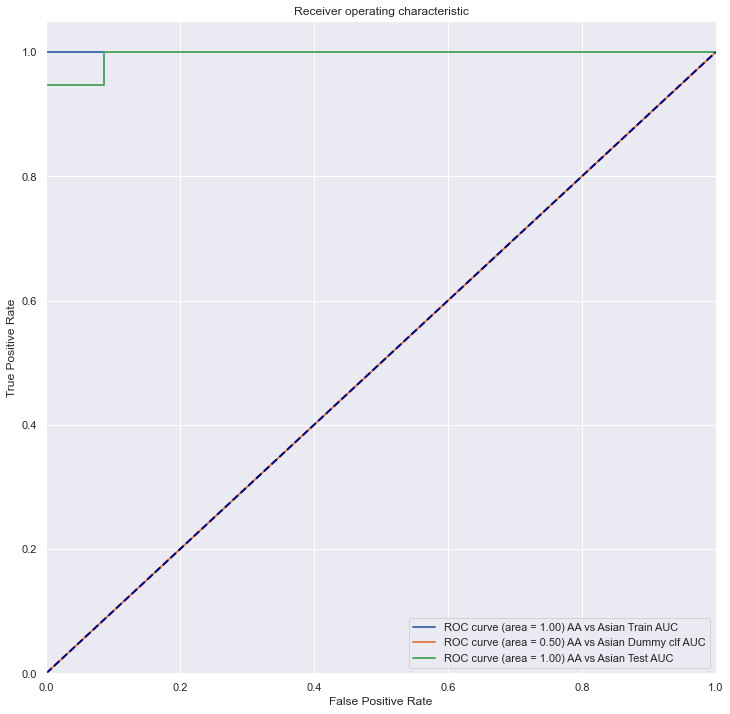

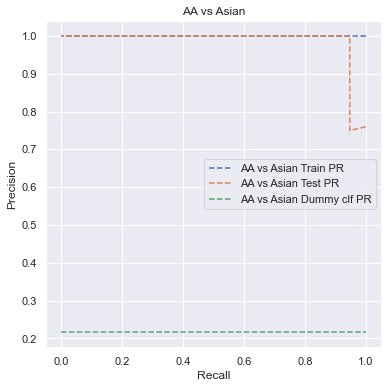

Hisp     235
Asian     97
Name: population, dtype: int64

806           1402           1617           1618    \
level_0         target        target         target         target   
level_1  D6S1043, 14.0  D18S51, 22.0  D6S1043, 20.0  D1S1656, 11.0   
0          0.000836005    0.00176019     0.00204807     0.00204807   

               1968          2129           9757          9775    \
level_0        target        target         target        target   
level_1  D18S51, 20.0  D18S51, 19.0  D2S1338, 22.0  PentaE, 15.0   
0          0.00252376    0.00285368     0.00692192    0.00695208   

               10309      15124          15181         15182          15185   \
level_0        target     target         target        target         target   
level_1  D21S11, 33.2  FGA, 24.0  D1S1656, 19.3  PentaE, 25.0  D12S391, 27.0   
0          0.00760363  0.0099452      0.0100796     0.0100796      0.0100796   

                15186       15189         16709        16955          18443   \
level_0         target      target        target       target         target   
level_1  D12S391, 19.3  TH01, 10.0  PentaD, 15.0  D7S820, 8.0  D2S1338, 23.0   
0            0.0100796   0.0100796      0.011061    0.0111289      0.0122181   

               20237         20928       20931          20933         21055   \
level_0        target        target      target         target        target   
level_1  PentaD, 12.0  D18S51, 21.0  SE33, 32.2  D16S539, 14.0  D13S317, 9.0   
0            0.013592      0.014337    0.014337       0.014337     0.0144267   

                23938           24913         26175        26452   \
level_0         target          target        target       target   
level_1  D12S391, 24.0  D10S1248, 15.0  D18S51, 15.0  CSF1PO, 7.0   
0            0.0157639       0.0163758     0.0174816    0.0176618   

                 27192         27262          28242         30353   \
level_0          target        target         target        target   
level_1  D10S1248, 16.0  CSF1PO, 12.0  D3S1358, 17.0  PentaE, 20.0   
0             0.0181345     0.0181763      0.0189022     0.0205146   

                30354          33399         35393         36218   \
level_0         target         target        target        target   
level_1  D2S1338, 26.0  D2S1338, 16.0  D18S51, 16.0  PentaD, 10.0   
0            0.0205146      0.0226488     0.0241747     0.0245538   

                36866          37362          37365          38109   \
level_0         target         target         target         target   
level_1  D6S1043, 19.0  D6S1043, 15.0  D19S433, 16.2  D8S1179, 15.0   
0            0.0251607      0.0254285      0.0254285      0.0258991   

               38441          38686       39585        40581         41187   \
level_0        target         target      target       target        target   
level_1  D7S820, 12.0  D2S1338, 19.0  SE33, 30.2  D5S818, 8.0  D5S818, 14.0   
0           0.0262495      0.0264135   0.0269863    0.0276621      0.028172   

             42534          43333       43923          44799          44837   \
level_0      target         target      target         target         target   
level_1  SE33, 29.2  D12S391, 15.0  SE33, 27.2  D1S1656, 16.0  D1S1656, 13.0   
0         0.0290539      0.0297256   0.0302461       0.030861      0.0309314   

            46305   ...       173006       173007        173008        173009  \
level_0     target  ...       target       target        target        target   
level_1  vWA, 18.0  ...  D7S820, 6.0  D7S820, 8.1  D7S820, 10.3  D7S820, 11.1   
0        0.0321725  ...          NaN          NaN           NaN           NaN   

               173010        173011     173012     173013     173014  \
level_0        target        target     target     target     target   
level_1  D7S820, 14.0  D8S1179, 7.0  FGA, 16.2  FGA, 17.2  FGA, 18.2   
0                 NaN           NaN        NaN        NaN        NaN   

            173015     173016     173017     173018     173019     173020  \
level_0     target     target     target     targe

390          391           205           182           59   \
Feature      TH01, 9.0    TH01, 9.3  D5S818, 10.0  D2S441, 12.0  D16S539, 9.0   
KS value      0.448328     0.344639      0.343465      0.320461      0.303122   
KS p-value  1.8915e-10  2.75853e-06    3.0289e-06    1.7479e-05   5.98672e-05   

                       152           186         407         409          307  \
Feature     D22S1045, 11.0  D2S441, 14.0   vWA, 14.0   vWA, 16.0  PentaE, 7.0   
KS value          0.283227      0.258428    0.233006    0.229621     0.228723   
KS p-value     0.000225918    0.00103515  0.00424109  0.00508058   0.00527947   

                       157         408           206            113  \
Feature     D22S1045, 16.0   vWA, 15.0  D5S818, 11.0  D1S1656, 15.0   
KS value          0.222713    0.219329      0.218016       0.193907   
KS p-value      0.00721064  0.00848923    0.00909824      0.0277797   

                     207             156            163            62   \
Feature     D5S818, 12.0  D22S1045, 15.0  D2S1338, 17.0  D16S539, 12.0   
KS value        0.185479        0.184374       0.173321       0.167035   
KS p-value     0.0398261       0.0416788      0.0648738      0.0826232   

                     70             61             215        272  \
Feature     D18S51, 13.0  D16S539, 11.0  D6S1043, 12.0  FGA, 22.0   
KS value        0.165584       0.164686         0.1622   0.156673   
KS p-value     0.0872343      0.0901751      0.0987107    0.12045   

                       158           48             195             16   \
Feature     D22S1045, 17.0  D13S317, 8.0  D3S1358, 15.0  D10S1248, 14.0   
KS value           0.15619       0.15619       0.144032        0.138229   
KS p-value         0.12244       0.12244       0.184395        0.221641   

                      111           245           69             194  \
Feature     D1S1656, 14.0  D7S820, 11.0  D18S51, 12.0  D3S1358, 14.0   
KS value         0.135466      0.133324      0.132495       0.131252   
KS p-value       0.241102      0.256806      0.263559       0.273285   

                      98             54             254           180  \
Feature     D19S433, 15.0  D13S317, 14.0  D8S1179, 11.0  D2S441, 11.0   
KS value         0.127798        0.12766       0.127383      0.126347   
KS p-value       0.302175       0.303089       0.305393      0.314801   

                     137            97            138            52   \
Feature     D21S11, 31.2  D19S433, 14.2  D21S11, 32.0  D13S317, 12.0   
KS value        0.124206       0.120337      0.116261       0.112117   
KS p-value      0.334152       0.370675      0.412069       0.457478   

                  386            51            179            256  \
Feature     TH01, 6.0  D13S317, 11.0  D2S441, 10.0  D8S1179, 13.0   
KS value     0.110873       0.110528      0.109975       0.109768   
KS p-value   0.471305       0.475929      0.481891       0.484092   

                      170            35           242           208  \
Feature     D2S1338, 24.0  D12S391, 20.0  D7S820, 9.0  D5S818, 13.0   
KS value         0.108455       0.107695     0.102929      0.102515   
KS p-value       0.499102       0.508627      0.56554      0.570344   

                  410           301            53           295  ...  \
Feature     vWA, 17.0  PentaD, 14.0  D13S317, 13.0  PentaD, 9.0  ...   
KS value     0.102238      0.101686        0.10058    0.0992678  ...   
KS p-value   0.574244      0.580698       0.594462      0.61093  ...   

                  262            261            260           252  \
Feature     FGA, 16.2  D8S1179, 18.0  D8S1179, 17.0  D8S1179, 9.0   
KS value            0       0.012987      0.0153357     0.0106383   
KS p-value          1              1              1             1   

                      236           250           246           244  \
Feature     D6S1043, 25.0  D8S1179, 7.0  D7S820, 11.1  D7S820, 10.3   
KS value                0             0             0             0 

0:	total: 8.32ms	remaining: 4.15s
1:	total: 16.7ms	remaining: 4.17s
2:	total: 24.2ms	remaining: 4.01s
3:	total: 32.4ms	remaining: 4.02s
4:	total: 40.8ms	remaining: 4.04s
5:	total: 48.4ms	remaining: 3.98s
6:	total: 56.7ms	remaining: 3.99s
7:	total: 64.9ms	remaining: 3.99s
8:	total: 72.3ms	remaining: 3.94s
9:	total: 81ms	remaining: 3.97s
10:	total: 88.9ms	remaining: 3.95s
11:	total: 96.3ms	remaining: 3.92s
12:	total: 105ms	remaining: 3.92s
13:	total: 112ms	remaining: 3.9s
14:	total: 121ms	remaining: 3.93s
15:	total: 130ms	remaining: 3.93s
16:	total: 140ms	remaining: 3.98s
17:	total: 151ms	remaining: 4.04s
18:	total: 160ms	remaining: 4.05s
19:	total: 169ms	remaining: 4.05s
20:	total: 177ms	remaining: 4.04s
21:	total: 186ms	remaining: 4.03s
22:	total: 194ms	remaining: 4.01s
23:	total: 202ms	remaining: 4.01s
24:	total: 214ms	remaining: 4.07s
25:	total: 223ms	remaining: 4.07s
26:	total: 232ms	remaining: 4.05s
27:	total: 241ms	remaining: 4.06s
28:	total: 250ms	remaining: 4.06s
29:	total: 260m

254:	total: 1.62s	remaining: 1.56s
255:	total: 1.63s	remaining: 1.55s
256:	total: 1.63s	remaining: 1.54s
257:	total: 1.64s	remaining: 1.54s
258:	total: 1.64s	remaining: 1.53s
259:	total: 1.65s	remaining: 1.52s
260:	total: 1.66s	remaining: 1.51s
261:	total: 1.66s	remaining: 1.51s
262:	total: 1.67s	remaining: 1.5s
263:	total: 1.67s	remaining: 1.5s
264:	total: 1.68s	remaining: 1.49s
265:	total: 1.68s	remaining: 1.48s
266:	total: 1.69s	remaining: 1.47s
267:	total: 1.7s	remaining: 1.47s
268:	total: 1.7s	remaining: 1.46s
269:	total: 1.71s	remaining: 1.46s
270:	total: 1.72s	remaining: 1.45s
271:	total: 1.72s	remaining: 1.44s
272:	total: 1.73s	remaining: 1.44s
273:	total: 1.73s	remaining: 1.43s
274:	total: 1.74s	remaining: 1.42s
275:	total: 1.75s	remaining: 1.42s
276:	total: 1.75s	remaining: 1.41s
277:	total: 1.76s	remaining: 1.4s
278:	total: 1.76s	remaining: 1.4s
279:	total: 1.77s	remaining: 1.39s
280:	total: 1.77s	remaining: 1.38s
281:	total: 1.78s	remaining: 1.38s
282:	total: 1.79s	remainin

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.

/Users/dmitriydemidko/anaconda3/envs/genomics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Model  Train AUC   Val AUC  Train AP    Val AP
0   cat   0.997312  0.952632  0.995365  0.866772
1    rf   0.965753  0.871930  0.946324  0.654114
2    lr   0.989570  0.940351  0.986535  0.846721
3   svm   0.988817  0.968421  0.989895  0.901129

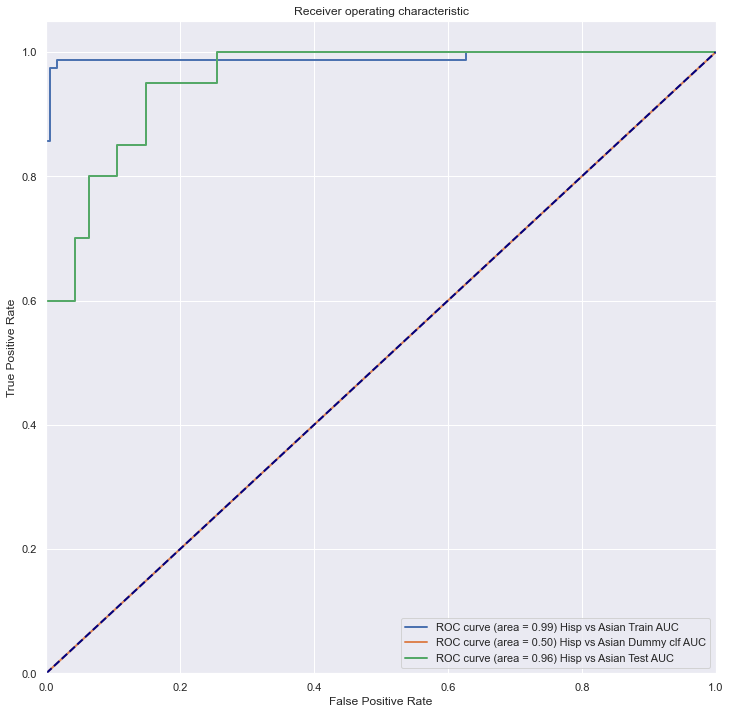

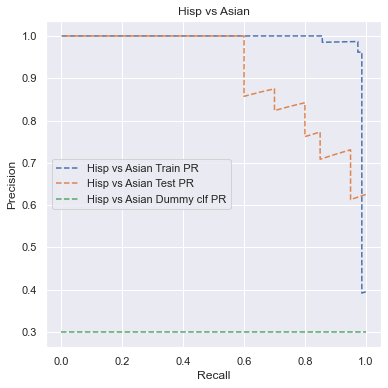

In [48]:
test_roc_auc = one_vs_one_clfs(
    dh.get('new_bel_vs_us_one_hot'),
    'population',
)
# test_roc_auc_one_hot = one_vs_one_clfs(
#     dh.get('us_data_2016_one_hot'),
#     'population',
# )

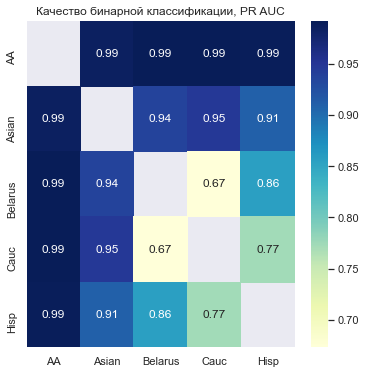

In [50]:
plot_heatmap_(kek(test_roc_auc).sort_values(['Group1', 'Group2']), 'Качество бинарной классификации, PR AUC')

#plot_heatmap(test_roc_auc_one_hot, 'US data (one-hot) "population" 1vs1 results')

**New Bel vs US**

In [29]:
# test_roc_auc = one_vs_one_clfs(
#     dh.get('new_bel_vs_us'),
#     'source',
# )
test_roc_auc_one_hot = one_vs_one_clfs(
    dh.get('new_bel_vs_us_one_hot'),
    'new_bel_vs_us_one_hot',
)


KeyError: 'new_bel_vs_us_one_hot'

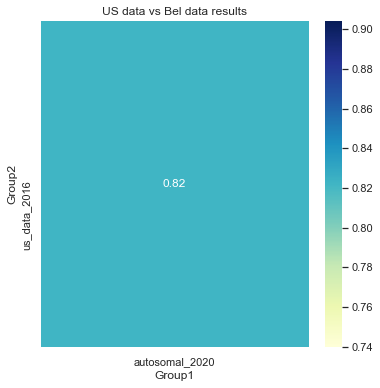

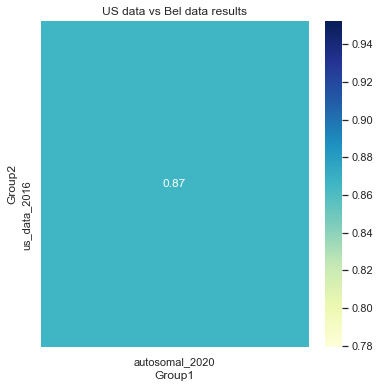

In [16]:
plot_heatmap(test_roc_auc, 'US data vs Bel data results')
plot_heatmap(test_roc_auc_one_hot, 'US data vs Bel data results')